#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=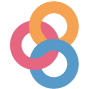)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
req

```
## <Response [200]>
```

Prenons par exemple les 1000 premiers caractères du résultat:


In [ ]:
print(req.content[:1000])

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="AGO">\r\n    <wb:iso2Code>AO</wb:iso2Code>\r\n    <wb:name>Angola</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Luanda</wb:capitalCity>\r\n    <wb:longitude>13.242</wb:longitude>\r\n    <wb:latitude>-8.81155</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BEN">\r\n    <wb:iso2Code>BJ</wb:iso2Code>\r\n    <wb:name>Benin</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="'

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

req = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(req.content[:1000])

b'[{"page":1,"pages":2,"per_page":"50","total":55},[{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Luanda","longitude":"13.242","latitude":"-8.81155"},{"id":"BEN","iso2Code":"BJ","name":"Benin","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Porto-Novo","longitude":"2.6323","latitude":"6.4779"},{"id":"BGD","iso2Code":"BD","name":"Bangladesh","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2'

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = req.json()
wb = pd.json_normalize(wb[1])
wb.head(5)

```
##     id iso2Code  ... lendingType.iso2code lendingType.value
## 0  AGO       AO  ...                   XF              IBRD
## 1  BEN       BJ  ...                   XI               IDA
## 2  BGD       BD  ...                   XI               IDA
## 3  BLZ       BZ  ...                   XF              IBRD
## 4  BOL       BO  ...                   XF              IBRD
## 
## [5 rows x 18 columns]
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
##      id iso2Code  ... lendingType.iso2code lendingType.value
## 0   AGO       AO  ...                   XF              IBRD
## 1   BEN       BJ  ...                   XI               IDA
## 2   BGD       BD  ...                   XI               IDA
## 3   BLZ       BZ  ...                   XF              IBRD
## 4   BOL       BO  ...                   XF              IBRD
## 5   BTN       BT  ...                   XI               IDA
## 6   CIV       CI  ...                   XI               IDA
## 7   CMR       CM  ...                   XH             Blend
## 8   COG       CG  ...                   XH             Blend
## 9   COM       KM  ...                   XI               IDA
## 10  CPV       CV  ...                   XH             Blend
## 11  DJI       DJ  ...                   XI               IDA
## 12  DZA       DZ  ...                   XF              IBRD
## 13  EGY       EG  ...                   XF              IBRD
## 14  FSM       FM  ...                   XI               IDA
## 15  GHA       GH  ...                   XI               IDA
## 16  HND       HN  ...                   XI               IDA
## 17  HTI       HT  ...                   XI               IDA
## 18  IDN       ID  ...                   XF              IBRD
## 19  IND       IN  ...                   XF              IBRD
## 20  IRN       IR  ...                   XF              IBRD
## 21  KEN       KE  ...                   XH             Blend
## 22  KGZ       KG  ...                   XI               IDA
## 23  KHM       KH  ...                   XI               IDA
## 24  KIR       KI  ...                   XI               IDA
## 25  LAO       LA  ...                   XI               IDA
## 26  LKA       LK  ...                   XF              IBRD
## 27  LSO       LS  ...                   XI               IDA
## 28  MAR       MA  ...                   XF              IBRD
## 29  MMR       MM  ...                   XI               IDA
## 30  MNG       MN  ...                   XF              IBRD
## 31  MRT       MR  ...                   XI               IDA
## 32  NGA       NG  ...                   XH             Blend
## 33  NIC       NI  ...                   XI               IDA
## 34  NPL       NP  ...                   XI               IDA
## 35  PAK       PK  ...                   XH             Blend
## 36  PHL       PH  ...                   XF              IBRD
## 37  PNG       PG  ...                   XH             Blend
## 38  PSE       PS  ...                   XX    Not classified
## 39  SEN       SN  ...                   XI               IDA
## 40  SLB       SB  ...                   XI               IDA
## 41  SLV       SV  ...                   XF              IBRD
## 42  STP       ST  ...                   XI               IDA
## 43  SWZ       SZ  ...                   XF              IBRD
## 44  TJK       TJ  ...                   XI               IDA
## 45  TLS       TL  ...                   XH             Blend
## 46  TUN       TN  ...                   XF              IBRD
## 47  TZA       TZ  ...                   XI               IDA
## 48  UKR       UA  ...                   XF              IBRD
## 49  UZB       UZ  ...                   XH             Blend
## 0   VNM       VN  ...                   XF              IBRD
## 1   VUT       VU  ...                   XI               IDA
## 2   WSM       WS  ...                   XI               IDA
## 3   ZMB       ZM  ...                   XI               IDA
## 4   ZWE       ZW  ...                   XH             Blend
## 
## [55 rows x 18 columns]
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
req.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## True
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 



:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


:four:
Représenter l'histogramme des prix de vente


In [ ]:
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Avant de faire une carte, on va convertir 
les limites de la commune de Plogoff en geoJSON pour faciliter 
sa représentation avec `folium`
([voir la doc `geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):


In [ ]:
geo_j = plgf.to_json()

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter). 


In [ ]:
import folium
import numpy as np

ventes['map_color'] = pd.qcut(ventes['valeur_fonciere'], [0,0.8,1], labels = ['lightblue','red'])
ventes['icon'] = np.where(ventes['type_local']== 'Maison', "home", "")
ventes['num_voie_clean'] = np.where(ventes['numero_voie'].isnull(), "", ventes['numero_voie'])
ventes['text'] = ventes.apply(lambda s: "Adresse: {num} {voie} <br>Vente en {annee} <br>Prix {prix:.0f} €".format(
                        num = s['num_voie_clean'],
                        voie = s["voie"],
                        annee = s['date_mutation'].split("-")[0],
                        prix = s["valeur_fonciere"]),
             axis=1)
             
center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']],
                  popup=ventes.iloc[i]['text'],
                  icon=folium.Icon(color=ventes.iloc[i]['map_color'], icon=ventes.iloc[i]['icon'])).add_to(m)

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_a4a8d4b304934b878c2fabd8ee6ebd0d%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_a4a8d4b304934b878c2fabd8ee6ebd0d%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_a4a8d4b304934b878c2fabd8ee6ebd0d%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_a4a8d4b304934b878c2fabd8ee6ebd0d%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B48.03477472157772%2C%20-4.671743032482598%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_10b03956a5d345fcb21a796affd61331%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cffaa85fe2f243bc9041536602caec64%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61fa9cceb4b24668bf518af1b215e64d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cffaa85fe2f243bc9041536602caec64.setIcon%28icon_61fa9cceb4b24668bf518af1b215e64d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d56353e20be4fafb6b0d1d2cd386cec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1c0450316a5d46f29bdd30f002c7fe34%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1c0450316a5d46f29bdd30f002c7fe34%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20176000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d56353e20be4fafb6b0d1d2cd386cec.setContent%28html_1c0450316a5d46f29bdd30f002c7fe34%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cffaa85fe2f243bc9041536602caec64.bindPopup%28popup_1d56353e20be4fafb6b0d1d2cd386cec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2cef048eac8a4c2792c50e1a12e367cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03781%2C%20-4.717967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_13b626b38c884c54aabff738d501c905%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2cef048eac8a4c2792c50e1a12e367cb.setIcon%28icon_13b626b38c884c54aabff738d501c905%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_094c69c5347a4c38828bbe4bbdd6b4bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2984e8aa89b45c3ae2471599584f590%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2984e8aa89b45c3ae2471599584f590%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205215%20LA%20POINTE%20DU%20RAZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_094c69c5347a4c38828bbe4bbdd6b4bd.setContent%28html_f2984e8aa89b45c3ae2471599584f590%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2cef048eac8a4c2792c50e1a12e367cb.bindPopup%28popup_094c69c5347a4c38828bbe4bbdd6b4bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbbf986577a640889bfb33c1cda29c29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042296%2C%20-4.709488%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e3aacc189854b48854291a776dd3a9b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbbf986577a640889bfb33c1cda29c29.setIcon%28icon_5e3aacc189854b48854291a776dd3a9b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e8b1c454fe2c46598ac40567e06540d9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8629231c91d04102a27f72b4387c3369%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8629231c91d04102a27f72b4387c3369%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e8b1c454fe2c46598ac40567e06540d9.setContent%28html_8629231c91d04102a27f72b4387c3369%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbbf986577a640889bfb33c1cda29c29.bindPopup%28popup_e8b1c454fe2c46598ac40567e06540d9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63a1ec13f41c415d957fe86cfe0e3fd4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.043125%2C%20-4.706963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f043028321bb4095b008b018f1f97647%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63a1ec13f41c415d957fe86cfe0e3fd4.setIcon%28icon_f043028321bb4095b008b018f1f97647%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2507eb5c8ead4246bb5c1284c49f0f83%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0fdf2e4a8ef649d4b31f81f198326bc5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0fdf2e4a8ef649d4b31f81f198326bc5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2507eb5c8ead4246bb5c1284c49f0f83.setContent%28html_0fdf2e4a8ef649d4b31f81f198326bc5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63a1ec13f41c415d957fe86cfe0e3fd4.bindPopup%28popup_2507eb5c8ead4246bb5c1284c49f0f83%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_388be6ae620d473e8115afe55d36dbd8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042232%2C%20-4.705553%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7589855af13a43aa82b669000185d0d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_388be6ae620d473e8115afe55d36dbd8.setIcon%28icon_7589855af13a43aa82b669000185d0d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_403e8db49ec04b71a2019cb61855a489%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c53c4268a0ce4a3d885c0f2bd479403d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c53c4268a0ce4a3d885c0f2bd479403d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_403e8db49ec04b71a2019cb61855a489.setContent%28html_c53c4268a0ce4a3d885c0f2bd479403d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_388be6ae620d473e8115afe55d36dbd8.bindPopup%28popup_403e8db49ec04b71a2019cb61855a489%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33238ed09b8c43b5a94a0f70549182f5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042047%2C%20-4.705626%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_deeadef41fd641d29083d46b8848c324%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33238ed09b8c43b5a94a0f70549182f5.setIcon%28icon_deeadef41fd641d29083d46b8848c324%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c84b4d7ef17843cdac4e303f5cb0625f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_adaaec8057544a76aabffec15cd3b6d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_adaaec8057544a76aabffec15cd3b6d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20LAOUAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c84b4d7ef17843cdac4e303f5cb0625f.setContent%28html_adaaec8057544a76aabffec15cd3b6d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33238ed09b8c43b5a94a0f70549182f5.bindPopup%28popup_c84b4d7ef17843cdac4e303f5cb0625f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2bc324bb713f4ac2a9314161f96a5b81%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038236%2C%20-4.709329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cfd8874c27bd4de4b0ce55ea806b8867%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2bc324bb713f4ac2a9314161f96a5b81.setIcon%28icon_cfd8874c27bd4de4b0ce55ea806b8867%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee325ef916704070b60c01d77a2e07a0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7c1a73a79f44ce2b78d9d9958998ad7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7c1a73a79f44ce2b78d9d9958998ad7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee325ef916704070b60c01d77a2e07a0.setContent%28html_f7c1a73a79f44ce2b78d9d9958998ad7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2bc324bb713f4ac2a9314161f96a5b81.bindPopup%28popup_ee325ef916704070b60c01d77a2e07a0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5880dc6c04641939f78aaac18746ec5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038356%2C%20-4.709215%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7942153ba5b240178bdaf69938958cda%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5880dc6c04641939f78aaac18746ec5.setIcon%28icon_7942153ba5b240178bdaf69938958cda%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e1df65e9fff144f4af63282a744f1524%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1c7ff87b0944fedbf9b7f5738093477%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1c7ff87b0944fedbf9b7f5738093477%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20220%20KREIZ%20AN%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e1df65e9fff144f4af63282a744f1524.setContent%28html_c1c7ff87b0944fedbf9b7f5738093477%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5880dc6c04641939f78aaac18746ec5.bindPopup%28popup_e1df65e9fff144f4af63282a744f1524%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_48586f67d0a249b18bb834901afaadf8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039437%2C%20-4.710305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e838b1b834b470a8ed5cb6fab221b21%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_48586f67d0a249b18bb834901afaadf8.setIcon%28icon_0e838b1b834b470a8ed5cb6fab221b21%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33007fcb44f043fe92188b6af44479c3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cbd3e0f574fe4a9db5f7cb697272bac3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cbd3e0f574fe4a9db5f7cb697272bac3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33007fcb44f043fe92188b6af44479c3.setContent%28html_cbd3e0f574fe4a9db5f7cb697272bac3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_48586f67d0a249b18bb834901afaadf8.bindPopup%28popup_33007fcb44f043fe92188b6af44479c3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d65f3869ac764b5fab1039219a5ec24f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038782%2C%20-4.709152%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2848cb0e2acb417d9653e3b55bfc8321%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d65f3869ac764b5fab1039219a5ec24f.setIcon%28icon_2848cb0e2acb417d9653e3b55bfc8321%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_58c8d6c8e3ef4f1da7017cf5bd6fca88%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c18d611da8d64ebb9e46f4d919f7f775%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c18d611da8d64ebb9e46f4d919f7f775%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20215%20AR%20VEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_58c8d6c8e3ef4f1da7017cf5bd6fca88.setContent%28html_c18d611da8d64ebb9e46f4d919f7f775%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d65f3869ac764b5fab1039219a5ec24f.bindPopup%28popup_58c8d6c8e3ef4f1da7017cf5bd6fca88%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07afc95e4c4149afbb7b2138b1874430%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038442%2C%20-4.709021%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5c14721fefdf4b309e3e153eee063586%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07afc95e4c4149afbb7b2138b1874430.setIcon%28icon_5c14721fefdf4b309e3e153eee063586%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b30d00661d94fa7bf1b16541a3b81d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_846563488f5e41b6ba625a73b84d4e2d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_846563488f5e41b6ba625a73b84d4e2d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b30d00661d94fa7bf1b16541a3b81d5.setContent%28html_846563488f5e41b6ba625a73b84d4e2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07afc95e4c4149afbb7b2138b1874430.bindPopup%28popup_8b30d00661d94fa7bf1b16541a3b81d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bddacf939e67475d88868b6eeb0fe416%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038467%2C%20-4.708496%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d4db38d0264044c8ad89b30bcdddcfc4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bddacf939e67475d88868b6eeb0fe416.setIcon%28icon_d4db38d0264044c8ad89b30bcdddcfc4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a8f332377e7e46fdb3d1690670e53815%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_528e6d6199d04862846a4794cf31ad22%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_528e6d6199d04862846a4794cf31ad22%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20208%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a8f332377e7e46fdb3d1690670e53815.setContent%28html_528e6d6199d04862846a4794cf31ad22%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bddacf939e67475d88868b6eeb0fe416.bindPopup%28popup_a8f332377e7e46fdb3d1690670e53815%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_093fed439f30487582743efc2d943faf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038626%2C%20-4.708192%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_94124309c4bc466485ace375fa389165%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_093fed439f30487582743efc2d943faf.setIcon%28icon_94124309c4bc466485ace375fa389165%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3059095b00843c39c6c3ab2d5d60c1f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ec6100818e9144aea6f25dc75f7b84a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ec6100818e9144aea6f25dc75f7b84a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20206%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3059095b00843c39c6c3ab2d5d60c1f.setContent%28html_ec6100818e9144aea6f25dc75f7b84a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_093fed439f30487582743efc2d943faf.bindPopup%28popup_d3059095b00843c39c6c3ab2d5d60c1f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f5be37ac18741d9b8a341b79d33d1ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03872%2C%20-4.707889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_524a7003f6e64c7599797992d6fd4f28%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f5be37ac18741d9b8a341b79d33d1ed.setIcon%28icon_524a7003f6e64c7599797992d6fd4f28%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f53ab680607c4532943675234427dfd7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e2ce3c2479ef4dd5998c674e6242c4dd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e2ce3c2479ef4dd5998c674e6242c4dd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f53ab680607c4532943675234427dfd7.setContent%28html_e2ce3c2479ef4dd5998c674e6242c4dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f5be37ac18741d9b8a341b79d33d1ed.bindPopup%28popup_f53ab680607c4532943675234427dfd7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_30140fc99b3546c0a39c11ba97a6a3d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039763%2C%20-4.706615%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f221409860c748d4910e1f420318656a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_30140fc99b3546c0a39c11ba97a6a3d7.setIcon%28icon_f221409860c748d4910e1f420318656a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7ac77ba0598942af88962e20e8f87780%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d247b6d5ac3b4d8fb5a09ba201cdf2ca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d247b6d5ac3b4d8fb5a09ba201cdf2ca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2010000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7ac77ba0598942af88962e20e8f87780.setContent%28html_d247b6d5ac3b4d8fb5a09ba201cdf2ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_30140fc99b3546c0a39c11ba97a6a3d7.bindPopup%28popup_7ac77ba0598942af88962e20e8f87780%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_449c17b1acf049a2b84e3d44f2528e29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039617%2C%20-4.706066%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_151d5eb000c04ae0a7a225bd57b95377%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_449c17b1acf049a2b84e3d44f2528e29.setIcon%28icon_151d5eb000c04ae0a7a225bd57b95377%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_36413d1a7c9b4cee86a03154bfacfe1b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0be96666e5014910a53847ad54d033e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0be96666e5014910a53847ad54d033e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20198%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_36413d1a7c9b4cee86a03154bfacfe1b.setContent%28html_0be96666e5014910a53847ad54d033e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_449c17b1acf049a2b84e3d44f2528e29.bindPopup%28popup_36413d1a7c9b4cee86a03154bfacfe1b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cffc737f420146cfb1cae7482c707428%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f04888010f14cdea96acbd3ed274c14%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cffc737f420146cfb1cae7482c707428.setIcon%28icon_2f04888010f14cdea96acbd3ed274c14%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1ad50b0ebf424f92a51b59c1e5356dae%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b0aa4ce885bd4efbaa7eded870b79bda%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b0aa4ce885bd4efbaa7eded870b79bda%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1ad50b0ebf424f92a51b59c1e5356dae.setContent%28html_b0aa4ce885bd4efbaa7eded870b79bda%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cffc737f420146cfb1cae7482c707428.bindPopup%28popup_1ad50b0ebf424f92a51b59c1e5356dae%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cdd10cc8fad1433b8369f8d2a4246054%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039813%2C%20-4.706178%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_86f62c10047644f486f2b3629e44b43e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cdd10cc8fad1433b8369f8d2a4246054.setIcon%28icon_86f62c10047644f486f2b3629e44b43e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c3e0933e0904e2a9fa9ca09762dbb0f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9b1fc042163741c2a2493ef69601e3f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9b1fc042163741c2a2493ef69601e3f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c3e0933e0904e2a9fa9ca09762dbb0f.setContent%28html_9b1fc042163741c2a2493ef69601e3f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cdd10cc8fad1433b8369f8d2a4246054.bindPopup%28popup_2c3e0933e0904e2a9fa9ca09762dbb0f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e174dd68d8014011a99d14e5bc8ff4c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039561%2C%20-4.705858%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc71c626e45f4825b07d003e634f2f4f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e174dd68d8014011a99d14e5bc8ff4c5.setIcon%28icon_cc71c626e45f4825b07d003e634f2f4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5162479099d5413486d273d7a418e56c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f55f0ad97dab4aeea42f6e0206316f14%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f55f0ad97dab4aeea42f6e0206316f14%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20197%20LESCOFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5162479099d5413486d273d7a418e56c.setContent%28html_f55f0ad97dab4aeea42f6e0206316f14%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e174dd68d8014011a99d14e5bc8ff4c5.bindPopup%28popup_5162479099d5413486d273d7a418e56c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ee6bbe7debe344858550fd63394478c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039599%2C%20-4.70426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_74f69858634e47969a4cad904959d17b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ee6bbe7debe344858550fd63394478c7.setIcon%28icon_74f69858634e47969a4cad904959d17b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c584e56dde114b8ea68879b0f80daf55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b6a94e03fc5422a8b8b7f3ac85709fe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b6a94e03fc5422a8b8b7f3ac85709fe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20236%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2027500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c584e56dde114b8ea68879b0f80daf55.setContent%28html_1b6a94e03fc5422a8b8b7f3ac85709fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ee6bbe7debe344858550fd63394478c7.bindPopup%28popup_c584e56dde114b8ea68879b0f80daf55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_395ef41b3b284077b4fda290c37bb18f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039585%2C%20-4.704422%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_992c6cafc9634e2f9e595bb16d8339db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_395ef41b3b284077b4fda290c37bb18f.setIcon%28icon_992c6cafc9634e2f9e595bb16d8339db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7725097d76474e8ea308c823c549da31%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6f747faf5734cbba6174a25db09ac85%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6f747faf5734cbba6174a25db09ac85%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20235%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7725097d76474e8ea308c823c549da31.setContent%28html_e6f747faf5734cbba6174a25db09ac85%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_395ef41b3b284077b4fda290c37bb18f.bindPopup%28popup_7725097d76474e8ea308c823c549da31%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_052161c7c5b3479eb10e44dd65053139%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039474%2C%20-4.704727%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b56924ffe9a74822ba30c8510ecfd499%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_052161c7c5b3479eb10e44dd65053139.setIcon%28icon_b56924ffe9a74822ba30c8510ecfd499%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2679399d520245a3b01b7988778b505a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8683735b8c2e430dacc87ea07516dadb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8683735b8c2e430dacc87ea07516dadb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20234%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2679399d520245a3b01b7988778b505a.setContent%28html_8683735b8c2e430dacc87ea07516dadb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_052161c7c5b3479eb10e44dd65053139.bindPopup%28popup_2679399d520245a3b01b7988778b505a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2db79428ee34df2a20ee90648934f29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036863%2C%20-4.709276%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7817e5858b7a45ad8b299dcdf2f941d3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2db79428ee34df2a20ee90648934f29.setIcon%28icon_7817e5858b7a45ad8b299dcdf2f941d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9f40d9b8a73d4edd8776902691a1dad1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3ce57fe23f844326affa12a32d01bf3c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3ce57fe23f844326affa12a32d01bf3c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9f40d9b8a73d4edd8776902691a1dad1.setContent%28html_3ce57fe23f844326affa12a32d01bf3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2db79428ee34df2a20ee90648934f29.bindPopup%28popup_9f40d9b8a73d4edd8776902691a1dad1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8e9f10c67efd475693bd0ff93fa0a652%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036781%2C%20-4.709462%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e05d2f5d232e49f09868445f5eee68b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8e9f10c67efd475693bd0ff93fa0a652.setIcon%28icon_e05d2f5d232e49f09868445f5eee68b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ac853c092f9c4da782f4708e037d79ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d29572b77eb44f61b9796e3799ce2a6a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d29572b77eb44f61b9796e3799ce2a6a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ac853c092f9c4da782f4708e037d79ec.setContent%28html_d29572b77eb44f61b9796e3799ce2a6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8e9f10c67efd475693bd0ff93fa0a652.bindPopup%28popup_ac853c092f9c4da782f4708e037d79ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6d87f8c3d15341089f09bdb128d566fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036899%2C%20-4.709473%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fab2b3fc8fae46f88bbd163711b627f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6d87f8c3d15341089f09bdb128d566fb.setIcon%28icon_fab2b3fc8fae46f88bbd163711b627f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d56a6174e140407f85f5b2c8f0a3a348%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57081e21551f45d7998e892c73c17429%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57081e21551f45d7998e892c73c17429%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20278%20DU%20SOLDAT%20DUVAL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20183000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d56a6174e140407f85f5b2c8f0a3a348.setContent%28html_57081e21551f45d7998e892c73c17429%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6d87f8c3d15341089f09bdb128d566fb.bindPopup%28popup_d56a6174e140407f85f5b2c8f0a3a348%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b920a2efeac24492a99889dff0c63a06%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038238%2C%20-4.707333%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_36a45d2fdf034c7aafa184624913f5b6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b920a2efeac24492a99889dff0c63a06.setIcon%28icon_36a45d2fdf034c7aafa184624913f5b6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f99a75e1cf114cfca7b3e6a18c603bdb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6056a86f4a5940eaa1f052fa107772b8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6056a86f4a5940eaa1f052fa107772b8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20268%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f99a75e1cf114cfca7b3e6a18c603bdb.setContent%28html_6056a86f4a5940eaa1f052fa107772b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b920a2efeac24492a99889dff0c63a06.bindPopup%28popup_f99a75e1cf114cfca7b3e6a18c603bdb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a14e1d1ec07445e4a94e8861e532e533%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038774%2C%20-4.708101%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb4d13c203674e1b96a5d68f4cc26a3c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a14e1d1ec07445e4a94e8861e532e533.setIcon%28icon_cb4d13c203674e1b96a5d68f4cc26a3c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4168fbc578e54146afdc441279fca660%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9138b80d97ee41d8b14857bb7072ae17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9138b80d97ee41d8b14857bb7072ae17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4168fbc578e54146afdc441279fca660.setContent%28html_9138b80d97ee41d8b14857bb7072ae17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a14e1d1ec07445e4a94e8861e532e533.bindPopup%28popup_4168fbc578e54146afdc441279fca660%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfc0bcd2e8c449188ecf7e5efeb92073%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039593%2C%20-4.703711%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_22c96c793abd4dde8c095b23777b5799%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfc0bcd2e8c449188ecf7e5efeb92073.setIcon%28icon_22c96c793abd4dde8c095b23777b5799%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef97f9212fdb4f0fb7f210e28b7279d9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aaed42ad495145adb8e8e5deebd2b630%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aaed42ad495145adb8e8e5deebd2b630%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef97f9212fdb4f0fb7f210e28b7279d9.setContent%28html_aaed42ad495145adb8e8e5deebd2b630%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfc0bcd2e8c449188ecf7e5efeb92073.bindPopup%28popup_ef97f9212fdb4f0fb7f210e28b7279d9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d2865196b8a4328a391c32834d4970f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039118%2C%20-4.709662%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd9ccbca35a242f48ff4e5bb9c3bc0c8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d2865196b8a4328a391c32834d4970f.setIcon%28icon_dd9ccbca35a242f48ff4e5bb9c3bc0c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b1e2f9b41b94f53a57e8ce5b9a88d4d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e282e9c8b304fbcb0e549bae5a5a000%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e282e9c8b304fbcb0e549bae5a5a000%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201268%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b1e2f9b41b94f53a57e8ce5b9a88d4d.setContent%28html_4e282e9c8b304fbcb0e549bae5a5a000%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d2865196b8a4328a391c32834d4970f.bindPopup%28popup_4b1e2f9b41b94f53a57e8ce5b9a88d4d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7ea9bc8fe74a479f8271af4d07cf3cdb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039244%2C%20-4.709273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3ba90c8763264ff4bc91b3c0a84fa739%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7ea9bc8fe74a479f8271af4d07cf3cdb.setIcon%28icon_3ba90c8763264ff4bc91b3c0a84fa739%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a111614b47104ec196901d3c2838be15%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6eefae2f7da468495f6a4655586b8e5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6eefae2f7da468495f6a4655586b8e5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201238%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a111614b47104ec196901d3c2838be15.setContent%28html_e6eefae2f7da468495f6a4655586b8e5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7ea9bc8fe74a479f8271af4d07cf3cdb.bindPopup%28popup_a111614b47104ec196901d3c2838be15%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_699dc4f7650d4fe48d7b9a80889fc77a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04302%2C%20-4.702863%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7f68095e676a41c094bda63f398ff1a2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_699dc4f7650d4fe48d7b9a80889fc77a.setIcon%28icon_7f68095e676a41c094bda63f398ff1a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20352118c136493faafdfaf1816d4000%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4860b6d558b6447ba114c3a26c6567f1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4860b6d558b6447ba114c3a26c6567f1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2084%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20352118c136493faafdfaf1816d4000.setContent%28html_4860b6d558b6447ba114c3a26c6567f1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_699dc4f7650d4fe48d7b9a80889fc77a.bindPopup%28popup_20352118c136493faafdfaf1816d4000%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_22b45b2b9ec54543bf02b613606b46bd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041793%2C%20-4.705125%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e65eb380645944f6b6bbcac4afa5217a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_22b45b2b9ec54543bf02b613606b46bd.setIcon%28icon_e65eb380645944f6b6bbcac4afa5217a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_78944981dfc34b63bbfff705da886ad4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_59bb982f23a34399abaad6146d8a9fb8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_59bb982f23a34399abaad6146d8a9fb8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20291%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_78944981dfc34b63bbfff705da886ad4.setContent%28html_59bb982f23a34399abaad6146d8a9fb8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_22b45b2b9ec54543bf02b613606b46bd.bindPopup%28popup_78944981dfc34b63bbfff705da886ad4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_63eb011daf19412c9ce7f8d456f5b194%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041517%2C%20-4.70501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f6dadf021d0845f0b2199c18e3095fe6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_63eb011daf19412c9ce7f8d456f5b194.setIcon%28icon_f6dadf021d0845f0b2199c18e3095fe6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_25f6f8b267644c50afbcc85fdf27dec8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25a4d4f3f36f4af596e1483baa8522ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25a4d4f3f36f4af596e1483baa8522ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20213%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_25f6f8b267644c50afbcc85fdf27dec8.setContent%28html_25a4d4f3f36f4af596e1483baa8522ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_63eb011daf19412c9ce7f8d456f5b194.bindPopup%28popup_25f6f8b267644c50afbcc85fdf27dec8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3636ea4bf1364bdca9bf5eeaa5e319bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040483%2C%20-4.697976%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed94970fb16c41fc90853556823dcedd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3636ea4bf1364bdca9bf5eeaa5e319bf.setIcon%28icon_ed94970fb16c41fc90853556823dcedd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ee8b8797aa74329bbec8092bd55ddd8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_13f54b80e64845feaafd47a0a17e863a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_13f54b80e64845feaafd47a0a17e863a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ee8b8797aa74329bbec8092bd55ddd8.setContent%28html_13f54b80e64845feaafd47a0a17e863a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3636ea4bf1364bdca9bf5eeaa5e319bf.bindPopup%28popup_9ee8b8797aa74329bbec8092bd55ddd8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_28131e2781e940bb8dc48d720fbcce61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041406%2C%20-4.700591%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_afe1f63940ba4d94a7e5d67a5aedbc61%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_28131e2781e940bb8dc48d720fbcce61.setIcon%28icon_afe1f63940ba4d94a7e5d67a5aedbc61%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a3b26060e774603b3f26b7107517ee2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dbfc7fc8cfcf4946be1ded5bff3887c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dbfc7fc8cfcf4946be1ded5bff3887c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20137%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20125000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a3b26060e774603b3f26b7107517ee2.setContent%28html_dbfc7fc8cfcf4946be1ded5bff3887c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_28131e2781e940bb8dc48d720fbcce61.bindPopup%28popup_5a3b26060e774603b3f26b7107517ee2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_154bf36b7fa8482bacd106853a343ce6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041625%2C%20-4.700293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_939ca6f658264c43b56c07a20c83cee5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_154bf36b7fa8482bacd106853a343ce6.setIcon%28icon_939ca6f658264c43b56c07a20c83cee5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6d576485d5c2467497405f4e9e24bbbc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ece5ef20afb49d095470c4088c68dd6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ece5ef20afb49d095470c4088c68dd6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20138%20KERHERNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20178675%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6d576485d5c2467497405f4e9e24bbbc.setContent%28html_9ece5ef20afb49d095470c4088c68dd6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_154bf36b7fa8482bacd106853a343ce6.bindPopup%28popup_6d576485d5c2467497405f4e9e24bbbc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b51d069a7f84417d98a77fe1e260c81d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a4906f7a2d2a457cbf21f4ff915c8529%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b51d069a7f84417d98a77fe1e260c81d.setIcon%28icon_a4906f7a2d2a457cbf21f4ff915c8529%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e53b619d0c2d43cea8c12d95148ec99e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58c61c62eb21421dbf13bc7d45f791b1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58c61c62eb21421dbf13bc7d45f791b1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e53b619d0c2d43cea8c12d95148ec99e.setContent%28html_58c61c62eb21421dbf13bc7d45f791b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b51d069a7f84417d98a77fe1e260c81d.bindPopup%28popup_e53b619d0c2d43cea8c12d95148ec99e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33c9089d278b4c34bef53fdf2f329041%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039985%2C%20-4.703074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8491fb145dbd4c39a813f1c5fb28ab06%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33c9089d278b4c34bef53fdf2f329041.setIcon%28icon_8491fb145dbd4c39a813f1c5fb28ab06%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3f3dd100095f45ec8db6b5b82603c6df%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_43430721a6a843fd8e93ae7efce99927%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_43430721a6a843fd8e93ae7efce99927%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20155%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20172790%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3f3dd100095f45ec8db6b5b82603c6df.setContent%28html_43430721a6a843fd8e93ae7efce99927%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33c9089d278b4c34bef53fdf2f329041.bindPopup%28popup_3f3dd100095f45ec8db6b5b82603c6df%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_11ade9a0aa2a4d829ce4928194fd9803%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040302%2C%20-4.703544%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_739e45548105427ca3f72def097505e8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_11ade9a0aa2a4d829ce4928194fd9803.setIcon%28icon_739e45548105427ca3f72def097505e8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43fa19deddf5490b840d754dfdf6b658%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_195246b33cde498aaacf539803323a01%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_195246b33cde498aaacf539803323a01%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43fa19deddf5490b840d754dfdf6b658.setContent%28html_195246b33cde498aaacf539803323a01%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_11ade9a0aa2a4d829ce4928194fd9803.bindPopup%28popup_43fa19deddf5490b840d754dfdf6b658%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_05fadd4c0eb04bf0945ddab125d90152%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0401%2C%20-4.703612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_654bf5d3de9b4546b2fe9784b447ffa5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_05fadd4c0eb04bf0945ddab125d90152.setIcon%28icon_654bf5d3de9b4546b2fe9784b447ffa5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a723f522ff814fbaafe25edad51083b1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce3ea6e0a21848d98de488fab5bbac67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce3ea6e0a21848d98de488fab5bbac67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20162%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201467%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a723f522ff814fbaafe25edad51083b1.setContent%28html_ce3ea6e0a21848d98de488fab5bbac67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_05fadd4c0eb04bf0945ddab125d90152.bindPopup%28popup_a723f522ff814fbaafe25edad51083b1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df79bad63f1a48879e6f69d09ff96d44%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04055%2C%20-4.699342%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4defc6482da24eeda5cee3f3906c4c8d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_df79bad63f1a48879e6f69d09ff96d44.setIcon%28icon_4defc6482da24eeda5cee3f3906c4c8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_485222cb76ab4abca4e3c4897edaf544%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_decca780bb814c5e87cad18260f39c6b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_decca780bb814c5e87cad18260f39c6b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20144%20D%20IROISE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_485222cb76ab4abca4e3c4897edaf544.setContent%28html_decca780bb814c5e87cad18260f39c6b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df79bad63f1a48879e6f69d09ff96d44.bindPopup%28popup_485222cb76ab4abca4e3c4897edaf544%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ff01cd5dc65481ab139d3f7d008999a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039907%2C%20-4.703508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_150598ffee2b4427bbd2ae17223e57db%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ff01cd5dc65481ab139d3f7d008999a.setIcon%28icon_150598ffee2b4427bbd2ae17223e57db%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e25735dfcf84215bf6b955965314f3c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9778f0d2658644f8a2f81e5e9f512622%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9778f0d2658644f8a2f81e5e9f512622%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20161%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e25735dfcf84215bf6b955965314f3c.setContent%28html_9778f0d2658644f8a2f81e5e9f512622%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ff01cd5dc65481ab139d3f7d008999a.bindPopup%28popup_2e25735dfcf84215bf6b955965314f3c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_772570bd17474a9482fc840261ad9fe6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039851%2C%20-4.703561%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9d53eb5fae87413f85fcc763d7b943c1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_772570bd17474a9482fc840261ad9fe6.setIcon%28icon_9d53eb5fae87413f85fcc763d7b943c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_069aeb5638da43edb9a8af9e91072fcd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9010d5373cfc4348aea4a1cd8cc33314%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9010d5373cfc4348aea4a1cd8cc33314%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20123000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_069aeb5638da43edb9a8af9e91072fcd.setContent%28html_9010d5373cfc4348aea4a1cd8cc33314%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_772570bd17474a9482fc840261ad9fe6.bindPopup%28popup_069aeb5638da43edb9a8af9e91072fcd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_815740f33bde42eeaddc4e63c1d2a256%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d5e9eb24cbc34122b1fc75482174637e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_815740f33bde42eeaddc4e63c1d2a256.setIcon%28icon_d5e9eb24cbc34122b1fc75482174637e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c746c602fac44a5ba9fdc1280e95da4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8b241d9af7d44ae7a8612b257d20be61%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8b241d9af7d44ae7a8612b257d20be61%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c746c602fac44a5ba9fdc1280e95da4.setContent%28html_8b241d9af7d44ae7a8612b257d20be61%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_815740f33bde42eeaddc4e63c1d2a256.bindPopup%28popup_3c746c602fac44a5ba9fdc1280e95da4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e8e301ea8bd045c6a174297d02bff3a7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041159%2C%20-4.705031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8f67fbbc781f4adda7a2ecbb1335745f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e8e301ea8bd045c6a174297d02bff3a7.setIcon%28icon_8f67fbbc781f4adda7a2ecbb1335745f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_31d2030e0d9b4c5b98f00c865fb74a1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eaaaeea344b14e5f85b0ce568ca2b458%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eaaaeea344b14e5f85b0ce568ca2b458%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_31d2030e0d9b4c5b98f00c865fb74a1e.setContent%28html_eaaaeea344b14e5f85b0ce568ca2b458%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e8e301ea8bd045c6a174297d02bff3a7.bindPopup%28popup_31d2030e0d9b4c5b98f00c865fb74a1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_757ec5b18f9e45baa2b9ffe353f81d13%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041286%2C%20-4.705006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f0e2f45cedfb44df84e6b909f27f05e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_757ec5b18f9e45baa2b9ffe353f81d13.setIcon%28icon_f0e2f45cedfb44df84e6b909f27f05e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_48bec26e65194f6899dc623137cbc01f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f513cf351259462ea17bfb4c1fd56807%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f513cf351259462ea17bfb4c1fd56807%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_48bec26e65194f6899dc623137cbc01f.setContent%28html_f513cf351259462ea17bfb4c1fd56807%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_757ec5b18f9e45baa2b9ffe353f81d13.bindPopup%28popup_48bec26e65194f6899dc623137cbc01f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c6354172b5324b0e9183abeff450999e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041188%2C%20-4.70479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f756d2771a8741ffb97d064a760e36b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c6354172b5324b0e9183abeff450999e.setIcon%28icon_f756d2771a8741ffb97d064a760e36b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0683a7f59c64350900136d09b9e2116%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_832d4aa4d4464c95893fb5aca2599575%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_832d4aa4d4464c95893fb5aca2599575%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0683a7f59c64350900136d09b9e2116.setContent%28html_832d4aa4d4464c95893fb5aca2599575%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c6354172b5324b0e9183abeff450999e.bindPopup%28popup_b0683a7f59c64350900136d09b9e2116%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1e97423484f14042b5835b16337b8be4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041079%2C%20-4.70486%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0e271f4a7de94690931101ddd39bfedd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1e97423484f14042b5835b16337b8be4.setIcon%28icon_0e271f4a7de94690931101ddd39bfedd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_43e4fd4455084c5296e7ed1117a6f79c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce62af63e9894b9d80cb81b83168a347%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce62af63e9894b9d80cb81b83168a347%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205233%20DES%20AJONCS%20D%20OR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20245030%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_43e4fd4455084c5296e7ed1117a6f79c.setContent%28html_ce62af63e9894b9d80cb81b83168a347%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1e97423484f14042b5835b16337b8be4.bindPopup%28popup_43e4fd4455084c5296e7ed1117a6f79c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fb3f3bdd79c74ee68f4c861f81de1ba7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041902%2C%20-4.705415%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d2a7e3e132704036808617b1c108d18a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fb3f3bdd79c74ee68f4c861f81de1ba7.setIcon%28icon_d2a7e3e132704036808617b1c108d18a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa78ccefc0b442e697637cd715866240%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae067ef32f504e869b25f3fd35b422f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae067ef32f504e869b25f3fd35b422f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LAOUAL%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2050%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa78ccefc0b442e697637cd715866240.setContent%28html_ae067ef32f504e869b25f3fd35b422f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fb3f3bdd79c74ee68f4c861f81de1ba7.bindPopup%28popup_fa78ccefc0b442e697637cd715866240%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_acd888b1c2db4f9c950af6bf71c8261f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040589%2C%20-4.690298%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1246fa65f0614cad98b440a07e97e0cb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_acd888b1c2db4f9c950af6bf71c8261f.setIcon%28icon_1246fa65f0614cad98b440a07e97e0cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5cf87685a7424dacbeac2e8f74787057%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_00d2510d9fe747e8977ae81d26e1b02e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_00d2510d9fe747e8977ae81d26e1b02e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5cf87685a7424dacbeac2e8f74787057.setContent%28html_00d2510d9fe747e8977ae81d26e1b02e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_acd888b1c2db4f9c950af6bf71c8261f.bindPopup%28popup_5cf87685a7424dacbeac2e8f74787057%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2134974bdd6c4ef08df7c056ba1deb98%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040075%2C%20-4.69014%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fe8579a06dcb41c6a23dabc573b2ac5f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2134974bdd6c4ef08df7c056ba1deb98.setIcon%28icon_fe8579a06dcb41c6a23dabc573b2ac5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_390ffe6b6fbb4b7087b3978f0c270340%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4acf341b41f649e8981999e9a0499bd0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4acf341b41f649e8981999e9a0499bd0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20110%20KERGADALEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_390ffe6b6fbb4b7087b3978f0c270340.setContent%28html_4acf341b41f649e8981999e9a0499bd0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2134974bdd6c4ef08df7c056ba1deb98.bindPopup%28popup_390ffe6b6fbb4b7087b3978f0c270340%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2f702576b1574830914e914c21f87f55%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041337%2C%20-4.691061%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9464738b7b00404ba997974a223510f9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2f702576b1574830914e914c21f87f55.setIcon%28icon_9464738b7b00404ba997974a223510f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_86a104f4d0a2461c9eff3095da3899e5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_48b42087648c4decac459d68a0e0fdf0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_48b42087648c4decac459d68a0e0fdf0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_86a104f4d0a2461c9eff3095da3899e5.setContent%28html_48b42087648c4decac459d68a0e0fdf0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2f702576b1574830914e914c21f87f55.bindPopup%28popup_86a104f4d0a2461c9eff3095da3899e5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c60c823af42f47b98aa53c6f22a79f5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040514%2C%20-4.691955%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6ba386485eac4c21961e7e7784ebd19b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c60c823af42f47b98aa53c6f22a79f5a.setIcon%28icon_6ba386485eac4c21961e7e7784ebd19b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_68897af682ec4c4c890aedfc4415da40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c436c92734914aa6ba791f0c28782477%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c436c92734914aa6ba791f0c28782477%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_68897af682ec4c4c890aedfc4415da40.setContent%28html_c436c92734914aa6ba791f0c28782477%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c60c823af42f47b98aa53c6f22a79f5a.bindPopup%28popup_68897af682ec4c4c890aedfc4415da40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86b1bd724a57418dbdb29047f5234d9a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040574%2C%20-4.691787%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_22aed410ba7d4fc8923476bfc6fd4d86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86b1bd724a57418dbdb29047f5234d9a.setIcon%28icon_22aed410ba7d4fc8923476bfc6fd4d86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1a1ddb974076434dbc8efeb2358dce7d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6b8c5ad1227c440983101d912676fd52%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6b8c5ad1227c440983101d912676fd52%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1a1ddb974076434dbc8efeb2358dce7d.setContent%28html_6b8c5ad1227c440983101d912676fd52%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86b1bd724a57418dbdb29047f5234d9a.bindPopup%28popup_1a1ddb974076434dbc8efeb2358dce7d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d58439555ed44fbeac033f2c7e365e29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040049%2C%20-4.690408%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_31792501dcc847b4844f4d67b739f59d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d58439555ed44fbeac033f2c7e365e29.setIcon%28icon_31792501dcc847b4844f4d67b739f59d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4b3c54fa73bf469693e7051da17b6840%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_53530552f4bf4196af4dfbfe2388cc03%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_53530552f4bf4196af4dfbfe2388cc03%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20111%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4b3c54fa73bf469693e7051da17b6840.setContent%28html_53530552f4bf4196af4dfbfe2388cc03%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d58439555ed44fbeac033f2c7e365e29.bindPopup%28popup_4b3c54fa73bf469693e7051da17b6840%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fba09c426bd14d8dad3bf935b60c7258%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039988%2C%20-4.683359%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8f74f28706864c7f96c3509a310edcd7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fba09c426bd14d8dad3bf935b60c7258.setIcon%28icon_8f74f28706864c7f96c3509a310edcd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5ce57d325443402c9dea3326de05cdfe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3837a6df405c497ab13526931367e894%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3837a6df405c497ab13526931367e894%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2098%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5ce57d325443402c9dea3326de05cdfe.setContent%28html_3837a6df405c497ab13526931367e894%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fba09c426bd14d8dad3bf935b60c7258.bindPopup%28popup_5ce57d325443402c9dea3326de05cdfe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e536beaff7845d196e367bf9771e403%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040099%2C%20-4.68336%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c17c6ab7cfa4d2fb76a8281ec2923de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e536beaff7845d196e367bf9771e403.setIcon%28icon_3c17c6ab7cfa4d2fb76a8281ec2923de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f8be7bbb24440599f9b1182324ec68e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b7ac71490f4a4ba6b719dfdded18a35f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b7ac71490f4a4ba6b719dfdded18a35f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f8be7bbb24440599f9b1182324ec68e.setContent%28html_b7ac71490f4a4ba6b719dfdded18a35f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e536beaff7845d196e367bf9771e403.bindPopup%28popup_0f8be7bbb24440599f9b1182324ec68e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_32d87fcf72924ee1a3ccdc3be99be707%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040522%2C%20-4.688371%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b0cf6783f144d20a71f589ffcffa863%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_32d87fcf72924ee1a3ccdc3be99be707.setIcon%28icon_0b0cf6783f144d20a71f589ffcffa863%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_988b5f5e283042ca85b1b97cc59a4b88%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7be6e917800d49d38abb54e2b9f4d623%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7be6e917800d49d38abb54e2b9f4d623%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_988b5f5e283042ca85b1b97cc59a4b88.setContent%28html_7be6e917800d49d38abb54e2b9f4d623%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_32d87fcf72924ee1a3ccdc3be99be707.bindPopup%28popup_988b5f5e283042ca85b1b97cc59a4b88%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e7e3691f8c394a1098bd8d5d4258ed11%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040618%2C%20-4.68813%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b094410105b49b38624f564f8f13ea4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e7e3691f8c394a1098bd8d5d4258ed11.setIcon%28icon_8b094410105b49b38624f564f8f13ea4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a8ade726a49a4423963baea0b2c13c12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2c4a389d70f4f2ca0d8d9233a1cb641%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2c4a389d70f4f2ca0d8d9233a1cb641%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a8ade726a49a4423963baea0b2c13c12.setContent%28html_c2c4a389d70f4f2ca0d8d9233a1cb641%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e7e3691f8c394a1098bd8d5d4258ed11.bindPopup%28popup_a8ade726a49a4423963baea0b2c13c12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe36095dcd4b4ba3a17c55eaac99d9a4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040487%2C%20-4.688305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_19595d19d1c646d7a4c7fd07f3be1381%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe36095dcd4b4ba3a17c55eaac99d9a4.setIcon%28icon_19595d19d1c646d7a4c7fd07f3be1381%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aaeb5287273e431697063e20ca80edbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_deb05271584544689a53783f2115c7b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_deb05271584544689a53783f2115c7b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20453%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aaeb5287273e431697063e20ca80edbb.setContent%28html_deb05271584544689a53783f2115c7b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe36095dcd4b4ba3a17c55eaac99d9a4.bindPopup%28popup_aaeb5287273e431697063e20ca80edbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f740cc2b791c4ffc90be5821944f4fff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5068a9be05b4ac38cc0a2ffc59b9963%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f740cc2b791c4ffc90be5821944f4fff.setIcon%28icon_c5068a9be05b4ac38cc0a2ffc59b9963%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2099040ecacc4f7498d6cde36f773dee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3e85ece576d14e57b56a2520484d7072%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3e85ece576d14e57b56a2520484d7072%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2099040ecacc4f7498d6cde36f773dee.setContent%28html_3e85ece576d14e57b56a2520484d7072%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f740cc2b791c4ffc90be5821944f4fff.bindPopup%28popup_2099040ecacc4f7498d6cde36f773dee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_712fc83c0fb045319753d6058e4a7d00%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040086%2C%20-4.683292%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e49e29a8eec74351a84c465f315ef101%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_712fc83c0fb045319753d6058e4a7d00.setIcon%28icon_e49e29a8eec74351a84c465f315ef101%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_329893fa5ca340469eaecfe28890206c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6de7b6f8c5b849fbb54963ecd98af2b0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6de7b6f8c5b849fbb54963ecd98af2b0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2062000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_329893fa5ca340469eaecfe28890206c.setContent%28html_6de7b6f8c5b849fbb54963ecd98af2b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_712fc83c0fb045319753d6058e4a7d00.bindPopup%28popup_329893fa5ca340469eaecfe28890206c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8190d993607b4850aafda82e6a5bfa1b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.04061%2C%20-4.688259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0bfff128be2a4eccb36945ac26d403f8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8190d993607b4850aafda82e6a5bfa1b.setIcon%28icon_0bfff128be2a4eccb36945ac26d403f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1be1c9057d7f4f8d97853a8f306d5ae9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0ee61cd6fb1c44f6beafdb3f12d3fa9f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0ee61cd6fb1c44f6beafdb3f12d3fa9f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1be1c9057d7f4f8d97853a8f306d5ae9.setContent%28html_0ee61cd6fb1c44f6beafdb3f12d3fa9f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8190d993607b4850aafda82e6a5bfa1b.bindPopup%28popup_1be1c9057d7f4f8d97853a8f306d5ae9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5050da8492654e6285f8e159fbbd135b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.042198%2C%20-4.6794%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e52240a6d850410ba591b903aa354fed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5050da8492654e6285f8e159fbbd135b.setIcon%28icon_e52240a6d850410ba591b903aa354fed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ac0157764ac418182f96f2644f9e98b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dedec609a4ab44039728f388ff72d869%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dedec609a4ab44039728f388ff72d869%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201055%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ac0157764ac418182f96f2644f9e98b.setContent%28html_dedec609a4ab44039728f388ff72d869%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5050da8492654e6285f8e159fbbd135b.bindPopup%28popup_4ac0157764ac418182f96f2644f9e98b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_016dc13bfbb54e73a73ca5ddd661812a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041142%2C%20-4.681685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_865d69388d6248d388b890c8327473a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_016dc13bfbb54e73a73ca5ddd661812a.setIcon%28icon_865d69388d6248d388b890c8327473a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5e4d284830ff4771987b5994d5c9555a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82f4060472f04478a415b3248432ede4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82f4060472f04478a415b3248432ede4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5e4d284830ff4771987b5994d5c9555a.setContent%28html_82f4060472f04478a415b3248432ede4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_016dc13bfbb54e73a73ca5ddd661812a.bindPopup%28popup_5e4d284830ff4771987b5994d5c9555a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_040dfa06467a467d91bee5fdc266a824%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041191%2C%20-4.681444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6584d2be73bd426396405bacbf536cf3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_040dfa06467a467d91bee5fdc266a824.setIcon%28icon_6584d2be73bd426396405bacbf536cf3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5af03d4b5af247af9216db32124b74fe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5abec37216f44eb09f47e26de3e53aa2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5abec37216f44eb09f47e26de3e53aa2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5af03d4b5af247af9216db32124b74fe.setContent%28html_5abec37216f44eb09f47e26de3e53aa2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_040dfa06467a467d91bee5fdc266a824.bindPopup%28popup_5af03d4b5af247af9216db32124b74fe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83701ac3d174473a9098b45979342efa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b66f37c0c5014007b18f9a6ca9179853%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83701ac3d174473a9098b45979342efa.setIcon%28icon_b66f37c0c5014007b18f9a6ca9179853%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c913f885cbf45e3a1a363c6ccf54133%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1a8b175b58d8471eabbb2e41a97db112%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1a8b175b58d8471eabbb2e41a97db112%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c913f885cbf45e3a1a363c6ccf54133.setContent%28html_1a8b175b58d8471eabbb2e41a97db112%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83701ac3d174473a9098b45979342efa.bindPopup%28popup_9c913f885cbf45e3a1a363c6ccf54133%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3b85143c328f4dcaa732637fbdf1608f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_af7111e317864f80b92daebf89b9a992%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3b85143c328f4dcaa732637fbdf1608f.setIcon%28icon_af7111e317864f80b92daebf89b9a992%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_046438241f7d4fffbcfa767102284433%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aafdd9e5ad454ab3aa318b1a6d6a9ba5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aafdd9e5ad454ab3aa318b1a6d6a9ba5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_046438241f7d4fffbcfa767102284433.setContent%28html_aafdd9e5ad454ab3aa318b1a6d6a9ba5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3b85143c328f4dcaa732637fbdf1608f.bindPopup%28popup_046438241f7d4fffbcfa767102284433%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b084ea9ebb44b0d9241b582b43de9e3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_42d8b1bfbedb476f88d6884bb260afc5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b084ea9ebb44b0d9241b582b43de9e3.setIcon%28icon_42d8b1bfbedb476f88d6884bb260afc5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_46b0ffc45f8f4277a76e57affdb141ee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_af6c11d3452a493cbc703a7ffaa13fd7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_af6c11d3452a493cbc703a7ffaa13fd7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_46b0ffc45f8f4277a76e57affdb141ee.setContent%28html_af6c11d3452a493cbc703a7ffaa13fd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b084ea9ebb44b0d9241b582b43de9e3.bindPopup%28popup_46b0ffc45f8f4277a76e57affdb141ee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2917befa050f4edfb48d4572b32f91f1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037833%2C%20-4.67416%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_930e6611057546e7a5059237e22cd450%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2917befa050f4edfb48d4572b32f91f1.setIcon%28icon_930e6611057546e7a5059237e22cd450%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2eb48e161fff4edc8cf880e81337216b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_15a079b6ff1f4bf8a7cf88a1896d77b8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_15a079b6ff1f4bf8a7cf88a1896d77b8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2eb48e161fff4edc8cf880e81337216b.setContent%28html_15a079b6ff1f4bf8a7cf88a1896d77b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2917befa050f4edfb48d4572b32f91f1.bindPopup%28popup_2eb48e161fff4edc8cf880e81337216b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8cee98c3e94f428481e29d00c6de091e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037827%2C%20-4.674444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a9eb17c9bf9342d9a858e9c1b22022e3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8cee98c3e94f428481e29d00c6de091e.setIcon%28icon_a9eb17c9bf9342d9a858e9c1b22022e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c8ac53fce7674c7281452039884492db%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fbbd8edc2d7346e896b7f6b60ae804bf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fbbd8edc2d7346e896b7f6b60ae804bf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2066%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c8ac53fce7674c7281452039884492db.setContent%28html_fbbd8edc2d7346e896b7f6b60ae804bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8cee98c3e94f428481e29d00c6de091e.bindPopup%28popup_c8ac53fce7674c7281452039884492db%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1c2ac0d5a88a4c75add5db2ff92ba960%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7143228b6dc547bba3f6e192f4a66f48%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1c2ac0d5a88a4c75add5db2ff92ba960.setIcon%28icon_7143228b6dc547bba3f6e192f4a66f48%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0479975d3f624e5f80d7225cda640481%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2c1d1b02e281431fbf62e5f99588a973%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2c1d1b02e281431fbf62e5f99588a973%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0479975d3f624e5f80d7225cda640481.setContent%28html_2c1d1b02e281431fbf62e5f99588a973%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1c2ac0d5a88a4c75add5db2ff92ba960.bindPopup%28popup_0479975d3f624e5f80d7225cda640481%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1aa47dff957048d591bb89a9c047dd0a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037735%2C%20-4.675296%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5261f9d08300424f9be612dfcaebc716%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1aa47dff957048d591bb89a9c047dd0a.setIcon%28icon_5261f9d08300424f9be612dfcaebc716%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d146d83be07240f39162db25e2542e40%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c7d33997f50447e0a56cbc6a20130cd4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c7d33997f50447e0a56cbc6a20130cd4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2069%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d146d83be07240f39162db25e2542e40.setContent%28html_c7d33997f50447e0a56cbc6a20130cd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1aa47dff957048d591bb89a9c047dd0a.bindPopup%28popup_d146d83be07240f39162db25e2542e40%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_640c962471cb4f5ea85c69b92632ea05%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038092%2C%20-4.67556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e9e4f5732fa42aca749f99cc6d03433%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_640c962471cb4f5ea85c69b92632ea05.setIcon%28icon_7e9e4f5732fa42aca749f99cc6d03433%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0cb5a37696ab40488779cc27a2477847%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_acfcb7072b6e4d85a0eb9c10ad480ed6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_acfcb7072b6e4d85a0eb9c10ad480ed6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0cb5a37696ab40488779cc27a2477847.setContent%28html_acfcb7072b6e4d85a0eb9c10ad480ed6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_640c962471cb4f5ea85c69b92632ea05.bindPopup%28popup_0cb5a37696ab40488779cc27a2477847%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c1e3c25047ef40fd8ba27e7317f40f2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040436%2C%20-4.678833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6916ee000c8547e2a7620a3ba78f7ad6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c1e3c25047ef40fd8ba27e7317f40f2b.setIcon%28icon_6916ee000c8547e2a7620a3ba78f7ad6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_64ac918f9f394ea4a65c61d65d8c251a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7a5451d3d5954d1fbd8bedf8c45a7c5b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7a5451d3d5954d1fbd8bedf8c45a7c5b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_64ac918f9f394ea4a65c61d65d8c251a.setContent%28html_7a5451d3d5954d1fbd8bedf8c45a7c5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c1e3c25047ef40fd8ba27e7317f40f2b.bindPopup%28popup_64ac918f9f394ea4a65c61d65d8c251a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eddb567319304c388ff966931938e6a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040259%2C%20-4.679053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_06538d04a8c142c1885fcfbd989056c4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eddb567319304c388ff966931938e6a1.setIcon%28icon_06538d04a8c142c1885fcfbd989056c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc1ed086a2e34c139b3dc6c3ff418a93%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_76a76df31306487aadbf9cc5c051ff8b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_76a76df31306487aadbf9cc5c051ff8b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc1ed086a2e34c139b3dc6c3ff418a93.setContent%28html_76a76df31306487aadbf9cc5c051ff8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eddb567319304c388ff966931938e6a1.bindPopup%28popup_bc1ed086a2e34c139b3dc6c3ff418a93%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_926931d4e5f24cd9bac6a1e0949059a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040209%2C%20-4.679209%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e9bfbeec4ef4996a227eb6307a89bd1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_926931d4e5f24cd9bac6a1e0949059a1.setIcon%28icon_3e9bfbeec4ef4996a227eb6307a89bd1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eef3b1fc6a0c461d97f0c8f1623bb98b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b8647a78b0c94260b02b82ec8f9d5d3a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b8647a78b0c94260b02b82ec8f9d5d3a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205061%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eef3b1fc6a0c461d97f0c8f1623bb98b.setContent%28html_b8647a78b0c94260b02b82ec8f9d5d3a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_926931d4e5f24cd9bac6a1e0949059a1.bindPopup%28popup_eef3b1fc6a0c461d97f0c8f1623bb98b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_61e34906d87a4765a11a258b8d1f5135%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040547%2C%20-4.679162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c88f94fc0854495284fa07bba0c15b75%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_61e34906d87a4765a11a258b8d1f5135.setIcon%28icon_c88f94fc0854495284fa07bba0c15b75%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_29d47fb53d7744b49a317c0ad196c151%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cbf182dd4c5e4eb8aa7ff22ca2e79a0b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cbf182dd4c5e4eb8aa7ff22ca2e79a0b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_29d47fb53d7744b49a317c0ad196c151.setContent%28html_cbf182dd4c5e4eb8aa7ff22ca2e79a0b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_61e34906d87a4765a11a258b8d1f5135.bindPopup%28popup_29d47fb53d7744b49a317c0ad196c151%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd8ee01adcbd410890f6706ebf2815c0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040569%2C%20-4.679556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cb5380776cda474994fa8d8a6e92a9c1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd8ee01adcbd410890f6706ebf2815c0.setIcon%28icon_cb5380776cda474994fa8d8a6e92a9c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c4de58869a84fea9fcd7505a537119b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_494b7f9954e44965a98e47e1a423ca3d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_494b7f9954e44965a98e47e1a423ca3d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c4de58869a84fea9fcd7505a537119b.setContent%28html_494b7f9954e44965a98e47e1a423ca3d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd8ee01adcbd410890f6706ebf2815c0.bindPopup%28popup_3c4de58869a84fea9fcd7505a537119b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4c5b3978fbd040698aab1afa5747f0fb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040599%2C%20-4.67922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_65b3c93fe1824967ae077194fdf09250%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4c5b3978fbd040698aab1afa5747f0fb.setIcon%28icon_65b3c93fe1824967ae077194fdf09250%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ebc4440f3b0c417f9ca96f79802ca723%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7bacc321064c4ed88d16a24f9d25b322%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7bacc321064c4ed88d16a24f9d25b322%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ebc4440f3b0c417f9ca96f79802ca723.setContent%28html_7bacc321064c4ed88d16a24f9d25b322%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4c5b3978fbd040698aab1afa5747f0fb.bindPopup%28popup_ebc4440f3b0c417f9ca96f79802ca723%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a7acde79dbe349fb905d7a842d45b00e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040654%2C%20-4.679536%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2aa67d5178f040de810fa82b666b29ff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a7acde79dbe349fb905d7a842d45b00e.setIcon%28icon_2aa67d5178f040de810fa82b666b29ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cdb7aa708b48472ba452c9fd8a78238f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_819031b1ba0d462ca9595d9ead028f21%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_819031b1ba0d462ca9595d9ead028f21%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2085%20JEAN%20FRANCOIS%20CARVAL%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cdb7aa708b48472ba452c9fd8a78238f.setContent%28html_819031b1ba0d462ca9595d9ead028f21%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a7acde79dbe349fb905d7a842d45b00e.bindPopup%28popup_cdb7aa708b48472ba452c9fd8a78238f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4dc81d201f204543827397e0c622d189%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038994%2C%20-4.678002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c3eb52c536eb4d79ae8cdf65e1a27c9a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4dc81d201f204543827397e0c622d189.setIcon%28icon_c3eb52c536eb4d79ae8cdf65e1a27c9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c239bcc534bc4dd39df4ba7d60a3f91a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_438e73ff74ac4932b5f6a1632da30f80%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_438e73ff74ac4932b5f6a1632da30f80%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c239bcc534bc4dd39df4ba7d60a3f91a.setContent%28html_438e73ff74ac4932b5f6a1632da30f80%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4dc81d201f204543827397e0c622d189.bindPopup%28popup_c239bcc534bc4dd39df4ba7d60a3f91a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_488b8a353c4c4e27a60d899251f894da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039681%2C%20-4.67822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9d2c84196cb9477f98a32a68816b4ad8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_488b8a353c4c4e27a60d899251f894da.setIcon%28icon_9d2c84196cb9477f98a32a68816b4ad8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1887b4030fb64949b3a8d21d72d3667a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d24b4b7f763c44ff9ee964c3f125f369%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d24b4b7f763c44ff9ee964c3f125f369%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20MANOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20344%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1887b4030fb64949b3a8d21d72d3667a.setContent%28html_d24b4b7f763c44ff9ee964c3f125f369%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_488b8a353c4c4e27a60d899251f894da.bindPopup%28popup_1887b4030fb64949b3a8d21d72d3667a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d708b1647a444113b3e295a823a17867%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037644%2C%20-4.666085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2dba77a47f994c04bc29ab2eeef695ea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d708b1647a444113b3e295a823a17867.setIcon%28icon_2dba77a47f994c04bc29ab2eeef695ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_824f656ef6f54cd6ad7778b19e669ee7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6b076dbdae74148b618319fa236d890%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6b076dbdae74148b618319fa236d890%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2027%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_824f656ef6f54cd6ad7778b19e669ee7.setContent%28html_d6b076dbdae74148b618319fa236d890%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d708b1647a444113b3e295a823a17867.bindPopup%28popup_824f656ef6f54cd6ad7778b19e669ee7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0159c423dccc4391a77d5a80efe518fc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036503%2C%20-4.665601%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1c9ad3514b234aeaa6f3cac15c4b7923%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0159c423dccc4391a77d5a80efe518fc.setIcon%28icon_1c9ad3514b234aeaa6f3cac15c4b7923%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cc6464e71b81462e8c720e111ba76dee%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_55dec69edc744316b189a9e5f0248b41%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_55dec69edc744316b189a9e5f0248b41%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cc6464e71b81462e8c720e111ba76dee.setContent%28html_55dec69edc744316b189a9e5f0248b41%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0159c423dccc4391a77d5a80efe518fc.bindPopup%28popup_cc6464e71b81462e8c720e111ba76dee%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4f6a07a42789439fb01aedf95c2500e8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036537%2C%20-4.665724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_98432b215398486480ad79fd74b0c257%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4f6a07a42789439fb01aedf95c2500e8.setIcon%28icon_98432b215398486480ad79fd74b0c257%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b81ad8bf270a4099ba3609d9abb32e80%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_02fdb5953b5a42699755ad82e420e0d2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_02fdb5953b5a42699755ad82e420e0d2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2087500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b81ad8bf270a4099ba3609d9abb32e80.setContent%28html_02fdb5953b5a42699755ad82e420e0d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4f6a07a42789439fb01aedf95c2500e8.bindPopup%28popup_b81ad8bf270a4099ba3609d9abb32e80%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_53b68c25d21e4eb8b6da270f968d9784%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_97edcc4322004728bdf63ecdf0b1bca2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_53b68c25d21e4eb8b6da270f968d9784.setIcon%28icon_97edcc4322004728bdf63ecdf0b1bca2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4cf3d3918bf84d49a82a1a7c44284fbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c1551e1560c846ff8fcd0f2f92fa918a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c1551e1560c846ff8fcd0f2f92fa918a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4cf3d3918bf84d49a82a1a7c44284fbb.setContent%28html_c1551e1560c846ff8fcd0f2f92fa918a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_53b68c25d21e4eb8b6da270f968d9784.bindPopup%28popup_4cf3d3918bf84d49a82a1a7c44284fbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e42f4183d334ed893898680f26d24c1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036532%2C%20-4.666032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b8b309f8e6b454990d37778f452b62d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e42f4183d334ed893898680f26d24c1.setIcon%28icon_0b8b309f8e6b454990d37778f452b62d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c53b0d2cc6c9477f9628168f5cf5622c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3b88e16da8834af9802bb0f75ab0f49f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3b88e16da8834af9802bb0f75ab0f49f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c53b0d2cc6c9477f9628168f5cf5622c.setContent%28html_3b88e16da8834af9802bb0f75ab0f49f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e42f4183d334ed893898680f26d24c1.bindPopup%28popup_c53b0d2cc6c9477f9628168f5cf5622c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a72e299ad56b4f68bb1e9e42b7606502%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eafd6a2013e14af4a8728ba7b39718cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a72e299ad56b4f68bb1e9e42b7606502.setIcon%28icon_eafd6a2013e14af4a8728ba7b39718cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_863b68aa05c74cbdb0121ddf1023f239%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fdae8ae331dc4906b77b71e7b93e76e6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fdae8ae331dc4906b77b71e7b93e76e6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_863b68aa05c74cbdb0121ddf1023f239.setContent%28html_fdae8ae331dc4906b77b71e7b93e76e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a72e299ad56b4f68bb1e9e42b7606502.bindPopup%28popup_863b68aa05c74cbdb0121ddf1023f239%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ce5975f7d5de4c0ab445a77b4d521de4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036741%2C%20-4.666059%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3432c71ab45d43648fc798f98d9d0593%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ce5975f7d5de4c0ab445a77b4d521de4.setIcon%28icon_3432c71ab45d43648fc798f98d9d0593%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c9a38915a6f440e6ab4d79c17c29498a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f874d63df39748d0b858bea326112bc9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f874d63df39748d0b858bea326112bc9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c9a38915a6f440e6ab4d79c17c29498a.setContent%28html_f874d63df39748d0b858bea326112bc9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ce5975f7d5de4c0ab445a77b4d521de4.bindPopup%28popup_c9a38915a6f440e6ab4d79c17c29498a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e5e5a1877cf445fa805fa037052d0867%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03823%2C%20-4.666243%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dfb3126a265449bf8d2f3e2fa526cf07%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e5e5a1877cf445fa805fa037052d0867.setIcon%28icon_dfb3126a265449bf8d2f3e2fa526cf07%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_61c07075bd854a2a834f743009c9363e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2def9809dbc54641a2ca04fba5f67816%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2def9809dbc54641a2ca04fba5f67816%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2023%20PONT%20YANN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2032000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_61c07075bd854a2a834f743009c9363e.setContent%28html_2def9809dbc54641a2ca04fba5f67816%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e5e5a1877cf445fa805fa037052d0867.bindPopup%28popup_61c07075bd854a2a834f743009c9363e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9d44ad645f044bdeb3ce425be6ac6b83%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037832%2C%20-4.666753%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f391bfd1a58d4290a945321b242a44de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9d44ad645f044bdeb3ce425be6ac6b83.setIcon%28icon_f391bfd1a58d4290a945321b242a44de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9438e4cc16b5402399c19c7fff64c4d0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_37f0d215779a461fbd707249432f736b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_37f0d215779a461fbd707249432f736b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2012%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2049000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9438e4cc16b5402399c19c7fff64c4d0.setContent%28html_37f0d215779a461fbd707249432f736b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9d44ad645f044bdeb3ce425be6ac6b83.bindPopup%28popup_9438e4cc16b5402399c19c7fff64c4d0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3017132a97a4af5a284150f06a0900f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_45a37b5eb3524f47817e8289eb35c14f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3017132a97a4af5a284150f06a0900f.setIcon%28icon_45a37b5eb3524f47817e8289eb35c14f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6e6c09eed4fc42e7bc7c5d9d086c2cdc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dc4489c2440446dd921726b57ebb129d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dc4489c2440446dd921726b57ebb129d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6e6c09eed4fc42e7bc7c5d9d086c2cdc.setContent%28html_dc4489c2440446dd921726b57ebb129d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3017132a97a4af5a284150f06a0900f.bindPopup%28popup_6e6c09eed4fc42e7bc7c5d9d086c2cdc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e93af86df2044c7aa508dcb71d9d6743%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038023%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2b8d2df47714f069478b0bb4948d334%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e93af86df2044c7aa508dcb71d9d6743.setIcon%28icon_e2b8d2df47714f069478b0bb4948d334%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e98bc9baf624f1ebd4c54e303f137d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4d3d5f9d4d1942afb6021d71abeecc39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4d3d5f9d4d1942afb6021d71abeecc39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205222%20DE%20LA%20LIBERTE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2088000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e98bc9baf624f1ebd4c54e303f137d5.setContent%28html_4d3d5f9d4d1942afb6021d71abeecc39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e93af86df2044c7aa508dcb71d9d6743.bindPopup%28popup_8e98bc9baf624f1ebd4c54e303f137d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e5db314600f4888839e366fad7bf1e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036936%2C%20-4.665258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2c334f286074412908969cf1ba24c47%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e5db314600f4888839e366fad7bf1e1.setIcon%28icon_e2c334f286074412908969cf1ba24c47%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a212bbbb58d47668c0e75ea96257063%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_faee7c5e29124cf0b1d3e6ba3b03431c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_faee7c5e29124cf0b1d3e6ba3b03431c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205267%20DES%20DEMOISELLES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20114000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a212bbbb58d47668c0e75ea96257063.setContent%28html_faee7c5e29124cf0b1d3e6ba3b03431c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e5db314600f4888839e366fad7bf1e1.bindPopup%28popup_6a212bbbb58d47668c0e75ea96257063%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4297e11b0ce428e8776a90ceba5d36d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_19502f106df0496b82cba49155b843f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4297e11b0ce428e8776a90ceba5d36d.setIcon%28icon_19502f106df0496b82cba49155b843f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a629bfec8b54a11815b19488f007caa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_697ae958026242099f10a8a05bd11cea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_697ae958026242099f10a8a05bd11cea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a629bfec8b54a11815b19488f007caa.setContent%28html_697ae958026242099f10a8a05bd11cea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4297e11b0ce428e8776a90ceba5d36d.bindPopup%28popup_6a629bfec8b54a11815b19488f007caa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9845e9b8bb614aa7ad5e376902773459%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036618%2C%20-4.661793%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f0b5a205a63423c948211f45091b047%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9845e9b8bb614aa7ad5e376902773459.setIcon%28icon_6f0b5a205a63423c948211f45091b047%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4f12e19ef8c4d019361f227e331e2cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_819c8ddeb62d44f8ac2f18800145aa97%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_819c8ddeb62d44f8ac2f18800145aa97%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20670%20DU%20CHENE%20VERT%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20137000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4f12e19ef8c4d019361f227e331e2cb.setContent%28html_819c8ddeb62d44f8ac2f18800145aa97%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9845e9b8bb614aa7ad5e376902773459.bindPopup%28popup_e4f12e19ef8c4d019361f227e331e2cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9323157a2897427088e26c10bcd90f8b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034854%2C%20-4.659846%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_71c9fc9897f24d8d8cdea48cb002648c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9323157a2897427088e26c10bcd90f8b.setIcon%28icon_71c9fc9897f24d8d8cdea48cb002648c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b5fa1686d9964f5085c41be182995d80%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10a835c681fc4df7bf1124409396f30e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10a835c681fc4df7bf1124409396f30e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLAER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b5fa1686d9964f5085c41be182995d80.setContent%28html_10a835c681fc4df7bf1124409396f30e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9323157a2897427088e26c10bcd90f8b.bindPopup%28popup_b5fa1686d9964f5085c41be182995d80%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aff579bc32d546d88015639029010d7d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_82562633139b47d69fc95536c4c885c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aff579bc32d546d88015639029010d7d.setIcon%28icon_82562633139b47d69fc95536c4c885c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d1aba60541e94087b40a95abb37b5ef7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e8d54f4e00fc4ef89fe074bfba657afd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e8d54f4e00fc4ef89fe074bfba657afd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d1aba60541e94087b40a95abb37b5ef7.setContent%28html_e8d54f4e00fc4ef89fe074bfba657afd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aff579bc32d546d88015639029010d7d.bindPopup%28popup_d1aba60541e94087b40a95abb37b5ef7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d19b401702714e2583ecebeae7b7d541%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035471%2C%20-4.66189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_571aa82dfe634d50aa9b5c2d82ead5c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d19b401702714e2583ecebeae7b7d541.setIcon%28icon_571aa82dfe634d50aa9b5c2d82ead5c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b581c8caa9ba4746aba9201d5bb62f8d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f213a27a093d42fa9ab1d887e0028652%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f213a27a093d42fa9ab1d887e0028652%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b581c8caa9ba4746aba9201d5bb62f8d.setContent%28html_f213a27a093d42fa9ab1d887e0028652%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d19b401702714e2583ecebeae7b7d541.bindPopup%28popup_b581c8caa9ba4746aba9201d5bb62f8d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b7acf2f4fc4452193502bba6f4f5203%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4607cffa9c9c4812afc1a6b90c84080e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b7acf2f4fc4452193502bba6f4f5203.setIcon%28icon_4607cffa9c9c4812afc1a6b90c84080e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a403e8b30a140078ae89636db1c5b1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8c4b74b57da440e4abed6d332207c7ac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8c4b74b57da440e4abed6d332207c7ac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a403e8b30a140078ae89636db1c5b1e.setContent%28html_8c4b74b57da440e4abed6d332207c7ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b7acf2f4fc4452193502bba6f4f5203.bindPopup%28popup_0a403e8b30a140078ae89636db1c5b1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5920c9b47154aa0829c302648bea461%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035608%2C%20-4.662291%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_abc10b9ebe3b497bb9ddc13e2c76097d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5920c9b47154aa0829c302648bea461.setIcon%28icon_abc10b9ebe3b497bb9ddc13e2c76097d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bfda858789ba4ad1b188c928625a30f3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_96a11d3d32fc4dc78bd8d54f37dac598%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_96a11d3d32fc4dc78bd8d54f37dac598%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bfda858789ba4ad1b188c928625a30f3.setContent%28html_96a11d3d32fc4dc78bd8d54f37dac598%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5920c9b47154aa0829c302648bea461.bindPopup%28popup_bfda858789ba4ad1b188c928625a30f3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_37e405a054594832a94b2e7db9fdafae%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cff390e06f5d46368220388b6d233f42%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_37e405a054594832a94b2e7db9fdafae.setIcon%28icon_cff390e06f5d46368220388b6d233f42%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d97647809e7437da2f292f47b2a9c98%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e459c8f6c7a743459e8e14f167eb77df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e459c8f6c7a743459e8e14f167eb77df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d97647809e7437da2f292f47b2a9c98.setContent%28html_e459c8f6c7a743459e8e14f167eb77df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_37e405a054594832a94b2e7db9fdafae.bindPopup%28popup_1d97647809e7437da2f292f47b2a9c98%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ad098279e27417a912c723adcb5649f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035755%2C%20-4.662397%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ab7bf88fdd3248af9a1f3dd58b9c2f1f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ad098279e27417a912c723adcb5649f.setIcon%28icon_ab7bf88fdd3248af9a1f3dd58b9c2f1f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b96939b2855941e5a262556d1272c6d7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f6ef93fa029e47b7a320350f0717979d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f6ef93fa029e47b7a320350f0717979d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20667%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b96939b2855941e5a262556d1272c6d7.setContent%28html_f6ef93fa029e47b7a320350f0717979d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ad098279e27417a912c723adcb5649f.bindPopup%28popup_b96939b2855941e5a262556d1272c6d7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e98042fc68d84bb59e86d3c0c305d183%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_addc5d814d4c49c9953d28b125dc6555%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e98042fc68d84bb59e86d3c0c305d183.setIcon%28icon_addc5d814d4c49c9953d28b125dc6555%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f9308da125c04957b419003ad0c97f10%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6ec818a676742269767d9a4479edd83%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6ec818a676742269767d9a4479edd83%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f9308da125c04957b419003ad0c97f10.setContent%28html_c6ec818a676742269767d9a4479edd83%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e98042fc68d84bb59e86d3c0c305d183.bindPopup%28popup_f9308da125c04957b419003ad0c97f10%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfb2d1c0472c4edf930988b195dc9c25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035054%2C%20-4.664085%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_66ed62446390452b8af6e6f2f7b025fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfb2d1c0472c4edf930988b195dc9c25.setIcon%28icon_66ed62446390452b8af6e6f2f7b025fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a5f5de338bc4cc9aec982f925254c89%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ee0f72b072e8435695039964e42f8dd6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ee0f72b072e8435695039964e42f8dd6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20547%20DU%20STADE%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a5f5de338bc4cc9aec982f925254c89.setContent%28html_ee0f72b072e8435695039964e42f8dd6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfb2d1c0472c4edf930988b195dc9c25.bindPopup%28popup_6a5f5de338bc4cc9aec982f925254c89%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82ad83dd6b664aa7b6511791810b5034%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034369%2C%20-4.663451%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f41064b6b314b1fad509a485f07d869%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82ad83dd6b664aa7b6511791810b5034.setIcon%28icon_2f41064b6b314b1fad509a485f07d869%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3e7c35084b3f489db3aba30b3eb9873c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_678f6729fcdf44d4b4a9758b28b0c9b2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_678f6729fcdf44d4b4a9758b28b0c9b2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20553%20DU%20STADE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3e7c35084b3f489db3aba30b3eb9873c.setContent%28html_678f6729fcdf44d4b4a9758b28b0c9b2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82ad83dd6b664aa7b6511791810b5034.bindPopup%28popup_3e7c35084b3f489db3aba30b3eb9873c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fabd705b9ae74377812136f4334393e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035872%2C%20-4.665043%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_393aa0dbac194682849fab84867819bc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fabd705b9ae74377812136f4334393e9.setIcon%28icon_393aa0dbac194682849fab84867819bc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c1051c55ea74b50a7e0eecd47137ee1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bcefc5c8b1764d41aa4ce7f3abcd9dba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bcefc5c8b1764d41aa4ce7f3abcd9dba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20539%20DU%20STADE%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20180000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c1051c55ea74b50a7e0eecd47137ee1.setContent%28html_bcefc5c8b1764d41aa4ce7f3abcd9dba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fabd705b9ae74377812136f4334393e9.bindPopup%28popup_9c1051c55ea74b50a7e0eecd47137ee1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2d1f5d3836840b6afadba33031ae56c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035915%2C%20-4.665145%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_279d0b90aaf9446e8319b01d312f90f6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2d1f5d3836840b6afadba33031ae56c.setIcon%28icon_279d0b90aaf9446e8319b01d312f90f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_32058fdebfbd4c819d5b5bdfad898098%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_05095b4ee42a470e8fcef85ac966fae6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_05095b4ee42a470e8fcef85ac966fae6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20366%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20158000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_32058fdebfbd4c819d5b5bdfad898098.setContent%28html_05095b4ee42a470e8fcef85ac966fae6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2d1f5d3836840b6afadba33031ae56c.bindPopup%28popup_32058fdebfbd4c819d5b5bdfad898098%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd652365249b4dd9ac3e2151a68e3471%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035314%2C%20-4.661167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_191c24a16c404b89924b796f6fc3ff22%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd652365249b4dd9ac3e2151a68e3471.setIcon%28icon_191c24a16c404b89924b796f6fc3ff22%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cdde317a652e425c9cfbbe722be2a1f9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c004b9b804364b6e93c81e71e1a013cc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c004b9b804364b6e93c81e71e1a013cc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2018000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cdde317a652e425c9cfbbe722be2a1f9.setContent%28html_c004b9b804364b6e93c81e71e1a013cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd652365249b4dd9ac3e2151a68e3471.bindPopup%28popup_cdde317a652e425c9cfbbe722be2a1f9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_246a9f8a03364d0c9a2e5a9d01df70c8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_90c481121a4148d19035c92033967459%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_246a9f8a03364d0c9a2e5a9d01df70c8.setIcon%28icon_90c481121a4148d19035c92033967459%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_011edb97dd864d07a12e040bfc90f8bb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_724f17dee6a641dc996532a1715fe2dd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_724f17dee6a641dc996532a1715fe2dd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_011edb97dd864d07a12e040bfc90f8bb.setContent%28html_724f17dee6a641dc996532a1715fe2dd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_246a9f8a03364d0c9a2e5a9d01df70c8.bindPopup%28popup_011edb97dd864d07a12e040bfc90f8bb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b315ef06b7554bcab293c1d61da18ffb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036232%2C%20-4.662645%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60564b2da3a64a2186d507f82fbbb207%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b315ef06b7554bcab293c1d61da18ffb.setIcon%28icon_60564b2da3a64a2186d507f82fbbb207%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c4daf00a7f2f4b7a9c4af43865cabebf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_742d001841cd4ec8a0911e24ad74c095%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_742d001841cd4ec8a0911e24ad74c095%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205180%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c4daf00a7f2f4b7a9c4af43865cabebf.setContent%28html_742d001841cd4ec8a0911e24ad74c095%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b315ef06b7554bcab293c1d61da18ffb.bindPopup%28popup_c4daf00a7f2f4b7a9c4af43865cabebf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_23d94855a37d4c82b3074eb15ae4cf8c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035181%2C%20-4.663474%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9526d5f12af44090bdb1a9c583f0d397%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_23d94855a37d4c82b3074eb15ae4cf8c.setIcon%28icon_9526d5f12af44090bdb1a9c583f0d397%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16f3e4a49c8e4e99a6378f0a5d00e09a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f3d581d629a44282912b3aa6e7e88f1d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f3d581d629a44282912b3aa6e7e88f1d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESTRIVIN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16f3e4a49c8e4e99a6378f0a5d00e09a.setContent%28html_f3d581d629a44282912b3aa6e7e88f1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_23d94855a37d4c82b3074eb15ae4cf8c.bindPopup%28popup_16f3e4a49c8e4e99a6378f0a5d00e09a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e547d1e664224ed5b49858c47f13f7d3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036215%2C%20-4.662535%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eed244b650bd488fb5c17bdf0d6e161a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e547d1e664224ed5b49858c47f13f7d3.setIcon%28icon_eed244b650bd488fb5c17bdf0d6e161a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1f2a14517d734492a214c75d1c6585ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8e57bb6bf06749dfa97a988222087657%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8e57bb6bf06749dfa97a988222087657%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1f2a14517d734492a214c75d1c6585ff.setContent%28html_8e57bb6bf06749dfa97a988222087657%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e547d1e664224ed5b49858c47f13f7d3.bindPopup%28popup_1f2a14517d734492a214c75d1c6585ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8aa00545b86241ed9eed6780dec10e2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0343%2C%20-4.663426%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7e73712ddeb84e4c9844348408437542%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8aa00545b86241ed9eed6780dec10e2b.setIcon%28icon_7e73712ddeb84e4c9844348408437542%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_98a53e080d7548c5a48382b536b016d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_00bd479b42a947f5abc2c34d47c88cf8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_00bd479b42a947f5abc2c34d47c88cf8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_98a53e080d7548c5a48382b536b016d5.setContent%28html_00bd479b42a947f5abc2c34d47c88cf8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8aa00545b86241ed9eed6780dec10e2b.bindPopup%28popup_98a53e080d7548c5a48382b536b016d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_afdcc8e3c9a94a7cb54d2b63e24ff2c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036046%2C%20-4.662337%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7890f413ce59483bbb063dfed8b55d61%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_afdcc8e3c9a94a7cb54d2b63e24ff2c4.setIcon%28icon_7890f413ce59483bbb063dfed8b55d61%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_03e62a414d7f4e7184fe17f8a35cb5c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_913ac93e58ed456a995177fdd9c0c53b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_913ac93e58ed456a995177fdd9c0c53b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205195%20PIERRE%20BROSSOLETTE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_03e62a414d7f4e7184fe17f8a35cb5c1.setContent%28html_913ac93e58ed456a995177fdd9c0c53b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_afdcc8e3c9a94a7cb54d2b63e24ff2c4.bindPopup%28popup_03e62a414d7f4e7184fe17f8a35cb5c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f2de9e7e2df149ff810870daadacd5f0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036173%2C%20-4.662448%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16069fe3ca974c589e0001e0b695abca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f2de9e7e2df149ff810870daadacd5f0.setIcon%28icon_16069fe3ca974c589e0001e0b695abca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33e62d94ba7d483d8aa39351b8316298%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0375bcbcf3bf449d9df3a97ccf0711ce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0375bcbcf3bf449d9df3a97ccf0711ce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20215000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33e62d94ba7d483d8aa39351b8316298.setContent%28html_0375bcbcf3bf449d9df3a97ccf0711ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f2de9e7e2df149ff810870daadacd5f0.bindPopup%28popup_33e62d94ba7d483d8aa39351b8316298%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_60e2141832114c8e9e5cb6c1ac6c2a04%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035448%2C%20-4.661123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b713cd36a82747e88d65ac312e9df554%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_60e2141832114c8e9e5cb6c1ac6c2a04.setIcon%28icon_b713cd36a82747e88d65ac312e9df554%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb46196a5c0c43a5b5a9a10cb24fb13c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d357ba399e664507b43ced22edb9c417%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d357ba399e664507b43ced22edb9c417%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb46196a5c0c43a5b5a9a10cb24fb13c.setContent%28html_d357ba399e664507b43ced22edb9c417%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_60e2141832114c8e9e5cb6c1ac6c2a04.bindPopup%28popup_bb46196a5c0c43a5b5a9a10cb24fb13c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_742282ba9bf8471388b5b01f92afa86c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035284%2C%20-4.661045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e39e3f4cd054382aa9d20fa93de50b1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_742282ba9bf8471388b5b01f92afa86c.setIcon%28icon_5e39e3f4cd054382aa9d20fa93de50b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2c8d15bc834441c3a7becfb4ced0616a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dab78ae6ab63466b95ea937ebb5c2874%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dab78ae6ab63466b95ea937ebb5c2874%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CROAS%20AVEL%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%206109%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2c8d15bc834441c3a7becfb4ced0616a.setContent%28html_dab78ae6ab63466b95ea937ebb5c2874%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_742282ba9bf8471388b5b01f92afa86c.bindPopup%28popup_2c8d15bc834441c3a7becfb4ced0616a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_27170eb1d36c4467a38ad57d0338fa04%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039444%2C%20-4.65788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_19937c79087a42a2a4fa4935e0ca9632%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_27170eb1d36c4467a38ad57d0338fa04.setIcon%28icon_19937c79087a42a2a4fa4935e0ca9632%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bee787bc8bd447ec9114bddaf435af55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_65b4e927784a4335951e01030c8f4dab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_65b4e927784a4335951e01030c8f4dab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bee787bc8bd447ec9114bddaf435af55.setContent%28html_65b4e927784a4335951e01030c8f4dab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_27170eb1d36c4467a38ad57d0338fa04.bindPopup%28popup_bee787bc8bd447ec9114bddaf435af55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_28b3850864d04600ae3973c96ff49937%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039855%2C%20-4.656933%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_39e2532b50dd41e9bbfe65700d5c86ed%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_28b3850864d04600ae3973c96ff49937.setIcon%28icon_39e2532b50dd41e9bbfe65700d5c86ed%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2594c7fb9364422f87b930e9b15123d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e08ae8f8fb6d46a89d2d12bff26f32ce%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e08ae8f8fb6d46a89d2d12bff26f32ce%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2594c7fb9364422f87b930e9b15123d6.setContent%28html_e08ae8f8fb6d46a89d2d12bff26f32ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_28b3850864d04600ae3973c96ff49937.bindPopup%28popup_2594c7fb9364422f87b930e9b15123d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af26e8ecd36a4b18afe6158596a4c169%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040807%2C%20-4.655411%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c996052b97849e093464557cae0e125%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af26e8ecd36a4b18afe6158596a4c169.setIcon%28icon_3c996052b97849e093464557cae0e125%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_316e7d20b93f4568bff17af20dd30e18%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e827756531874866b8f23af4e252d4e2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e827756531874866b8f23af4e252d4e2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_316e7d20b93f4568bff17af20dd30e18.setContent%28html_e827756531874866b8f23af4e252d4e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af26e8ecd36a4b18afe6158596a4c169.bindPopup%28popup_316e7d20b93f4568bff17af20dd30e18%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ad14d2f498394f029a2fe22dea0c0cf7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040194%2C%20-4.655155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e0b0de59e5547668894dd65411fbe2d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ad14d2f498394f029a2fe22dea0c0cf7.setIcon%28icon_3e0b0de59e5547668894dd65411fbe2d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_289a96ee53a74084b198c5deef2f07a4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27babe52db1148e3adb36363571c70f6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27babe52db1148e3adb36363571c70f6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_289a96ee53a74084b198c5deef2f07a4.setContent%28html_27babe52db1148e3adb36363571c70f6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ad14d2f498394f029a2fe22dea0c0cf7.bindPopup%28popup_289a96ee53a74084b198c5deef2f07a4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_568b09fc73b34b11bfeeea7e256d256d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038705%2C%20-4.656586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4ccef064e1df444a9efeed27df9239ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_568b09fc73b34b11bfeeea7e256d256d.setIcon%28icon_4ccef064e1df444a9efeed27df9239ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b59484684796461abfee87cc471678bd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c3e817329e30425386aff51222182264%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c3e817329e30425386aff51222182264%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b59484684796461abfee87cc471678bd.setContent%28html_c3e817329e30425386aff51222182264%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_568b09fc73b34b11bfeeea7e256d256d.bindPopup%28popup_b59484684796461abfee87cc471678bd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e445646a67704fe4a3bb7558f2fe514c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038894%2C%20-4.657775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3cead8130b0c44a08f562db9498575a0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e445646a67704fe4a3bb7558f2fe514c.setIcon%28icon_3cead8130b0c44a08f562db9498575a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_56fcf7880e5d44c18147757ee9c71380%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7054ae508b36489499504bdbf20f7763%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7054ae508b36489499504bdbf20f7763%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_56fcf7880e5d44c18147757ee9c71380.setContent%28html_7054ae508b36489499504bdbf20f7763%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e445646a67704fe4a3bb7558f2fe514c.bindPopup%28popup_56fcf7880e5d44c18147757ee9c71380%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c755335932d642a699125deb0f0c5be7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040666%2C%20-4.657822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_096cb943881d47d4b1b79137fcdf96d3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c755335932d642a699125deb0f0c5be7.setIcon%28icon_096cb943881d47d4b1b79137fcdf96d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91a25fade5db41e4b921f152ee8c5d9d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ddc9e393ed6848169868b56e24466985%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ddc9e393ed6848169868b56e24466985%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91a25fade5db41e4b921f152ee8c5d9d.setContent%28html_ddc9e393ed6848169868b56e24466985%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c755335932d642a699125deb0f0c5be7.bindPopup%28popup_91a25fade5db41e4b921f152ee8c5d9d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f17fefab401444d6b817c08c8c737fdd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.041186%2C%20-4.658173%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2db22b6660a446fc9c71f064449dee86%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f17fefab401444d6b817c08c8c737fdd.setIcon%28icon_2db22b6660a446fc9c71f064449dee86%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c8b3a4ee052b46278521f7e14479d769%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e02008ba4a054d16b456406a5b2edb59%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e02008ba4a054d16b456406a5b2edb59%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PONT%20QUILLIOC%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2030500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c8b3a4ee052b46278521f7e14479d769.setContent%28html_e02008ba4a054d16b456406a5b2edb59%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f17fefab401444d6b817c08c8c737fdd.bindPopup%28popup_c8b3a4ee052b46278521f7e14479d769%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_14c90b4f44cb4e318fda18d1ff5bbefb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040056%2C%20-4.661341%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e6ca26534c634e8bbbdf559bb4c766b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_14c90b4f44cb4e318fda18d1ff5bbefb.setIcon%28icon_e6ca26534c634e8bbbdf559bb4c766b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_76a3251feb6e40639f725b130c28efc2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aed175d826e94de4b041e1f936a8876d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aed175d826e94de4b041e1f936a8876d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_76a3251feb6e40639f725b130c28efc2.setContent%28html_aed175d826e94de4b041e1f936a8876d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_14c90b4f44cb4e318fda18d1ff5bbefb.bindPopup%28popup_76a3251feb6e40639f725b130c28efc2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4352d854eba3405b84fe448eab15910c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039981%2C%20-4.661334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9b456cb70f4b4b92a82fd88944078eae%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4352d854eba3405b84fe448eab15910c.setIcon%28icon_9b456cb70f4b4b92a82fd88944078eae%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb74a3f3f6754acfbec4928254d36ad5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_337161c5f3db4ace9318cdb34f777807%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_337161c5f3db4ace9318cdb34f777807%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TY%20RHU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb74a3f3f6754acfbec4928254d36ad5.setContent%28html_337161c5f3db4ace9318cdb34f777807%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4352d854eba3405b84fe448eab15910c.bindPopup%28popup_bb74a3f3f6754acfbec4928254d36ad5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f115e11c40174f5cb9ec4483038ed7a6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035011%2C%20-4.652971%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5225c3715591469d883a749fcbac0167%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f115e11c40174f5cb9ec4483038ed7a6.setIcon%28icon_5225c3715591469d883a749fcbac0167%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7227bf1e1e44d88b0dcdfec0e623b55%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_29ddbb1be43347619eb4aa2ad91164d9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_29ddbb1be43347619eb4aa2ad91164d9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20689%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7227bf1e1e44d88b0dcdfec0e623b55.setContent%28html_29ddbb1be43347619eb4aa2ad91164d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f115e11c40174f5cb9ec4483038ed7a6.bindPopup%28popup_e7227bf1e1e44d88b0dcdfec0e623b55%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa147291db084de88867985a2c939442%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034606%2C%20-4.648016%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1c2f0ec6a9f349f894ee590d8d6e3864%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa147291db084de88867985a2c939442.setIcon%28icon_1c2f0ec6a9f349f894ee590d8d6e3864%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7f04e143a45849608805d0db3faf961f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f7bb8c851b904d7fa53a94218581a0d6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f7bb8c851b904d7fa53a94218581a0d6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20719%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7f04e143a45849608805d0db3faf961f.setContent%28html_f7bb8c851b904d7fa53a94218581a0d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa147291db084de88867985a2c939442.bindPopup%28popup_7f04e143a45849608805d0db3faf961f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5b2eb967580e481885e188845279588d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034506%2C%20-4.647731%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c2246f5eebc9408b958f933682cfd24a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5b2eb967580e481885e188845279588d.setIcon%28icon_c2246f5eebc9408b958f933682cfd24a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44b45b94374d4bbc91eedfa9f6677a3d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6f8efb86f48f42bc812d7c3dd2a9cf71%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6f8efb86f48f42bc812d7c3dd2a9cf71%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44b45b94374d4bbc91eedfa9f6677a3d.setContent%28html_6f8efb86f48f42bc812d7c3dd2a9cf71%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5b2eb967580e481885e188845279588d.bindPopup%28popup_44b45b94374d4bbc91eedfa9f6677a3d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_efc95ff32d2442b2ae0b3f106cc08549%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed2ffd4267044751a8f68197f51f78c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_efc95ff32d2442b2ae0b3f106cc08549.setIcon%28icon_ed2ffd4267044751a8f68197f51f78c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_00940e53a4fe41088aa2fa24e460a688%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_40ceb3a9d6a4422daabe71e7a73b14fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_40ceb3a9d6a4422daabe71e7a73b14fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_00940e53a4fe41088aa2fa24e460a688.setContent%28html_40ceb3a9d6a4422daabe71e7a73b14fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_efc95ff32d2442b2ae0b3f106cc08549.bindPopup%28popup_00940e53a4fe41088aa2fa24e460a688%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4927b82ed6544668549b1f354f008b8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03418%2C%20-4.646578%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9814531f78854ba7a803a1344b225e41%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4927b82ed6544668549b1f354f008b8.setIcon%28icon_9814531f78854ba7a803a1344b225e41%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc70088f524a4638b322a32f99073d5b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_844c38e2724e45bf808b1638c70ce099%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_844c38e2724e45bf808b1638c70ce099%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20720%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc70088f524a4638b322a32f99073d5b.setContent%28html_844c38e2724e45bf808b1638c70ce099%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4927b82ed6544668549b1f354f008b8.bindPopup%28popup_bc70088f524a4638b322a32f99073d5b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_109f9121e4aa4e98bf322f9004174f69%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_06f0b08517ae41bdae2c53a74f79772c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_109f9121e4aa4e98bf322f9004174f69.setIcon%28icon_06f0b08517ae41bdae2c53a74f79772c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e01d214d01f479e95881c6eb0e32157%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a94565ddc3c745bf9fdc0a9471a951e1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a94565ddc3c745bf9fdc0a9471a951e1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e01d214d01f479e95881c6eb0e32157.setContent%28html_a94565ddc3c745bf9fdc0a9471a951e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_109f9121e4aa4e98bf322f9004174f69.bindPopup%28popup_1e01d214d01f479e95881c6eb0e32157%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3a2b7d06ea3343c18c60bb735e51a5ed%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034233%2C%20-4.646737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7034e4eb9cca4e97ba3b1ebb98518a25%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3a2b7d06ea3343c18c60bb735e51a5ed.setIcon%28icon_7034e4eb9cca4e97ba3b1ebb98518a25%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12f1aeff6f7244e0b71e44bc0d1e970b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0c710f87a4ef437aaf43befb5b9e0d4f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0c710f87a4ef437aaf43befb5b9e0d4f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12f1aeff6f7244e0b71e44bc0d1e970b.setContent%28html_0c710f87a4ef437aaf43befb5b9e0d4f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3a2b7d06ea3343c18c60bb735e51a5ed.bindPopup%28popup_12f1aeff6f7244e0b71e44bc0d1e970b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4b520f053c8d4d57918e7dcde9a5a5a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033976%2C%20-4.64739%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b2fcef4d2e824da28a6807cd2fdc010b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4b520f053c8d4d57918e7dcde9a5a5a5.setIcon%28icon_b2fcef4d2e824da28a6807cd2fdc010b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c373c769dc0c4e2caee454de23c42c95%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ab56fe87b2c84513a43a5e8f4f37091b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ab56fe87b2c84513a43a5e8f4f37091b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c373c769dc0c4e2caee454de23c42c95.setContent%28html_ab56fe87b2c84513a43a5e8f4f37091b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4b520f053c8d4d57918e7dcde9a5a5a5.bindPopup%28popup_c373c769dc0c4e2caee454de23c42c95%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_447968adc8bc4d22825bd97990262fac%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03423%2C%20-4.647783%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7391af5961a04862ba247b0b24e679ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_447968adc8bc4d22825bd97990262fac.setIcon%28icon_7391af5961a04862ba247b0b24e679ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f772219f5f964ae9871287b03ac5cdd3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_49a6c2321b6847799e29d61daa00dbca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_49a6c2321b6847799e29d61daa00dbca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20728%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f772219f5f964ae9871287b03ac5cdd3.setContent%28html_49a6c2321b6847799e29d61daa00dbca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_447968adc8bc4d22825bd97990262fac.bindPopup%28popup_f772219f5f964ae9871287b03ac5cdd3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a744fbbbbf2947a79e112a6b7111fefb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033912%2C%20-4.647668%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d666fd308c8349ecae9dbf8cd6fa1abd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a744fbbbbf2947a79e112a6b7111fefb.setIcon%28icon_d666fd308c8349ecae9dbf8cd6fa1abd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a7424aa35a42472ea79928d8517feaf0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bdd27e0f72bd4b1db80ecf3fe3ebd348%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bdd27e0f72bd4b1db80ecf3fe3ebd348%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a7424aa35a42472ea79928d8517feaf0.setContent%28html_bdd27e0f72bd4b1db80ecf3fe3ebd348%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a744fbbbbf2947a79e112a6b7111fefb.bindPopup%28popup_a7424aa35a42472ea79928d8517feaf0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_08e308db5de64414af8b236424eaa2fc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.647744%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4d701ebdff1a41e6a327cb093168cf30%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_08e308db5de64414af8b236424eaa2fc.setIcon%28icon_4d701ebdff1a41e6a327cb093168cf30%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_83bd826de2544bbd97bd644eba1d4630%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b68c718d54e840faa768c04b98e48bd3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b68c718d54e840faa768c04b98e48bd3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CLUCAREC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2060000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_83bd826de2544bbd97bd644eba1d4630.setContent%28html_b68c718d54e840faa768c04b98e48bd3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_08e308db5de64414af8b236424eaa2fc.bindPopup%28popup_83bd826de2544bbd97bd644eba1d4630%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33e62e8f94284ea5b216641d479821c5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0349%2C%20-4.653065%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f26a5c2dd54b4757a4a9e99d33c0c444%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33e62e8f94284ea5b216641d479821c5.setIcon%28icon_f26a5c2dd54b4757a4a9e99d33c0c444%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2db7e2f734d040e5bb371d12ccf42879%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_35f01ef613d14b838ec912f5e7654447%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_35f01ef613d14b838ec912f5e7654447%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2db7e2f734d040e5bb371d12ccf42879.setContent%28html_35f01ef613d14b838ec912f5e7654447%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33e62e8f94284ea5b216641d479821c5.bindPopup%28popup_2db7e2f734d040e5bb371d12ccf42879%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1379ea2393e3445f9fdd3d51f269e713%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035251%2C%20-4.652811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cbfa8b6d57cb47aaacc459ff302d48d2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1379ea2393e3445f9fdd3d51f269e713.setIcon%28icon_cbfa8b6d57cb47aaacc459ff302d48d2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d1eff1dfe884d608b3d2a106154716f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b2fbe3297db64c03b8a63db35bedc041%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b2fbe3297db64c03b8a63db35bedc041%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERSTRAT%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d1eff1dfe884d608b3d2a106154716f.setContent%28html_b2fbe3297db64c03b8a63db35bedc041%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1379ea2393e3445f9fdd3d51f269e713.bindPopup%28popup_8d1eff1dfe884d608b3d2a106154716f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fafb0543eeeb46e99677db62d83adc96%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034188%2C%20-4.641871%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_95b8846928e4465db2a1f6e2953f0177%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fafb0543eeeb46e99677db62d83adc96.setIcon%28icon_95b8846928e4465db2a1f6e2953f0177%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b27de41d86ca4f29a960ce9aa0168be4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ffad2eef21a245a5b4dc2bfb3d0761b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ffad2eef21a245a5b4dc2bfb3d0761b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b27de41d86ca4f29a960ce9aa0168be4.setContent%28html_ffad2eef21a245a5b4dc2bfb3d0761b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fafb0543eeeb46e99677db62d83adc96.bindPopup%28popup_b27de41d86ca4f29a960ce9aa0168be4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5ce272dfd65b4ee283972d4a7a9f12be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034458%2C%20-4.641992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1017a144c8834f7d97998bdc78a202b0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5ce272dfd65b4ee283972d4a7a9f12be.setIcon%28icon_1017a144c8834f7d97998bdc78a202b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4248881aa91149bb916b9943aae2de5f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_625e74615c004c3ea0159dc226f737eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_625e74615c004c3ea0159dc226f737eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20SAINT%20ANDRE%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4248881aa91149bb916b9943aae2de5f.setContent%28html_625e74615c004c3ea0159dc226f737eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5ce272dfd65b4ee283972d4a7a9f12be.bindPopup%28popup_4248881aa91149bb916b9943aae2de5f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8fe6a0b004cf435cbca38af83cfd4362%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_809838af060b4d02bc50ee6c38448b40%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8fe6a0b004cf435cbca38af83cfd4362.setIcon%28icon_809838af060b4d02bc50ee6c38448b40%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4eaff2f7f24048479c728e13bc7e0b9a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae5d6bddf98740be9a3d1d9aceb61b50%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae5d6bddf98740be9a3d1d9aceb61b50%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4eaff2f7f24048479c728e13bc7e0b9a.setContent%28html_ae5d6bddf98740be9a3d1d9aceb61b50%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8fe6a0b004cf435cbca38af83cfd4362.bindPopup%28popup_4eaff2f7f24048479c728e13bc7e0b9a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aa20379b66a944d1acd884ad31d96702%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035168%2C%20-4.64322%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_15f8fdd8789348e49c5c1ba16d87ab35%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aa20379b66a944d1acd884ad31d96702.setIcon%28icon_15f8fdd8789348e49c5c1ba16d87ab35%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c25360e26f874134a12357c2e1c0c8d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da15218d239e4df598e6ec8e1955eac4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da15218d239e4df598e6ec8e1955eac4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c25360e26f874134a12357c2e1c0c8d6.setContent%28html_da15218d239e4df598e6ec8e1955eac4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aa20379b66a944d1acd884ad31d96702.bindPopup%28popup_c25360e26f874134a12357c2e1c0c8d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_16ef32ad16b5424380c77fba1f96a7ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034718%2C%20-4.641516%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c3940633f55f4743ab137f0a8db6efe0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_16ef32ad16b5424380c77fba1f96a7ad.setIcon%28icon_c3940633f55f4743ab137f0a8db6efe0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f4cdea44148431890124b63f612f716%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_30e7b4bad8604dc68bf3b3f048d5b714%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_30e7b4bad8604dc68bf3b3f048d5b714%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20883%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f4cdea44148431890124b63f612f716.setContent%28html_30e7b4bad8604dc68bf3b3f048d5b714%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_16ef32ad16b5424380c77fba1f96a7ad.bindPopup%28popup_0f4cdea44148431890124b63f612f716%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2fe71342da1e4f709f1cf8c27d9a6188%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034035%2C%20-4.63992%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62c20787d20f4950ba229fda81d71a92%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2fe71342da1e4f709f1cf8c27d9a6188.setIcon%28icon_62c20787d20f4950ba229fda81d71a92%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3e426934e7e14a7998fc3a093264ccae%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_500627e0942a4de8b407c9c7714976c6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_500627e0942a4de8b407c9c7714976c6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3e426934e7e14a7998fc3a093264ccae.setContent%28html_500627e0942a4de8b407c9c7714976c6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2fe71342da1e4f709f1cf8c27d9a6188.bindPopup%28popup_3e426934e7e14a7998fc3a093264ccae%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d6a9e9088a1149c5bc77107eabae1346%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033365%2C%20-4.641745%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_355d08d146784d0d852a9355b8824ff4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d6a9e9088a1149c5bc77107eabae1346.setIcon%28icon_355d08d146784d0d852a9355b8824ff4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c9c7c922c244019819f67262e2b6a75%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7aea0c66e76342a8a7f01903a9f1e2f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7aea0c66e76342a8a7f01903a9f1e2f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c9c7c922c244019819f67262e2b6a75.setContent%28html_7aea0c66e76342a8a7f01903a9f1e2f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d6a9e9088a1149c5bc77107eabae1346.bindPopup%28popup_3c9c7c922c244019819f67262e2b6a75%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4e7e68dc54a412098390d9587131e2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03465%2C%20-4.641562%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c5c78c84c454c719530ecb513bcd0d8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4e7e68dc54a412098390d9587131e2c.setIcon%28icon_3c5c78c84c454c719530ecb513bcd0d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e4887e5018db4713b4b926358c3c6169%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d8903ffcce624405853181c718654aa2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d8903ffcce624405853181c718654aa2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e4887e5018db4713b4b926358c3c6169.setContent%28html_d8903ffcce624405853181c718654aa2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4e7e68dc54a412098390d9587131e2c.bindPopup%28popup_e4887e5018db4713b4b926358c3c6169%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_447a19aa5ba0444893df22eb629dbf3d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034452%2C%20-4.643022%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34ee221274f844cea8d952d3e46a107f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_447a19aa5ba0444893df22eb629dbf3d.setIcon%28icon_34ee221274f844cea8d952d3e46a107f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cfcd24f74c20483da59d4bc66666c8c5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_012be551b79c49d1a048ec3814d7b554%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_012be551b79c49d1a048ec3814d7b554%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20890%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cfcd24f74c20483da59d4bc66666c8c5.setContent%28html_012be551b79c49d1a048ec3814d7b554%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_447a19aa5ba0444893df22eb629dbf3d.bindPopup%28popup_cfcd24f74c20483da59d4bc66666c8c5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74f492ba450542f8b668209b8fea260b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034468%2C%20-4.642943%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c481952b83014cd1ab0eabcd3c49b5c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74f492ba450542f8b668209b8fea260b.setIcon%28icon_c481952b83014cd1ab0eabcd3c49b5c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd8a37ea776942eca39127a5fd5e99f7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2b87fb50be24275a320e545f5ae7e6a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2b87fb50be24275a320e545f5ae7e6a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd8a37ea776942eca39127a5fd5e99f7.setContent%28html_c2b87fb50be24275a320e545f5ae7e6a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74f492ba450542f8b668209b8fea260b.bindPopup%28popup_dd8a37ea776942eca39127a5fd5e99f7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_512875d63e94486aa8c425fb39421201%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034629%2C%20-4.643036%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61c186076dff4b999ced828ef130f207%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_512875d63e94486aa8c425fb39421201.setIcon%28icon_61c186076dff4b999ced828ef130f207%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f39f3b97fe0e43bfb753bb9dd2cca188%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_46c5b73ee1fe45d7b80870f04c619e62%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_46c5b73ee1fe45d7b80870f04c619e62%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205244%20DU%20LAVOIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20185000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f39f3b97fe0e43bfb753bb9dd2cca188.setContent%28html_46c5b73ee1fe45d7b80870f04c619e62%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_512875d63e94486aa8c425fb39421201.bindPopup%28popup_f39f3b97fe0e43bfb753bb9dd2cca188%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c3007528fb8d4343a8731dd90404395c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6006bbbab69d48b7a67c7aef9abcc4d1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c3007528fb8d4343a8731dd90404395c.setIcon%28icon_6006bbbab69d48b7a67c7aef9abcc4d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_41af6767fabb4a97ab2d3fafdf399407%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ede1c41c93e948869ab0b154c1edb2ac%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ede1c41c93e948869ab0b154c1edb2ac%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_41af6767fabb4a97ab2d3fafdf399407.setContent%28html_ede1c41c93e948869ab0b154c1edb2ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c3007528fb8d4343a8731dd90404395c.bindPopup%28popup_41af6767fabb4a97ab2d3fafdf399407%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_13c7425532094193867369208072c311%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034359%2C%20-4.643113%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7f720029dcd42ce9a3ae5d345d3aa5b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_13c7425532094193867369208072c311.setIcon%28icon_a7f720029dcd42ce9a3ae5d345d3aa5b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_40d4ecd64acf441db29b64621a31fd5a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2918be8a1d214aa6b90bc05e7c93941d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2918be8a1d214aa6b90bc05e7c93941d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_40d4ecd64acf441db29b64621a31fd5a.setContent%28html_2918be8a1d214aa6b90bc05e7c93941d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_13c7425532094193867369208072c311.bindPopup%28popup_40d4ecd64acf441db29b64621a31fd5a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1b18f84eb9b944328dcd4dc5337a88d7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034453%2C%20-4.64313%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_62acde9fa9ce497fa3785b93b27d3f43%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1b18f84eb9b944328dcd4dc5337a88d7.setIcon%28icon_62acde9fa9ce497fa3785b93b27d3f43%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7287b2c6b404b5691d739a5e0b6d20f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b3e30df55c464a99851bde4b1fd85305%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b3e30df55c464a99851bde4b1fd85305%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7287b2c6b404b5691d739a5e0b6d20f.setContent%28html_b3e30df55c464a99851bde4b1fd85305%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1b18f84eb9b944328dcd4dc5337a88d7.bindPopup%28popup_e7287b2c6b404b5691d739a5e0b6d20f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7020c86074f46a09c24d434d98c6a31%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034679%2C%20-4.643321%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6c4a4434246145aea99c8084624b3058%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7020c86074f46a09c24d434d98c6a31.setIcon%28icon_6c4a4434246145aea99c8084624b3058%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa83e1848ef8426d85dabbdadec75d2b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c6121c292737434e919756da5a00c4c0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c6121c292737434e919756da5a00c4c0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa83e1848ef8426d85dabbdadec75d2b.setContent%28html_c6121c292737434e919756da5a00c4c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7020c86074f46a09c24d434d98c6a31.bindPopup%28popup_fa83e1848ef8426d85dabbdadec75d2b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_392f827ea1e94f8ebbfb37dc145baad5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03437%2C%20-4.64299%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_25c1d9221c8d45b3968a137b33a86132%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_392f827ea1e94f8ebbfb37dc145baad5.setIcon%28icon_25c1d9221c8d45b3968a137b33a86132%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f78aa627313a40e3bdd4eb1e5849e92e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a64b713eb0ab484ca9ffc3fa13ff459b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a64b713eb0ab484ca9ffc3fa13ff459b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f78aa627313a40e3bdd4eb1e5849e92e.setContent%28html_a64b713eb0ab484ca9ffc3fa13ff459b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_392f827ea1e94f8ebbfb37dc145baad5.bindPopup%28popup_f78aa627313a40e3bdd4eb1e5849e92e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6a44629b359d4c74ab98e936a7031acc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033664%2C%20-4.642346%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_804ab2b307ea4416bd328bd72c064357%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6a44629b359d4c74ab98e936a7031acc.setIcon%28icon_804ab2b307ea4416bd328bd72c064357%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b9712a2b56ac495eb7c1ab2e4a3b7c48%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d24b8e6659424f6d8e59d67624a8fd60%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d24b8e6659424f6d8e59d67624a8fd60%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20520%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b9712a2b56ac495eb7c1ab2e4a3b7c48.setContent%28html_d24b8e6659424f6d8e59d67624a8fd60%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6a44629b359d4c74ab98e936a7031acc.bindPopup%28popup_b9712a2b56ac495eb7c1ab2e4a3b7c48%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b508590d0f734a18bcf1e5131945af71%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dc4c64c3bde54ec8a466e35f6a2910de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b508590d0f734a18bcf1e5131945af71.setIcon%28icon_dc4c64c3bde54ec8a466e35f6a2910de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_99c2cc4caac147dda5e9e8088013e693%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_86cc1090cf6f4ef3a95ac3232a512a40%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_86cc1090cf6f4ef3a95ac3232a512a40%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_99c2cc4caac147dda5e9e8088013e693.setContent%28html_86cc1090cf6f4ef3a95ac3232a512a40%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b508590d0f734a18bcf1e5131945af71.bindPopup%28popup_99c2cc4caac147dda5e9e8088013e693%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_49fb193d48144c00b5e1835fc8055ae0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030667%2C%20-4.635236%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c7059a79c6464befa9b3b4cfde352c8a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_49fb193d48144c00b5e1835fc8055ae0.setIcon%28icon_c7059a79c6464befa9b3b4cfde352c8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f6cd2ed592c0478da49c6a939abfb275%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0fe85f04fb3b4aff9f23b40d91092e02%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0fe85f04fb3b4aff9f23b40d91092e02%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20852%20DU%20YUN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f6cd2ed592c0478da49c6a939abfb275.setContent%28html_0fe85f04fb3b4aff9f23b40d91092e02%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_49fb193d48144c00b5e1835fc8055ae0.bindPopup%28popup_f6cd2ed592c0478da49c6a939abfb275%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1dadc7cde2849638c5fcb3455255009%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030674%2C%20-4.635427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4387b908881846b08da8e86f2593a104%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1dadc7cde2849638c5fcb3455255009.setIcon%28icon_4387b908881846b08da8e86f2593a104%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c2eae19b114540de9deded4c302f7d37%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d367c11fb9f749caa676c2231d47b9a4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d367c11fb9f749caa676c2231d47b9a4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20183%20DU%20YUN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c2eae19b114540de9deded4c302f7d37.setContent%28html_d367c11fb9f749caa676c2231d47b9a4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1dadc7cde2849638c5fcb3455255009.bindPopup%28popup_c2eae19b114540de9deded4c302f7d37%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9819583ad24d44e9aa7b06872c131224%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030889%2C%20-4.635429%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c8fccaa63eb84ee38047f5a9de2eb80a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9819583ad24d44e9aa7b06872c131224.setIcon%28icon_c8fccaa63eb84ee38047f5a9de2eb80a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d48dd2ece9a04c939de4899a2e6dbb0a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_985f4ec30fe341c6ac808d829067d32d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_985f4ec30fe341c6ac808d829067d32d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20150000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d48dd2ece9a04c939de4899a2e6dbb0a.setContent%28html_985f4ec30fe341c6ac808d829067d32d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9819583ad24d44e9aa7b06872c131224.bindPopup%28popup_d48dd2ece9a04c939de4899a2e6dbb0a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_894ebe26cf854aa1bed41beb4252d552%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030399%2C%20-4.635129%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aea68035b81b40a79447113296c61ad4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_894ebe26cf854aa1bed41beb4252d552.setIcon%28icon_aea68035b81b40a79447113296c61ad4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df8f15e5f13145599357fd9cdd8bec18%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9b515902a5ee48f5ad0394977d1480d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9b515902a5ee48f5ad0394977d1480d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%204500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df8f15e5f13145599357fd9cdd8bec18.setContent%28html_9b515902a5ee48f5ad0394977d1480d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_894ebe26cf854aa1bed41beb4252d552.bindPopup%28popup_df8f15e5f13145599357fd9cdd8bec18%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0ddb03a82bb2404f9d8593ad0bd7e4be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fe9ea6a5263b47ec81c3e7ce4f323b68%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0ddb03a82bb2404f9d8593ad0bd7e4be.setIcon%28icon_fe9ea6a5263b47ec81c3e7ce4f323b68%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ef9e07f2e9f4a7a806585c58de4b559%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e5626c40e6af4cb5a30c1187278889c9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e5626c40e6af4cb5a30c1187278889c9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ef9e07f2e9f4a7a806585c58de4b559.setContent%28html_e5626c40e6af4cb5a30c1187278889c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0ddb03a82bb2404f9d8593ad0bd7e4be.bindPopup%28popup_0ef9e07f2e9f4a7a806585c58de4b559%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_010fe77ce85b424c8d06eb243f7261b3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03029%2C%20-4.633439%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61e86263f4144224a90fdcbf5276d275%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_010fe77ce85b424c8d06eb243f7261b3.setIcon%28icon_61e86263f4144224a90fdcbf5276d275%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bc1a323acc43435fb1a13024a3c02979%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_73c48dc0d0394764bcf2f540db80eb57%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_73c48dc0d0394764bcf2f540db80eb57%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bc1a323acc43435fb1a13024a3c02979.setContent%28html_73c48dc0d0394764bcf2f540db80eb57%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_010fe77ce85b424c8d06eb243f7261b3.bindPopup%28popup_bc1a323acc43435fb1a13024a3c02979%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9f84ab1f50864dd6b159adefcdd25168%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028923%2C%20-4.639614%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7fdd3101d287407ea22516cf6efba6ff%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9f84ab1f50864dd6b159adefcdd25168.setIcon%28icon_7fdd3101d287407ea22516cf6efba6ff%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0aa51f2c3fcf42a9836887937787dd50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da2ff4ddc03d40fdb8ac76bd419a57e6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da2ff4ddc03d40fdb8ac76bd419a57e6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%208000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0aa51f2c3fcf42a9836887937787dd50.setContent%28html_da2ff4ddc03d40fdb8ac76bd419a57e6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9f84ab1f50864dd6b159adefcdd25168.bindPopup%28popup_0aa51f2c3fcf42a9836887937787dd50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a099ac4f01044ceda4157e4f391731f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_87eeca0183b948fcaecba123a87f9b60%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a099ac4f01044ceda4157e4f391731f2.setIcon%28icon_87eeca0183b948fcaecba123a87f9b60%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_184814a8c672422480f64d27e53ca054%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dae49390af1a40ee8d5c089a6d6cee5e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dae49390af1a40ee8d5c089a6d6cee5e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_184814a8c672422480f64d27e53ca054.setContent%28html_dae49390af1a40ee8d5c089a6d6cee5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a099ac4f01044ceda4157e4f391731f2.bindPopup%28popup_184814a8c672422480f64d27e53ca054%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_34eb869dee234eb69ce44be81cfc9f89%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030106%2C%20-4.638071%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3ba6937b7098498cbd543f4918f2371a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_34eb869dee234eb69ce44be81cfc9f89.setIcon%28icon_3ba6937b7098498cbd543f4918f2371a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d2227fed3fb46b29b83a89ba8729bce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3a1bbb4c0cbb4e00b19bf2a188495a70%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3a1bbb4c0cbb4e00b19bf2a188495a70%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205157%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d2227fed3fb46b29b83a89ba8729bce.setContent%28html_3a1bbb4c0cbb4e00b19bf2a188495a70%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_34eb869dee234eb69ce44be81cfc9f89.bindPopup%28popup_3d2227fed3fb46b29b83a89ba8729bce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd744175d6c443ff8eb0b7f8345674bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031144%2C%20-4.639588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bc86489a066a4278988d57c39f10caec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd744175d6c443ff8eb0b7f8345674bc.setIcon%28icon_bc86489a066a4278988d57c39f10caec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_172d41e956414a8d940fc4b770042791%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_acc7d1ec8bb942d094af6de09e544f76%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_acc7d1ec8bb942d094af6de09e544f76%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20848%20DES%20STERNES%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_172d41e956414a8d940fc4b770042791.setContent%28html_acc7d1ec8bb942d094af6de09e544f76%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd744175d6c443ff8eb0b7f8345674bc.bindPopup%28popup_172d41e956414a8d940fc4b770042791%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd85ada8ae1643bc817f70309b562b25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f10ecde3b7c149478af3cdd6fe82c68e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd85ada8ae1643bc817f70309b562b25.setIcon%28icon_f10ecde3b7c149478af3cdd6fe82c68e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b16ec8491f5248c8b3f04cff06c5d754%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6547aeb3a8934559acd87212c200bc91%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6547aeb3a8934559acd87212c200bc91%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b16ec8491f5248c8b3f04cff06c5d754.setContent%28html_6547aeb3a8934559acd87212c200bc91%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd85ada8ae1643bc817f70309b562b25.bindPopup%28popup_b16ec8491f5248c8b3f04cff06c5d754%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d7c3cf9ecee849f4bd4091302576a87a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030802%2C%20-4.637273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dbbaa40815264d85b3e24961edb2c435%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d7c3cf9ecee849f4bd4091302576a87a.setIcon%28icon_dbbaa40815264d85b3e24961edb2c435%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e2c3d8c4fc61458280e968164c30df25%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6aedbac5ef6a40f78e55d4582e34b72e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6aedbac5ef6a40f78e55d4582e34b72e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205042%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20104000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e2c3d8c4fc61458280e968164c30df25.setContent%28html_6aedbac5ef6a40f78e55d4582e34b72e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d7c3cf9ecee849f4bd4091302576a87a.bindPopup%28popup_e2c3d8c4fc61458280e968164c30df25%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_508d5c999f774f6289665fd9561c16be%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52408a90a6ff4844a145b78a9a85e0ea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_508d5c999f774f6289665fd9561c16be.setIcon%28icon_52408a90a6ff4844a145b78a9a85e0ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf8a089812824cc584c2427039e83cea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_75541acdb2e546b38fba0ff3d77d7e95%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_75541acdb2e546b38fba0ff3d77d7e95%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf8a089812824cc584c2427039e83cea.setContent%28html_75541acdb2e546b38fba0ff3d77d7e95%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_508d5c999f774f6289665fd9561c16be.bindPopup%28popup_bf8a089812824cc584c2427039e83cea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4cc056684ce46d1ae762ae35d12ad9f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029826%2C%20-4.633884%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_43e51f2d98a44b55b1d5d8b938565171%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4cc056684ce46d1ae762ae35d12ad9f.setIcon%28icon_43e51f2d98a44b55b1d5d8b938565171%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d628124ddbc460aa5e35383ca557dce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_178cc62d103241bf8b45f127205a8847%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_178cc62d103241bf8b45f127205a8847%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20829%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d628124ddbc460aa5e35383ca557dce.setContent%28html_178cc62d103241bf8b45f127205a8847%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4cc056684ce46d1ae762ae35d12ad9f.bindPopup%28popup_3d628124ddbc460aa5e35383ca557dce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5239181106314483b8f46465abec9821%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ead6dcd0cfc7425b9511decfa2c103c4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5239181106314483b8f46465abec9821.setIcon%28icon_ead6dcd0cfc7425b9511decfa2c103c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d18c5fa141384de5b353e157647d22d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0426cc7d2e44a40820882ce7c4eca8f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0426cc7d2e44a40820882ce7c4eca8f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d18c5fa141384de5b353e157647d22d5.setContent%28html_a0426cc7d2e44a40820882ce7c4eca8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5239181106314483b8f46465abec9821.bindPopup%28popup_d18c5fa141384de5b353e157647d22d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3ea925297a2c422898ec967b9f4f7406%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030076%2C%20-4.633865%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1ccfda6480b844fd8194acba9f617488%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3ea925297a2c422898ec967b9f4f7406.setIcon%28icon_1ccfda6480b844fd8194acba9f617488%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4e72f3f6ae9449148ce0333736eadfc7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5655e7c53ed14dadb387b7d57d4face0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5655e7c53ed14dadb387b7d57d4face0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4e72f3f6ae9449148ce0333736eadfc7.setContent%28html_5655e7c53ed14dadb387b7d57d4face0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3ea925297a2c422898ec967b9f4f7406.bindPopup%28popup_4e72f3f6ae9449148ce0333736eadfc7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_06339d9ad1834fb989a6288d535e1a8a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_775930f0004f4881908c55e3a3e788cf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_06339d9ad1834fb989a6288d535e1a8a.setIcon%28icon_775930f0004f4881908c55e3a3e788cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5ef8d1779dc24fccbf2b9a9300f99f29%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9335cd0e91844e699e5c7e361cbf3fe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9335cd0e91844e699e5c7e361cbf3fe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5ef8d1779dc24fccbf2b9a9300f99f29.setContent%28html_c9335cd0e91844e699e5c7e361cbf3fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_06339d9ad1834fb989a6288d535e1a8a.bindPopup%28popup_5ef8d1779dc24fccbf2b9a9300f99f29%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_69f8d01272b84e15b446d8fc2361c21a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03015%2C%20-4.633985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b166fffa009747fa8cea4a1e7fd58756%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_69f8d01272b84e15b446d8fc2361c21a.setIcon%28icon_b166fffa009747fa8cea4a1e7fd58756%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b11bb8eabc844335be1a47c457639cb8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e217d3b92f747b4a23aa04b544d05eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e217d3b92f747b4a23aa04b544d05eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b11bb8eabc844335be1a47c457639cb8.setContent%28html_2e217d3b92f747b4a23aa04b544d05eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_69f8d01272b84e15b446d8fc2361c21a.bindPopup%28popup_b11bb8eabc844335be1a47c457639cb8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_80ff3e55f3a743b888bab522b317e366%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3c1b2c89a8fe45d7b0329fd45586a7af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_80ff3e55f3a743b888bab522b317e366.setIcon%28icon_3c1b2c89a8fe45d7b0329fd45586a7af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87fc1b505fe9430cb737cd2a014a38d2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae49537e8e284a4eaff10521fe7a9641%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae49537e8e284a4eaff10521fe7a9641%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87fc1b505fe9430cb737cd2a014a38d2.setContent%28html_ae49537e8e284a4eaff10521fe7a9641%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_80ff3e55f3a743b888bab522b317e366.bindPopup%28popup_87fc1b505fe9430cb737cd2a014a38d2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6d4cc3d0bea4cb7bf92c3dd782bc432%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030128%2C%20-4.633784%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1962b9e2120c401c9b28528e76e19936%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6d4cc3d0bea4cb7bf92c3dd782bc432.setIcon%28icon_1962b9e2120c401c9b28528e76e19936%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_aa71bfcca9dc4171b4aa0aeb1d90166c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_32c99870f7474dbc92fb4d65e2c2e250%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_32c99870f7474dbc92fb4d65e2c2e250%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20830%20DU%20YUN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20145000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_aa71bfcca9dc4171b4aa0aeb1d90166c.setContent%28html_32c99870f7474dbc92fb4d65e2c2e250%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6d4cc3d0bea4cb7bf92c3dd782bc432.bindPopup%28popup_aa71bfcca9dc4171b4aa0aeb1d90166c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ea4f6288aa5940adb78f90b6400659e4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028267%2C%20-4.639354%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7f78cb85f1614382b356af60cdfe136c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ea4f6288aa5940adb78f90b6400659e4.setIcon%28icon_7f78cb85f1614382b356af60cdfe136c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2f2005de5eb14615a4e519e19a80e7b7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3cd2b423b51f405dba439e10d449e8eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3cd2b423b51f405dba439e10d449e8eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2f2005de5eb14615a4e519e19a80e7b7.setContent%28html_3cd2b423b51f405dba439e10d449e8eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ea4f6288aa5940adb78f90b6400659e4.bindPopup%28popup_2f2005de5eb14615a4e519e19a80e7b7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a5f54de77609450b882c541c0a715516%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ab6f1b6c391042e893f36f8b90f8c914%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a5f54de77609450b882c541c0a715516.setIcon%28icon_ab6f1b6c391042e893f36f8b90f8c914%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5816f96dd1514c948c5ffd68b921efac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_33cb0f2869fa473880203f399ce8a138%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_33cb0f2869fa473880203f399ce8a138%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5816f96dd1514c948c5ffd68b921efac.setContent%28html_33cb0f2869fa473880203f399ce8a138%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a5f54de77609450b882c541c0a715516.bindPopup%28popup_5816f96dd1514c948c5ffd68b921efac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01550c8a27f4484185168bfc99cbc932%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028834%2C%20-4.637905%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c5bb1e0afbb6461481757e5a1921a384%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01550c8a27f4484185168bfc99cbc932.setIcon%28icon_c5bb1e0afbb6461481757e5a1921a384%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e65ea10e04843f7911baaab7a406243%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_375944cffa95471f855bd726fcf825e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_375944cffa95471f855bd726fcf825e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20823%20DU%20PETIT%20LOCH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e65ea10e04843f7911baaab7a406243.setContent%28html_375944cffa95471f855bd726fcf825e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01550c8a27f4484185168bfc99cbc932.bindPopup%28popup_2e65ea10e04843f7911baaab7a406243%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9b7bf22ad37f44a2acd9280232b352a8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_049c9a37fedd4964b5a0dac9f6e786c7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9b7bf22ad37f44a2acd9280232b352a8.setIcon%28icon_049c9a37fedd4964b5a0dac9f6e786c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8ca04db6503f4015a2ac3d0d29c60a9b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5169c8985b1a4ef0ac875beee6da9162%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5169c8985b1a4ef0ac875beee6da9162%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20160000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8ca04db6503f4015a2ac3d0d29c60a9b.setContent%28html_5169c8985b1a4ef0ac875beee6da9162%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9b7bf22ad37f44a2acd9280232b352a8.bindPopup%28popup_8ca04db6503f4015a2ac3d0d29c60a9b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c2f62a6057541b6ac90bc1c7dc16189%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030255%2C%20-4.633471%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea8f2aa3bfea4579ab56ee3eed1d9ef2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2c2f62a6057541b6ac90bc1c7dc16189.setIcon%28icon_ea8f2aa3bfea4579ab56ee3eed1d9ef2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fd48521846134849a429a1012e482bd8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e35917b523cd47a09fced504a652aa2b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e35917b523cd47a09fced504a652aa2b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2012000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fd48521846134849a429a1012e482bd8.setContent%28html_e35917b523cd47a09fced504a652aa2b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c2f62a6057541b6ac90bc1c7dc16189.bindPopup%28popup_fd48521846134849a429a1012e482bd8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43f8a28df26144dcaca487797ecaca20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030041%2C%20-4.633801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4dde7925421642088047fa2f10afadea%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43f8a28df26144dcaca487797ecaca20.setIcon%28icon_4dde7925421642088047fa2f10afadea%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_26681ca024a54130a4226738ff65c5a5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85349bb35c6c4863b7bb3d3f23a1d3e0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85349bb35c6c4863b7bb3d3f23a1d3e0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_26681ca024a54130a4226738ff65c5a5.setContent%28html_85349bb35c6c4863b7bb3d3f23a1d3e0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43f8a28df26144dcaca487797ecaca20.bindPopup%28popup_26681ca024a54130a4226738ff65c5a5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5e8b69455e3f44c7a7f4305a407059e7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029785%2C%20-4.634077%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a44909b15cd34eb18c983113f108769f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5e8b69455e3f44c7a7f4305a407059e7.setIcon%28icon_a44909b15cd34eb18c983113f108769f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_edbbd2d907844c79bb728f632a01584d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56479f33f75f4cdb80d67b4a81a7e9bf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56479f33f75f4cdb80d67b4a81a7e9bf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_edbbd2d907844c79bb728f632a01584d.setContent%28html_56479f33f75f4cdb80d67b4a81a7e9bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5e8b69455e3f44c7a7f4305a407059e7.bindPopup%28popup_edbbd2d907844c79bb728f632a01584d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0a1afb9252634e57b6cb59b74db35fa8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029924%2C%20-4.633868%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_458d546e66534ffbb2db64c45b6f7930%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0a1afb9252634e57b6cb59b74db35fa8.setIcon%28icon_458d546e66534ffbb2db64c45b6f7930%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_81ac95a95ede4d1f97edcc84aefc9048%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_43ba40bdbde243b598725ac0f5acc3ba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_43ba40bdbde243b598725ac0f5acc3ba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205167%20LE%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20330000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_81ac95a95ede4d1f97edcc84aefc9048.setContent%28html_43ba40bdbde243b598725ac0f5acc3ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0a1afb9252634e57b6cb59b74db35fa8.bindPopup%28popup_81ac95a95ede4d1f97edcc84aefc9048%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_43b5b5ebec514130ae1f3586467334cd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030961%2C%20-4.637232%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4bb259d28f9941c791f30dae5738f2f0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_43b5b5ebec514130ae1f3586467334cd.setIcon%28icon_4bb259d28f9941c791f30dae5738f2f0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_63cecf4b77df40968d18b3c7ab7fe4ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2b27135850e342bfba134531f6aeb548%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2b27135850e342bfba134531f6aeb548%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_63cecf4b77df40968d18b3c7ab7fe4ce.setContent%28html_2b27135850e342bfba134531f6aeb548%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_43b5b5ebec514130ae1f3586467334cd.bindPopup%28popup_63cecf4b77df40968d18b3c7ab7fe4ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8cafa2140265472898c9ae2d3cee407d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03099%2C%20-4.636993%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_714aef87f84c486fb4c68f599c956e35%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8cafa2140265472898c9ae2d3cee407d.setIcon%28icon_714aef87f84c486fb4c68f599c956e35%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1c03e837c4134f999178a6967d9e6b8a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e013ab869c4843e6961caec9a19e50ee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e013ab869c4843e6961caec9a19e50ee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1c03e837c4134f999178a6967d9e6b8a.setContent%28html_e013ab869c4843e6961caec9a19e50ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8cafa2140265472898c9ae2d3cee407d.bindPopup%28popup_1c03e837c4134f999178a6967d9e6b8a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cb309295080a40fe89e8953a14e2cf37%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028939%2C%20-4.637948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_867a3fada7a847da808f5e55fef6b30f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cb309295080a40fe89e8953a14e2cf37.setIcon%28icon_867a3fada7a847da808f5e55fef6b30f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_90cdde3961c7471f9e06c520178f487e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6247149ac4ea4a2fa4d9149629ac4917%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6247149ac4ea4a2fa4d9149629ac4917%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_90cdde3961c7471f9e06c520178f487e.setContent%28html_6247149ac4ea4a2fa4d9149629ac4917%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cb309295080a40fe89e8953a14e2cf37.bindPopup%28popup_90cdde3961c7471f9e06c520178f487e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_444950b0bf584ab59c9e98678ed4f9d5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5155944cacb64f26a0e73db688143248%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_444950b0bf584ab59c9e98678ed4f9d5.setIcon%28icon_5155944cacb64f26a0e73db688143248%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7334cc009d0f4192a7a5422a60b9813f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89fc82b1d6a343089e170c0df6461ff4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89fc82b1d6a343089e170c0df6461ff4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7334cc009d0f4192a7a5422a60b9813f.setContent%28html_89fc82b1d6a343089e170c0df6461ff4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_444950b0bf584ab59c9e98678ed4f9d5.bindPopup%28popup_7334cc009d0f4192a7a5422a60b9813f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1b35d8484f524a46991f4f907a2f4e4a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028893%2C%20-4.637982%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0245b04202004527a63c5f0361b5a24f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1b35d8484f524a46991f4f907a2f4e4a.setIcon%28icon_0245b04202004527a63c5f0361b5a24f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4aeffa632fcc450e80c416f43363cb29%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eaaf39e2c30d44b4a3eaac2094cd1156%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eaaf39e2c30d44b4a3eaac2094cd1156%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20FEUNTEUN%20YEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20130000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4aeffa632fcc450e80c416f43363cb29.setContent%28html_eaaf39e2c30d44b4a3eaac2094cd1156%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1b35d8484f524a46991f4f907a2f4e4a.bindPopup%28popup_4aeffa632fcc450e80c416f43363cb29%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7c84d3287cf04a158dc85530fbd1644e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.638978%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ce56c62213e04cf0a9274af54528205d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7c84d3287cf04a158dc85530fbd1644e.setIcon%28icon_ce56c62213e04cf0a9274af54528205d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a752b99b85f94c1894994ec5b0d16481%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce71ddaf218c4278b3b7415ee26f4d5d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce71ddaf218c4278b3b7415ee26f4d5d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LANDRER%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2025000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a752b99b85f94c1894994ec5b0d16481.setContent%28html_ce71ddaf218c4278b3b7415ee26f4d5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7c84d3287cf04a158dc85530fbd1644e.bindPopup%28popup_a752b99b85f94c1894994ec5b0d16481%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_026855d871164d47a637e2926e114bbf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031284%2C%20-4.638403%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8259a08aef1042fd94ba82f7b5c902ad%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_026855d871164d47a637e2926e114bbf.setIcon%28icon_8259a08aef1042fd94ba82f7b5c902ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3d52375b8f16441d8a77cc49ad335856%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c239dce778da4d5386e9f4ded36c2450%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c239dce778da4d5386e9f4ded36c2450%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3d52375b8f16441d8a77cc49ad335856.setContent%28html_c239dce778da4d5386e9f4ded36c2450%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_026855d871164d47a637e2926e114bbf.bindPopup%28popup_3d52375b8f16441d8a77cc49ad335856%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4979cc6e954143cb9ed81069c3a70adf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031255%2C%20-4.638835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_563066910499460494228252a21d4c87%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4979cc6e954143cb9ed81069c3a70adf.setIcon%28icon_563066910499460494228252a21d4c87%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1eac24f4391a496493004c9bc4de6293%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dae074ea733d40ddb45ee341786f9173%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dae074ea733d40ddb45ee341786f9173%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205248%20DU%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1eac24f4391a496493004c9bc4de6293.setContent%28html_dae074ea733d40ddb45ee341786f9173%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4979cc6e954143cb9ed81069c3a70adf.bindPopup%28popup_1eac24f4391a496493004c9bc4de6293%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dc49fbf00902451da38d3c1115141778%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030932%2C%20-4.637457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_be88e7a5bc524b4b8ea63c7ab9feb9dc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dc49fbf00902451da38d3c1115141778.setIcon%28icon_be88e7a5bc524b4b8ea63c7ab9feb9dc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f1cc24510f83429aa780939712f4c47d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_21a8891e5d0a4f19afd66c023af6bbfe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_21a8891e5d0a4f19afd66c023af6bbfe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f1cc24510f83429aa780939712f4c47d.setContent%28html_21a8891e5d0a4f19afd66c023af6bbfe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dc49fbf00902451da38d3c1115141778.bindPopup%28popup_f1cc24510f83429aa780939712f4c47d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de2bec106f2143aeaa6289eb14dc7fff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031303%2C%20-4.637572%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f791b5d48f1d4427907a5fcf7ae8c62d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de2bec106f2143aeaa6289eb14dc7fff.setIcon%28icon_f791b5d48f1d4427907a5fcf7ae8c62d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_748ab1de4bed4370ba83699483aa382c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_841f3b8b1ee34d0490d4a9d6384e619d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_841f3b8b1ee34d0490d4a9d6384e619d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2033%20DU%20LOCH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_748ab1de4bed4370ba83699483aa382c.setContent%28html_841f3b8b1ee34d0490d4a9d6384e619d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de2bec106f2143aeaa6289eb14dc7fff.bindPopup%28popup_748ab1de4bed4370ba83699483aa382c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de56345977b640cc9cab5afe9dd55aa3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031569%2C%20-4.637401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_16caf1a226e94884af89c044c244d297%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de56345977b640cc9cab5afe9dd55aa3.setIcon%28icon_16caf1a226e94884af89c044c244d297%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a340c69cbc74243b59f5eaf9f778321%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8e4768b4f80a494082e31dad9d27d2c2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8e4768b4f80a494082e31dad9d27d2c2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a340c69cbc74243b59f5eaf9f778321.setContent%28html_8e4768b4f80a494082e31dad9d27d2c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de56345977b640cc9cab5afe9dd55aa3.bindPopup%28popup_6a340c69cbc74243b59f5eaf9f778321%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_57f5b436ee104cf399d2ef6ece282f89%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031601%2C%20-4.637284%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5b148800733043519e4852f6d3f2d414%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_57f5b436ee104cf399d2ef6ece282f89.setIcon%28icon_5b148800733043519e4852f6d3f2d414%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6631176bb2f9445f949234289cc10de1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_718d0c69f4cf400d85c92cc7585281a0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_718d0c69f4cf400d85c92cc7585281a0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20LOCH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2022500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6631176bb2f9445f949234289cc10de1.setContent%28html_718d0c69f4cf400d85c92cc7585281a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_57f5b436ee104cf399d2ef6ece282f89.bindPopup%28popup_6631176bb2f9445f949234289cc10de1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bab0dbc40e9b441cadfa1bd1ef3bb586%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028933%2C%20-4.642586%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_daed23b8a1524c4c8d74cf1b6434c8a9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bab0dbc40e9b441cadfa1bd1ef3bb586.setIcon%28icon_daed23b8a1524c4c8d74cf1b6434c8a9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ac5a502e064d4e5db70650baa46a79a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0f0511976fd45bdb9c4c54ed4fd53af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0f0511976fd45bdb9c4c54ed4fd53af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20560%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ac5a502e064d4e5db70650baa46a79a1.setContent%28html_a0f0511976fd45bdb9c4c54ed4fd53af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bab0dbc40e9b441cadfa1bd1ef3bb586.bindPopup%28popup_ac5a502e064d4e5db70650baa46a79a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_089f3a429aea47db8da078f0b27b51b0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030008%2C%20-4.646097%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed9becd8a7d3412081a106b007af2e28%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_089f3a429aea47db8da078f0b27b51b0.setIcon%28icon_ed9becd8a7d3412081a106b007af2e28%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a0f069d4b52143d48c3d8835aeda019c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e77789f1268c4d32af381de13be36645%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e77789f1268c4d32af381de13be36645%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a0f069d4b52143d48c3d8835aeda019c.setContent%28html_e77789f1268c4d32af381de13be36645%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_089f3a429aea47db8da078f0b27b51b0.bindPopup%28popup_a0f069d4b52143d48c3d8835aeda019c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fa9213cce9384ed4aa958cae3e32b8fc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030147%2C%20-4.645953%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d629cae84ed4dc8987bece35533e931%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fa9213cce9384ed4aa958cae3e32b8fc.setIcon%28icon_6d629cae84ed4dc8987bece35533e931%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0ca66c727fdb4da08cdb40480ef78e69%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9cf5da845c7f47cdb249f9f912993344%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9cf5da845c7f47cdb249f9f912993344%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0ca66c727fdb4da08cdb40480ef78e69.setContent%28html_9cf5da845c7f47cdb249f9f912993344%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fa9213cce9384ed4aa958cae3e32b8fc.bindPopup%28popup_0ca66c727fdb4da08cdb40480ef78e69%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a14ad4a59c134544bb5f23cc36826469%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032362%2C%20-4.648255%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_428b3205b0554051a9e046d5cda54a80%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a14ad4a59c134544bb5f23cc36826469.setIcon%28icon_428b3205b0554051a9e046d5cda54a80%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6e1a5421f5d4969884af733fe18cf58%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5ad9e1957b084c2992d0bb4d31cc6b61%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5ad9e1957b084c2992d0bb4d31cc6b61%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6e1a5421f5d4969884af733fe18cf58.setContent%28html_5ad9e1957b084c2992d0bb4d31cc6b61%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a14ad4a59c134544bb5f23cc36826469.bindPopup%28popup_b6e1a5421f5d4969884af733fe18cf58%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f4778d7713ac4fbe8ee609ebd3cb90ab%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3f7bb6bb4c924ad8abe99cc628c39e1d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f4778d7713ac4fbe8ee609ebd3cb90ab.setIcon%28icon_3f7bb6bb4c924ad8abe99cc628c39e1d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bf28204fbef8485c83837776bfcc2c3f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa2bee17862f4b988e2eb9af0fddd2c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa2bee17862f4b988e2eb9af0fddd2c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bf28204fbef8485c83837776bfcc2c3f.setContent%28html_aa2bee17862f4b988e2eb9af0fddd2c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f4778d7713ac4fbe8ee609ebd3cb90ab.bindPopup%28popup_bf28204fbef8485c83837776bfcc2c3f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c413de2106cd4739904d1a52ee80de2e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032491%2C%20-4.648358%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5f26d208be824a2db91fadc4b11d6d87%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c413de2106cd4739904d1a52ee80de2e.setIcon%28icon_5f26d208be824a2db91fadc4b11d6d87%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7987f78bb8a42d6a14712a5f39a021a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f2362b4e653e465c8633d7f901804345%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f2362b4e653e465c8633d7f901804345%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20744%20KERVEN%20VRAS%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7987f78bb8a42d6a14712a5f39a021a.setContent%28html_f2362b4e653e465c8633d7f901804345%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c413de2106cd4739904d1a52ee80de2e.bindPopup%28popup_e7987f78bb8a42d6a14712a5f39a021a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f4856970430a488fa896b9d7133148e8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031123%2C%20-4.645797%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fa9f316b3f3946ac89802efee310035a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f4856970430a488fa896b9d7133148e8.setIcon%28icon_fa9f316b3f3946ac89802efee310035a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ef8b242374c145759cf20d35cc3a7d6b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6560d8e9ec484e76a91cf0bac779d9d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6560d8e9ec484e76a91cf0bac779d9d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ef8b242374c145759cf20d35cc3a7d6b.setContent%28html_6560d8e9ec484e76a91cf0bac779d9d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f4856970430a488fa896b9d7133148e8.bindPopup%28popup_ef8b242374c145759cf20d35cc3a7d6b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_600949f0f61f415988426a2c62ef9b2a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031165%2C%20-4.645752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d75ee2e7d7024a50b42dbab894f8f855%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_600949f0f61f415988426a2c62ef9b2a.setIcon%28icon_d75ee2e7d7024a50b42dbab894f8f855%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e7215ee22a3b439281e9018b28a0baf9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f771c7ea17214071836e632200c6eff9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f771c7ea17214071836e632200c6eff9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e7215ee22a3b439281e9018b28a0baf9.setContent%28html_f771c7ea17214071836e632200c6eff9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_600949f0f61f415988426a2c62ef9b2a.bindPopup%28popup_e7215ee22a3b439281e9018b28a0baf9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e202114f3d2b4e57bbeb8d5b60d0d2fa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030417%2C%20-4.644902%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3217ed9f1ef24312afeea882a2c0ecb0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e202114f3d2b4e57bbeb8d5b60d0d2fa.setIcon%28icon_3217ed9f1ef24312afeea882a2c0ecb0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6cc83e6326cf46ae99fbdcc77dfb04c4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6b820351eae48ec870afba0f043a745%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6b820351eae48ec870afba0f043a745%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6cc83e6326cf46ae99fbdcc77dfb04c4.setContent%28html_d6b820351eae48ec870afba0f043a745%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e202114f3d2b4e57bbeb8d5b60d0d2fa.bindPopup%28popup_6cc83e6326cf46ae99fbdcc77dfb04c4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d36900185aa14b2b90cc1a8e62bb2e43%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030485%2C%20-4.644543%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b0d36abb242640c2b9186f130142371a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d36900185aa14b2b90cc1a8e62bb2e43.setIcon%28icon_b0d36abb242640c2b9186f130142371a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82504ff896084f548caf678a4de68635%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89a3567c46b34d8eac403e9b9aabad8b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89a3567c46b34d8eac403e9b9aabad8b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20767%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82504ff896084f548caf678a4de68635.setContent%28html_89a3567c46b34d8eac403e9b9aabad8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d36900185aa14b2b90cc1a8e62bb2e43.bindPopup%28popup_82504ff896084f548caf678a4de68635%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6c288f20304d44ffab1a3f1ec1614c20%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02989%2C%20-4.644552%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed45676e2938483e92d508d0c8c8e793%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6c288f20304d44ffab1a3f1ec1614c20.setIcon%28icon_ed45676e2938483e92d508d0c8c8e793%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2333d76ed7c3490ebffb4c4f056b03eb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad8b60d019f64a279730b742cffc000f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad8b60d019f64a279730b742cffc000f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PEN%20A%20LEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2333d76ed7c3490ebffb4c4f056b03eb.setContent%28html_ad8b60d019f64a279730b742cffc000f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6c288f20304d44ffab1a3f1ec1614c20.bindPopup%28popup_2333d76ed7c3490ebffb4c4f056b03eb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3f4b44608353483f94b9fc55de61c949%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029767%2C%20-4.644502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a40b9a6d5ec9428d91aa7b344b1b02bf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3f4b44608353483f94b9fc55de61c949.setIcon%28icon_a40b9a6d5ec9428d91aa7b344b1b02bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6575354ddaa54d16882472804eb82214%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8f1a417b5f6e4a6fa2c64aab9fb5fd73%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8f1a417b5f6e4a6fa2c64aab9fb5fd73%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6575354ddaa54d16882472804eb82214.setContent%28html_8f1a417b5f6e4a6fa2c64aab9fb5fd73%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3f4b44608353483f94b9fc55de61c949.bindPopup%28popup_6575354ddaa54d16882472804eb82214%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5786fd1585eb400c81638ec31b186107%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030563%2C%20-4.644659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1eae331531ef402aa26ea3654cfc1dd5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5786fd1585eb400c81638ec31b186107.setIcon%28icon_1eae331531ef402aa26ea3654cfc1dd5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1779cdaf9fb0432287f2b5d0d57e151d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8a2d2dceb90a42808f643e3f2b9f2f7e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8a2d2dceb90a42808f643e3f2b9f2f7e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20115000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1779cdaf9fb0432287f2b5d0d57e151d.setContent%28html_8a2d2dceb90a42808f643e3f2b9f2f7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5786fd1585eb400c81638ec31b186107.bindPopup%28popup_1779cdaf9fb0432287f2b5d0d57e151d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01c38d2f7b5942eea7f9a4f6cc921b6a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031085%2C%20-4.645836%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4563e24472af46e39d579f9411c98e72%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01c38d2f7b5942eea7f9a4f6cc921b6a.setIcon%28icon_4563e24472af46e39d579f9411c98e72%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fad8d4ab8ccd4061923395e7ae47f765%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b123dd40ef374b84a97a0ae8044d76a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b123dd40ef374b84a97a0ae8044d76a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERNEVEZ%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fad8d4ab8ccd4061923395e7ae47f765.setContent%28html_b123dd40ef374b84a97a0ae8044d76a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01c38d2f7b5942eea7f9a4f6cc921b6a.bindPopup%28popup_fad8d4ab8ccd4061923395e7ae47f765%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ece14d2ce014d29bd2549b6236b3e2c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029711%2C%20-4.644406%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a31f42807e484304961729135021cd29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ece14d2ce014d29bd2549b6236b3e2c.setIcon%28icon_a31f42807e484304961729135021cd29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db758e1063c1461eb42e61262a2ca4a6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f4a4c3f7eda049bf8bf6dfc5c815e630%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f4a4c3f7eda049bf8bf6dfc5c815e630%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205179%20DES%20COURLIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db758e1063c1461eb42e61262a2ca4a6.setContent%28html_f4a4c3f7eda049bf8bf6dfc5c815e630%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ece14d2ce014d29bd2549b6236b3e2c.bindPopup%28popup_db758e1063c1461eb42e61262a2ca4a6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9fedbb224e5c4be98f9b1c30e1e85e70%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02926%2C%20-4.644694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f90146e39ee8462c875704fb027b411b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9fedbb224e5c4be98f9b1c30e1e85e70.setIcon%28icon_f90146e39ee8462c875704fb027b411b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cffba3587fdd484fb10921ca167df41b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3e469eeb937541a8b8344249a0d000df%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3e469eeb937541a8b8344249a0d000df%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20787%20DES%20CANARIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cffba3587fdd484fb10921ca167df41b.setContent%28html_3e469eeb937541a8b8344249a0d000df%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9fedbb224e5c4be98f9b1c30e1e85e70.bindPopup%28popup_cffba3587fdd484fb10921ca167df41b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e71d2ca2d2245aab8a58049e90088f8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029383%2C%20-4.644508%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_debe22a7efb543738aeebafc7e3a6ea1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e71d2ca2d2245aab8a58049e90088f8.setIcon%28icon_debe22a7efb543738aeebafc7e3a6ea1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_812d541c966e43f99e4be947dc5a2c6e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5ce532517f5e408797328c26c0b33191%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5ce532517f5e408797328c26c0b33191%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20100%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_812d541c966e43f99e4be947dc5a2c6e.setContent%28html_5ce532517f5e408797328c26c0b33191%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e71d2ca2d2245aab8a58049e90088f8.bindPopup%28popup_812d541c966e43f99e4be947dc5a2c6e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8e2b4c6d246949f98564751df51330c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029287%2C%20-4.644565%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8da89a4b86634c8b90ee0e7a9e71aae2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8e2b4c6d246949f98564751df51330c4.setIcon%28icon_8da89a4b86634c8b90ee0e7a9e71aae2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d9a27ff98a347a593b7fc20df81bfc9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9390fc77c5db4abfaf6cfa5ddb80e226%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9390fc77c5db4abfaf6cfa5ddb80e226%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d9a27ff98a347a593b7fc20df81bfc9.setContent%28html_9390fc77c5db4abfaf6cfa5ddb80e226%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8e2b4c6d246949f98564751df51330c4.bindPopup%28popup_2d9a27ff98a347a593b7fc20df81bfc9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_80079fb72abe4f139b7f0a3b4d026e8b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029233%2C%20-4.644453%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3e7ebdb2f6b341b3bf4a07045a913013%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_80079fb72abe4f139b7f0a3b4d026e8b.setIcon%28icon_3e7ebdb2f6b341b3bf4a07045a913013%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6de2db637d674146852d39ef4ac5431c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72d491b4d534442ba7b5735d232dad32%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72d491b4d534442ba7b5735d232dad32%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TORAMUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6de2db637d674146852d39ef4ac5431c.setContent%28html_72d491b4d534442ba7b5735d232dad32%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_80079fb72abe4f139b7f0a3b4d026e8b.bindPopup%28popup_6de2db637d674146852d39ef4ac5431c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7997bbbc5c1d4a27865e95cb91e09154%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028687%2C%20-4.64324%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1cd60dc0b95c4db3885014ab9d0a55b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7997bbbc5c1d4a27865e95cb91e09154.setIcon%28icon_1cd60dc0b95c4db3885014ab9d0a55b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_878d0da7c56e48eeb4f1eebec046a1ca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce3b61b40f8b4eeb951bd807febb6f9c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce3b61b40f8b4eeb951bd807febb6f9c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20470%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_878d0da7c56e48eeb4f1eebec046a1ca.setContent%28html_ce3b61b40f8b4eeb951bd807febb6f9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7997bbbc5c1d4a27865e95cb91e09154.bindPopup%28popup_878d0da7c56e48eeb4f1eebec046a1ca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_45f32dddf52a40c6a2cb4f4226312029%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028761%2C%20-4.64309%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_28497388859c493a8303f9858277ffe9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_45f32dddf52a40c6a2cb4f4226312029.setIcon%28icon_28497388859c493a8303f9858277ffe9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b576ac4775f34ccb8d0d293e991d4228%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_136d396acbad445ea4896f8998dfbc54%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_136d396acbad445ea4896f8998dfbc54%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b576ac4775f34ccb8d0d293e991d4228.setContent%28html_136d396acbad445ea4896f8998dfbc54%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_45f32dddf52a40c6a2cb4f4226312029.bindPopup%28popup_b576ac4775f34ccb8d0d293e991d4228%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_250c6c7148984bd0918a788346ce4152%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028075%2C%20-4.642873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5454c6cf34ca430d9ab6f3c79e50780d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_250c6c7148984bd0918a788346ce4152.setIcon%28icon_5454c6cf34ca430d9ab6f3c79e50780d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_352c766c934b42e2848ce363953a6369%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_897edc7eef2744dca676fb15d279eaa4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_897edc7eef2744dca676fb15d279eaa4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERINGAR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20252%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_352c766c934b42e2848ce363953a6369.setContent%28html_897edc7eef2744dca676fb15d279eaa4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_250c6c7148984bd0918a788346ce4152.bindPopup%28popup_352c766c934b42e2848ce363953a6369%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_acaa3c92f8ab494381bcf75ff64a316a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028192%2C%20-4.659539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3296223f873847928ec4ddb736dc8b8f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_acaa3c92f8ab494381bcf75ff64a316a.setIcon%28icon_3296223f873847928ec4ddb736dc8b8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_73f704b86b3c4497ad596ac9ab31bd9e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e970d57c90124e8c8d5cb3260ec44c18%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e970d57c90124e8c8d5cb3260ec44c18%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20627%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2080000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_73f704b86b3c4497ad596ac9ab31bd9e.setContent%28html_e970d57c90124e8c8d5cb3260ec44c18%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_acaa3c92f8ab494381bcf75ff64a316a.bindPopup%28popup_73f704b86b3c4497ad596ac9ab31bd9e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_37191b7a7486458cbf82bc02179052b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027647%2C%20-4.660189%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_38ee3fc99dcf4e80a8e025e309a31537%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_37191b7a7486458cbf82bc02179052b2.setIcon%28icon_38ee3fc99dcf4e80a8e025e309a31537%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0e9df5d903894865bc699facc7d761dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3dbe0cbc5b914d329b2791b22c3958d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3dbe0cbc5b914d329b2791b22c3958d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20624%20MAURICE%20BARLIER%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0e9df5d903894865bc699facc7d761dd.setContent%28html_3dbe0cbc5b914d329b2791b22c3958d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_37191b7a7486458cbf82bc02179052b2.bindPopup%28popup_0e9df5d903894865bc699facc7d761dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_846d8d25e2644390bce3acdec7f82e48%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96f2ac9c80bc4d5c86155969bc7d37a0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_846d8d25e2644390bce3acdec7f82e48.setIcon%28icon_96f2ac9c80bc4d5c86155969bc7d37a0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ec13ff4a0a14e6dbd6cc86b8dd3e100%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d3603fd2a602497c8a9122faa1bf65ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d3603fd2a602497c8a9122faa1bf65ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ec13ff4a0a14e6dbd6cc86b8dd3e100.setContent%28html_d3603fd2a602497c8a9122faa1bf65ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_846d8d25e2644390bce3acdec7f82e48.bindPopup%28popup_9ec13ff4a0a14e6dbd6cc86b8dd3e100%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8d492f9aa59b4ce8b093fe1441fd633f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02761%2C%20-4.660153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_68f97e736b1746cdbf8f572831b0200d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8d492f9aa59b4ce8b093fe1441fd633f.setIcon%28icon_68f97e736b1746cdbf8f572831b0200d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0fdc1e04e2d34eb0b53e819650c77fbb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_db1faec82e5f403d8c9e7e3f390ca064%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_db1faec82e5f403d8c9e7e3f390ca064%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0fdc1e04e2d34eb0b53e819650c77fbb.setContent%28html_db1faec82e5f403d8c9e7e3f390ca064%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8d492f9aa59b4ce8b093fe1441fd633f.bindPopup%28popup_0fdc1e04e2d34eb0b53e819650c77fbb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cdb073916ce54c8db44bdd4d9df29064%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027649%2C%20-4.660502%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7c54c221d8824c7fb4ea0b87cd8c1260%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cdb073916ce54c8db44bdd4d9df29064.setIcon%28icon_7c54c221d8824c7fb4ea0b87cd8c1260%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_79427336ee6547bc86b8b5cb80169101%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce2d1a8db6fa4159aeb0c269343270b4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce2d1a8db6fa4159aeb0c269343270b4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20132000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_79427336ee6547bc86b8b5cb80169101.setContent%28html_ce2d1a8db6fa4159aeb0c269343270b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cdb073916ce54c8db44bdd4d9df29064.bindPopup%28popup_79427336ee6547bc86b8b5cb80169101%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f6db08e0667f4aa28adcb606e47d6819%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027566%2C%20-4.659833%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_496193f0035e40e69a21e74fd90a5f52%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f6db08e0667f4aa28adcb606e47d6819.setIcon%28icon_496193f0035e40e69a21e74fd90a5f52%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bdb283d092f14a0aad7af419aa2ab7fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_37cecac0620a41e2a7f95d91eafd5b93%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_37cecac0620a41e2a7f95d91eafd5b93%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bdb283d092f14a0aad7af419aa2ab7fd.setContent%28html_37cecac0620a41e2a7f95d91eafd5b93%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f6db08e0667f4aa28adcb606e47d6819.bindPopup%28popup_bdb283d092f14a0aad7af419aa2ab7fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7dc6e0e1c5a94f6897ea4c0a72f621d0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027423%2C%20-4.659046%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_12fb399791554285a95769031115d720%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7dc6e0e1c5a94f6897ea4c0a72f621d0.setIcon%28icon_12fb399791554285a95769031115d720%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e56cd8b481c642528224714156e836b3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ec6de97737a4551b195d97c49f39b5e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ec6de97737a4551b195d97c49f39b5e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e56cd8b481c642528224714156e836b3.setContent%28html_9ec6de97737a4551b195d97c49f39b5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7dc6e0e1c5a94f6897ea4c0a72f621d0.bindPopup%28popup_e56cd8b481c642528224714156e836b3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c966cdd9e7814cd1b05e0fc15869f0c2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027025%2C%20-4.659069%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b10aca75d8484be59d075a3f57d298a8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c966cdd9e7814cd1b05e0fc15869f0c2.setIcon%28icon_b10aca75d8484be59d075a3f57d298a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8405cd4c95034635b69b056276b68d97%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4878b45137b94aad97fa566d59a1a041%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4878b45137b94aad97fa566d59a1a041%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8405cd4c95034635b69b056276b68d97.setContent%28html_4878b45137b94aad97fa566d59a1a041%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c966cdd9e7814cd1b05e0fc15869f0c2.bindPopup%28popup_8405cd4c95034635b69b056276b68d97%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b4fe4e55f16a4a639a1e949918927061%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_40d02a454b7448de840042904005bf7e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b4fe4e55f16a4a639a1e949918927061.setIcon%28icon_40d02a454b7448de840042904005bf7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ee43fbf44d754e5a9c2ae73fb5594cd2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a8108f4f436545bdb0513ab7bc428946%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a8108f4f436545bdb0513ab7bc428946%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ee43fbf44d754e5a9c2ae73fb5594cd2.setContent%28html_a8108f4f436545bdb0513ab7bc428946%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b4fe4e55f16a4a639a1e949918927061.bindPopup%28popup_ee43fbf44d754e5a9c2ae73fb5594cd2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_453c3f38701d41d4b8d425cbad4d1817%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027795%2C%20-4.658928%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ed822340feb24c2684c719524533dae6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_453c3f38701d41d4b8d425cbad4d1817.setIcon%28icon_ed822340feb24c2684c719524533dae6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fb9fca22f2124200b21f8855db0321c6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_195d56d5a1dc40179b750e530852ccb6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_195d56d5a1dc40179b750e530852ccb6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fb9fca22f2124200b21f8855db0321c6.setContent%28html_195d56d5a1dc40179b750e530852ccb6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_453c3f38701d41d4b8d425cbad4d1817.bindPopup%28popup_fb9fca22f2124200b21f8855db0321c6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3e6a298b231549079e39569bdad6cb2a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027655%2C%20-4.658694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d97f157442f243998535c2b8acd3acba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3e6a298b231549079e39569bdad6cb2a.setIcon%28icon_d97f157442f243998535c2b8acd3acba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_84e93274c4cf4ab694a346588aeba606%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_71177e78a1234816bab604e2e0a2aafd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_71177e78a1234816bab604e2e0a2aafd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_84e93274c4cf4ab694a346588aeba606.setContent%28html_71177e78a1234816bab604e2e0a2aafd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3e6a298b231549079e39569bdad6cb2a.bindPopup%28popup_84e93274c4cf4ab694a346588aeba606%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_672d31cc45b44c0996b1a9afae07d6bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02769%2C%20-4.658873%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6afee731b7514ce1a3232658d9c50215%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_672d31cc45b44c0996b1a9afae07d6bf.setIcon%28icon_6afee731b7514ce1a3232658d9c50215%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_144522861a794d58a55d5275d5a324b5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a196aee149d845e38ad6e1b47d581569%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a196aee149d845e38ad6e1b47d581569%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2070000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_144522861a794d58a55d5275d5a324b5.setContent%28html_a196aee149d845e38ad6e1b47d581569%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_672d31cc45b44c0996b1a9afae07d6bf.bindPopup%28popup_144522861a794d58a55d5275d5a324b5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e52e91f14dc047239c865c5f44b9992b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027744%2C%20-4.659922%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1b0bd4b5f2194107a5403910de3c047d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e52e91f14dc047239c865c5f44b9992b.setIcon%28icon_1b0bd4b5f2194107a5403910de3c047d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a3beca77b45c4a55a9700d6dba5690e7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0f0046a3e3e46a0acb9432964ce930e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0f0046a3e3e46a0acb9432964ce930e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20319714%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a3beca77b45c4a55a9700d6dba5690e7.setContent%28html_d0f0046a3e3e46a0acb9432964ce930e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e52e91f14dc047239c865c5f44b9992b.bindPopup%28popup_a3beca77b45c4a55a9700d6dba5690e7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aecd088f224a427393a44e4005614e61%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027675%2C%20-4.65945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b910b5c90fe34820b0aa64a2c3725260%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aecd088f224a427393a44e4005614e61.setIcon%28icon_b910b5c90fe34820b0aa64a2c3725260%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_435f6e3ed81d443495f31252320c2ef3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1b327dbc00114c25a91acdcae90365b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1b327dbc00114c25a91acdcae90365b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_435f6e3ed81d443495f31252320c2ef3.setContent%28html_1b327dbc00114c25a91acdcae90365b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aecd088f224a427393a44e4005614e61.bindPopup%28popup_435f6e3ed81d443495f31252320c2ef3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c998b4c133a4ddb98f989417d8c10fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027479%2C%20-4.659153%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3c235e8fff04f6e831b8ccf11aa37fd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3c998b4c133a4ddb98f989417d8c10fd.setIcon%28icon_a3c235e8fff04f6e831b8ccf11aa37fd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_23f4223341d54e59b4be49697c8401f1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a75d6f1d3404486fb986ef41689dc1a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a75d6f1d3404486fb986ef41689dc1a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_23f4223341d54e59b4be49697c8401f1.setContent%28html_a75d6f1d3404486fb986ef41689dc1a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c998b4c133a4ddb98f989417d8c10fd.bindPopup%28popup_23f4223341d54e59b4be49697c8401f1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01a6abf463d4475c893d95a0976778a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027548%2C%20-4.659151%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_28fa6b3b74b34e3baf433d7174e653f4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01a6abf463d4475c893d95a0976778a1.setIcon%28icon_28fa6b3b74b34e3baf433d7174e653f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd6f4c293e384a06a468d7e6fd9dc4ef%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cc329b85a97748c4a32869bd39cd36ca%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cc329b85a97748c4a32869bd39cd36ca%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2020420%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd6f4c293e384a06a468d7e6fd9dc4ef.setContent%28html_cc329b85a97748c4a32869bd39cd36ca%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01a6abf463d4475c893d95a0976778a1.bindPopup%28popup_cd6f4c293e384a06a468d7e6fd9dc4ef%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_04bb1cc0a5ef48cfa0a6c72bf03b2585%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.027683%2C%20-4.659608%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52d5ef529b0b48f8b18b19a2fe4ebb07%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_04bb1cc0a5ef48cfa0a6c72bf03b2585.setIcon%28icon_52d5ef529b0b48f8b18b19a2fe4ebb07%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c4dc8d3768f34ef9b3ba3b6b49136cd5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d100bc80de404f4096e0ebb66f30321e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d100bc80de404f4096e0ebb66f30321e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2088236%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c4dc8d3768f34ef9b3ba3b6b49136cd5.setContent%28html_d100bc80de404f4096e0ebb66f30321e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_04bb1cc0a5ef48cfa0a6c72bf03b2585.bindPopup%28popup_c4dc8d3768f34ef9b3ba3b6b49136cd5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_83ce93c08f544245bbe421631104dac6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7d5032aff34940e9bbb398e2429fdf9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_83ce93c08f544245bbe421631104dac6.setIcon%28icon_7d5032aff34940e9bbb398e2429fdf9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a7c27c04a40428cb0a3c9ac45dfe88f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f00d6a66504f43c9a5de80323be7524b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f00d6a66504f43c9a5de80323be7524b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a7c27c04a40428cb0a3c9ac45dfe88f.setContent%28html_f00d6a66504f43c9a5de80323be7524b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_83ce93c08f544245bbe421631104dac6.bindPopup%28popup_5a7c27c04a40428cb0a3c9ac45dfe88f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1ff37c629e7a42ecafc75dcc84e58c9e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029572%2C%20-4.658726%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9ba57940d8ea40b49901863caa7c85f9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1ff37c629e7a42ecafc75dcc84e58c9e.setIcon%28icon_9ba57940d8ea40b49901863caa7c85f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0eaaac241f74d738d694f4ba07ae8de%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ce10788c2e9e4df8b9ddbde0581d11b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ce10788c2e9e4df8b9ddbde0581d11b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0eaaac241f74d738d694f4ba07ae8de.setContent%28html_ce10788c2e9e4df8b9ddbde0581d11b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1ff37c629e7a42ecafc75dcc84e58c9e.bindPopup%28popup_b0eaaac241f74d738d694f4ba07ae8de%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff1da11d90f443baa954bc0fe3e4164d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02952%2C%20-4.658273%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c423b47af7e417c98259e7f79fb2600%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff1da11d90f443baa954bc0fe3e4164d.setIcon%28icon_4c423b47af7e417c98259e7f79fb2600%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9534675ff39e42bc8248b78785dda5f8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_06ae97322c0f4e43a163fd51650794cf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_06ae97322c0f4e43a163fd51650794cf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20643%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9534675ff39e42bc8248b78785dda5f8.setContent%28html_06ae97322c0f4e43a163fd51650794cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff1da11d90f443baa954bc0fe3e4164d.bindPopup%28popup_9534675ff39e42bc8248b78785dda5f8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3dae190f8ad54c788932e4947ef6e6aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02942%2C%20-4.657944%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b7577fe6be7647bfa67131d9f915c9ab%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3dae190f8ad54c788932e4947ef6e6aa.setIcon%28icon_b7577fe6be7647bfa67131d9f915c9ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_35e604bd864740638f7108c01c2a4dd1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a86cac4e6f6944aaa2fd34936c598303%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a86cac4e6f6944aaa2fd34936c598303%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20642%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_35e604bd864740638f7108c01c2a4dd1.setContent%28html_a86cac4e6f6944aaa2fd34936c598303%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3dae190f8ad54c788932e4947ef6e6aa.bindPopup%28popup_35e604bd864740638f7108c01c2a4dd1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_388471c8fffa405bbb47962455c338af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029433%2C%20-4.657617%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2024bafa5d0e4aa6ad2702d04d3bf5d9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_388471c8fffa405bbb47962455c338af.setIcon%28icon_2024bafa5d0e4aa6ad2702d04d3bf5d9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8a198faf1c8491c93ba6878239f0478%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_25162973041947f4a89b303866ccf849%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_25162973041947f4a89b303866ccf849%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20108000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8a198faf1c8491c93ba6878239f0478.setContent%28html_25162973041947f4a89b303866ccf849%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_388471c8fffa405bbb47962455c338af.bindPopup%28popup_b8a198faf1c8491c93ba6878239f0478%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_33fa1480cecd43319a080621b5aeb9ac%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029721%2C%20-4.657327%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a3298cda2f6d46aa856358ae302ae80e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_33fa1480cecd43319a080621b5aeb9ac.setIcon%28icon_a3298cda2f6d46aa856358ae302ae80e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c06c488d24594059a32a85a34406e47f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_210a0cf1427346179abd8eded4805811%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_210a0cf1427346179abd8eded4805811%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c06c488d24594059a32a85a34406e47f.setContent%28html_210a0cf1427346179abd8eded4805811%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_33fa1480cecd43319a080621b5aeb9ac.bindPopup%28popup_c06c488d24594059a32a85a34406e47f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_01d70e5824de425abd808449fd7d5c28%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029753%2C%20-4.652942%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b2b7a0a14bf44b1cb290bd62bf4c9250%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_01d70e5824de425abd808449fd7d5c28.setIcon%28icon_b2b7a0a14bf44b1cb290bd62bf4c9250%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_03557e9ab9a341d8864fc4b2a3d8e994%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_692c9d21036e4b52ab1b75c586ba56ec%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_692c9d21036e4b52ab1b75c586ba56ec%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20698%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_03557e9ab9a341d8864fc4b2a3d8e994.setContent%28html_692c9d21036e4b52ab1b75c586ba56ec%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_01d70e5824de425abd808449fd7d5c28.bindPopup%28popup_03557e9ab9a341d8864fc4b2a3d8e994%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_28d093818645491b8a7f31a182e2cbc4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029434%2C%20-4.652941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f73740b90d784e5488d09e2ae36b8160%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_28d093818645491b8a7f31a182e2cbc4.setIcon%28icon_f73740b90d784e5488d09e2ae36b8160%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c49e818c140248e78ce8f62967218f64%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8abcfc246f1442bc96667ba05ff54e3d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8abcfc246f1442bc96667ba05ff54e3d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c49e818c140248e78ce8f62967218f64.setContent%28html_8abcfc246f1442bc96667ba05ff54e3d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_28d093818645491b8a7f31a182e2cbc4.bindPopup%28popup_c49e818c140248e78ce8f62967218f64%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b2c81847c5824d63a7bb7df541b86072%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029533%2C%20-4.652801%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_75619a213c244caf8e5bc61a01b93783%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b2c81847c5824d63a7bb7df541b86072.setIcon%28icon_75619a213c244caf8e5bc61a01b93783%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d847d31c113f43799c98f632e3b8ec9a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f52e8c075a9445cbaa4c420647cd822c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f52e8c075a9445cbaa4c420647cd822c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20216400%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d847d31c113f43799c98f632e3b8ec9a.setContent%28html_f52e8c075a9445cbaa4c420647cd822c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b2c81847c5824d63a7bb7df541b86072.bindPopup%28popup_d847d31c113f43799c98f632e3b8ec9a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f17c05749d8a4b2983dd52be6d832ecd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029117%2C%20-4.653558%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd503e7d32fc4f20844f3c3714e9009e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f17c05749d8a4b2983dd52be6d832ecd.setIcon%28icon_cd503e7d32fc4f20844f3c3714e9009e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_583f8f2ca5cf4d1eb63e1ac86b8a8df9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98c9e4dab664457c9177f82fa932f6a1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98c9e4dab664457c9177f82fa932f6a1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGROAS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20665%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_583f8f2ca5cf4d1eb63e1ac86b8a8df9.setContent%28html_98c9e4dab664457c9177f82fa932f6a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f17c05749d8a4b2983dd52be6d832ecd.bindPopup%28popup_583f8f2ca5cf4d1eb63e1ac86b8a8df9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0fd7941f717046a69ffd7afabb99dce9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028654%2C%20-4.65709%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0b96e48ef4f14292a1b249550093af51%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0fd7941f717046a69ffd7afabb99dce9.setIcon%28icon_0b96e48ef4f14292a1b249550093af51%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06b2eb1697e741f79bc13055db0044f1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8d928f5609d84d808e94eb83a4868824%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8d928f5609d84d808e94eb83a4868824%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06b2eb1697e741f79bc13055db0044f1.setContent%28html_8d928f5609d84d808e94eb83a4868824%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0fd7941f717046a69ffd7afabb99dce9.bindPopup%28popup_06b2eb1697e741f79bc13055db0044f1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fccd64fe03f7416da1e9e2d8b8540989%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.02875%2C%20-4.657401%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_52a29fe23b7f4d7d9648a801ddce0c7e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fccd64fe03f7416da1e9e2d8b8540989.setIcon%28icon_52a29fe23b7f4d7d9648a801ddce0c7e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0f5d4a8777434798bdc38838d75c4466%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_88e2e74b24034e309fa6380fd1d260ad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_88e2e74b24034e309fa6380fd1d260ad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20639%20JOLIOT%20CURIE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0f5d4a8777434798bdc38838d75c4466.setContent%28html_88e2e74b24034e309fa6380fd1d260ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fccd64fe03f7416da1e9e2d8b8540989.bindPopup%28popup_0f5d4a8777434798bdc38838d75c4466%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c5c191f887434089895965613c90b0fd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028419%2C%20-4.658882%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6d7aee0889ef4ac58982c0a3663081da%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c5c191f887434089895965613c90b0fd.setIcon%28icon_6d7aee0889ef4ac58982c0a3663081da%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_66de5fbc72ef4a489a92b218850705d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_90f8d888878947c5abd25c1abde15687%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_90f8d888878947c5abd25c1abde15687%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20659%20LOUIS%20PASTEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_66de5fbc72ef4a489a92b218850705d6.setContent%28html_90f8d888878947c5abd25c1abde15687%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c5c191f887434089895965613c90b0fd.bindPopup%28popup_66de5fbc72ef4a489a92b218850705d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d05166cf59334bb8b5f0978a6602ef6b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029315%2C%20-4.658641%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_862d5381d08b44bc868438f884974daf%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d05166cf59334bb8b5f0978a6602ef6b.setIcon%28icon_862d5381d08b44bc868438f884974daf%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4c68e67f34684cd59c91b4a775a8eb89%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1c06b902bf1e48208a40583309a92dc6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1c06b902bf1e48208a40583309a92dc6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20649%20LAENNEC%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4c68e67f34684cd59c91b4a775a8eb89.setContent%28html_1c06b902bf1e48208a40583309a92dc6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d05166cf59334bb8b5f0978a6602ef6b.bindPopup%28popup_4c68e67f34684cd59c91b4a775a8eb89%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5895ca78122e4f83994fdab98f11970e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029245%2C%20-4.658772%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5f5ba5dda2d74e11a45fd5c5c8edf3c1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5895ca78122e4f83994fdab98f11970e.setIcon%28icon_5f5ba5dda2d74e11a45fd5c5c8edf3c1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_20ff83816c3545f68b28f850af132c6d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2334fe1c8ea3463bad7c3896a0b8648c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2334fe1c8ea3463bad7c3896a0b8648c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20107000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_20ff83816c3545f68b28f850af132c6d.setContent%28html_2334fe1c8ea3463bad7c3896a0b8648c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5895ca78122e4f83994fdab98f11970e.bindPopup%28popup_20ff83816c3545f68b28f850af132c6d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9704c477e1944b6da3e68ce2e5064884%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029119%2C%20-4.658788%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4172985fb70c400fa5f65483a434e38a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9704c477e1944b6da3e68ce2e5064884.setIcon%28icon_4172985fb70c400fa5f65483a434e38a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a81d7dda44c44a49b956d2b6901a5220%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_51f576a8754e43878b86a93c174be476%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_51f576a8754e43878b86a93c174be476%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20651%20LAENNEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a81d7dda44c44a49b956d2b6901a5220.setContent%28html_51f576a8754e43878b86a93c174be476%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9704c477e1944b6da3e68ce2e5064884.bindPopup%28popup_a81d7dda44c44a49b956d2b6901a5220%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_12847b2758c3473b9e8f0822e230f58e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028909%2C%20-4.659106%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1083db35e9414443ab734db9ec11c21a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_12847b2758c3473b9e8f0822e230f58e.setIcon%28icon_1083db35e9414443ab734db9ec11c21a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c13cdc79b019412e946660ea59e107f0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2ceacfd61919480badbd8922b51da533%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2ceacfd61919480badbd8922b51da533%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20657%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20106250%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c13cdc79b019412e946660ea59e107f0.setContent%28html_2ceacfd61919480badbd8922b51da533%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_12847b2758c3473b9e8f0822e230f58e.bindPopup%28popup_c13cdc79b019412e946660ea59e107f0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7beb2094ef74705bd86503f5c7c4a60%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_54ed56ed749c4681a31974a86999b8d3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7beb2094ef74705bd86503f5c7c4a60.setIcon%28icon_54ed56ed749c4681a31974a86999b8d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1acbbd623106459784e42a1fb15ab3a8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_82d31c612630476c980a3c886d5fd4d3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_82d31c612630476c980a3c886d5fd4d3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1acbbd623106459784e42a1fb15ab3a8.setContent%28html_82d31c612630476c980a3c886d5fd4d3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7beb2094ef74705bd86503f5c7c4a60.bindPopup%28popup_1acbbd623106459784e42a1fb15ab3a8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3441ea567c324ee5b809789616f6b939%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029546%2C%20-4.658881%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0c6a3fd010ca49dab687b900907b2d83%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3441ea567c324ee5b809789616f6b939.setIcon%28icon_0c6a3fd010ca49dab687b900907b2d83%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_91d2f242000044249799e9bf90375fca%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_63784ab793354cec85e309e988b94c1f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_63784ab793354cec85e309e988b94c1f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_91d2f242000044249799e9bf90375fca.setContent%28html_63784ab793354cec85e309e988b94c1f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3441ea567c324ee5b809789616f6b939.bindPopup%28popup_91d2f242000044249799e9bf90375fca%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c47e36656a24423693a6018fbae35fde%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029523%2C%20-4.658906%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_aac7a40fd07a462488ce4eb49d091fb4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c47e36656a24423693a6018fbae35fde.setIcon%28icon_aac7a40fd07a462488ce4eb49d091fb4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5ec82fe790a44771adc8b585001d727a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f99f0940e40248a0bc7c4b7d28253b16%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f99f0940e40248a0bc7c4b7d28253b16%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5ec82fe790a44771adc8b585001d727a.setContent%28html_f99f0940e40248a0bc7c4b7d28253b16%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c47e36656a24423693a6018fbae35fde.bindPopup%28popup_5ec82fe790a44771adc8b585001d727a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2e53e0039a134110b4eada14d8b22562%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_421bfe2e34cc40c1af6d603f79ea263f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2e53e0039a134110b4eada14d8b22562.setIcon%28icon_421bfe2e34cc40c1af6d603f79ea263f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14a3a6d10d324eb49c95275a6f688472%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6350d1545c3f464681b32e71d2359835%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6350d1545c3f464681b32e71d2359835%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14a3a6d10d324eb49c95275a6f688472.setContent%28html_6350d1545c3f464681b32e71d2359835%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2e53e0039a134110b4eada14d8b22562.bindPopup%28popup_14a3a6d10d324eb49c95275a6f688472%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_00048b9596a1468eaa8348d1435738cd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029481%2C%20-4.658808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_73e1533eb9c3480893cbc2c3e08eb953%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_00048b9596a1468eaa8348d1435738cd.setIcon%28icon_73e1533eb9c3480893cbc2c3e08eb953%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_443f15cfaa3741ee932a19fbcfc83aff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fcbea27342c8476dbfe6a8f557453a08%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fcbea27342c8476dbfe6a8f557453a08%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206680%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_443f15cfaa3741ee932a19fbcfc83aff.setContent%28html_fcbea27342c8476dbfe6a8f557453a08%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_00048b9596a1468eaa8348d1435738cd.bindPopup%28popup_443f15cfaa3741ee932a19fbcfc83aff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ebe0efb493504522b4f747eccd9a6e39%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029477%2C%20-4.658876%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bb269c26e55647a399d04c0e9800d9d8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ebe0efb493504522b4f747eccd9a6e39.setIcon%28icon_bb269c26e55647a399d04c0e9800d9d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e1ec2d40b03b452ab26636b7d292ca50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2e54f069f7db4cddad686abb1f6abdba%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2e54f069f7db4cddad686abb1f6abdba%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%206750%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e1ec2d40b03b452ab26636b7d292ca50.setContent%28html_2e54f069f7db4cddad686abb1f6abdba%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ebe0efb493504522b4f747eccd9a6e39.bindPopup%28popup_e1ec2d40b03b452ab26636b7d292ca50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_30ee7c5900a4495c855becffbe0db1db%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032356%2C%20-4.652551%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4cb634070cdd4e2eb69b427c8c4eba53%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_30ee7c5900a4495c855becffbe0db1db.setIcon%28icon_4cb634070cdd4e2eb69b427c8c4eba53%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b54d619e2a824a43a68780e1168be594%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_895605b216224da9ac895c37dbc49084%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_895605b216224da9ac895c37dbc49084%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%201200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b54d619e2a824a43a68780e1168be594.setContent%28html_895605b216224da9ac895c37dbc49084%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_30ee7c5900a4495c855becffbe0db1db.bindPopup%28popup_b54d619e2a824a43a68780e1168be594%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c797bd3165ac464b9a1d84f05e5e2bd0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032596%2C%20-4.652771%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f7738ef6e564142b6a4a82ffd178a26%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c797bd3165ac464b9a1d84f05e5e2bd0.setIcon%28icon_2f7738ef6e564142b6a4a82ffd178a26%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9bf56580f1c94ea9b2df42ea5f00f716%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_76ceca9f72124ba5b6758be1d943c79d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_76ceca9f72124ba5b6758be1d943c79d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20693%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9bf56580f1c94ea9b2df42ea5f00f716.setContent%28html_76ceca9f72124ba5b6758be1d943c79d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c797bd3165ac464b9a1d84f05e5e2bd0.bindPopup%28popup_9bf56580f1c94ea9b2df42ea5f00f716%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e16f37e581a54107ba752a5ee0e42811%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_470d10e9405d4a1c96b9e7de5ee5de62%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e16f37e581a54107ba752a5ee0e42811.setIcon%28icon_470d10e9405d4a1c96b9e7de5ee5de62%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_67c05735c8d54cf69ad925ea4c8ec353%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_af6d2a41aedb47fca759e99fd722479c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_af6d2a41aedb47fca759e99fd722479c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_67c05735c8d54cf69ad925ea4c8ec353.setContent%28html_af6d2a41aedb47fca759e99fd722479c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e16f37e581a54107ba752a5ee0e42811.bindPopup%28popup_67c05735c8d54cf69ad925ea4c8ec353%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4410120c9a5241b0b727be35d358d6c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032113%2C%20-4.651856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fdbb32cdf3f24899929b23f42f1711d6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4410120c9a5241b0b727be35d358d6c7.setIcon%28icon_fdbb32cdf3f24899929b23f42f1711d6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb68ecab20144fd1af73042454d6b794%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c2a3baf3df2046448041aaf3577e2c06%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c2a3baf3df2046448041aaf3577e2c06%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20704%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2073000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb68ecab20144fd1af73042454d6b794.setContent%28html_c2a3baf3df2046448041aaf3577e2c06%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4410120c9a5241b0b727be35d358d6c7.bindPopup%28popup_bb68ecab20144fd1af73042454d6b794%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f8ae25669be24a8db2770fed73bdbf86%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031947%2C%20-4.652685%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_310003eb5ae34f0488a089e6ee494725%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f8ae25669be24a8db2770fed73bdbf86.setIcon%28icon_310003eb5ae34f0488a089e6ee494725%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_33adc7d9aa494c86982f10eb70b12f3f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5ac0b1fa83b54a5cafc07826aa6ad9b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5ac0b1fa83b54a5cafc07826aa6ad9b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_33adc7d9aa494c86982f10eb70b12f3f.setContent%28html_5ac0b1fa83b54a5cafc07826aa6ad9b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f8ae25669be24a8db2770fed73bdbf86.bindPopup%28popup_33adc7d9aa494c86982f10eb70b12f3f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1562b8b01e694deca2ecf2e51d336bd9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0323%2C%20-4.65293%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d108a68c61c04b978082880dbb0e0767%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1562b8b01e694deca2ecf2e51d336bd9.setIcon%28icon_d108a68c61c04b978082880dbb0e0767%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cee4160bf4054924becab9f5c0df2cb7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_57a1670564734c6dba7a8801d6fc4395%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_57a1670564734c6dba7a8801d6fc4395%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cee4160bf4054924becab9f5c0df2cb7.setContent%28html_57a1670564734c6dba7a8801d6fc4395%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1562b8b01e694deca2ecf2e51d336bd9.bindPopup%28popup_cee4160bf4054924becab9f5c0df2cb7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9e034ec63e5a473780cd36b507f01ea0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032208%2C%20-4.653457%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b394b92bcf3b4b959b9782d7a35c1e26%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9e034ec63e5a473780cd36b507f01ea0.setIcon%28icon_b394b92bcf3b4b959b9782d7a35c1e26%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_487273fe91e54cd5ad612266e63ae0ce%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_df370af7315442d88c31e6e40d8efb7c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_df370af7315442d88c31e6e40d8efb7c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEN%20VIAN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_487273fe91e54cd5ad612266e63ae0ce.setContent%28html_df370af7315442d88c31e6e40d8efb7c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9e034ec63e5a473780cd36b507f01ea0.bindPopup%28popup_487273fe91e54cd5ad612266e63ae0ce%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8289b82c16f84046a00edf0982389fb9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032126%2C%20-4.666187%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8593c250ba6d42ce8dcfc05ed9f8bf68%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8289b82c16f84046a00edf0982389fb9.setIcon%28icon_8593c250ba6d42ce8dcfc05ed9f8bf68%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5b8db0b8e38a487eb93c53a08baad53e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6847a128d11b41ab96e1449266c01c73%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6847a128d11b41ab96e1449266c01c73%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5b8db0b8e38a487eb93c53a08baad53e.setContent%28html_6847a128d11b41ab96e1449266c01c73%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8289b82c16f84046a00edf0982389fb9.bindPopup%28popup_5b8db0b8e38a487eb93c53a08baad53e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_35a2c271793545c892f3558b828a6447%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032322%2C%20-4.666146%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fedcc93bc51840e0bce14ba49b29f270%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_35a2c271793545c892f3558b828a6447.setIcon%28icon_fedcc93bc51840e0bce14ba49b29f270%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eaf5820e27eb4ec9be03068cf7cfcb2d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d769cea5096b4771aa084c5f18c2cafa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d769cea5096b4771aa084c5f18c2cafa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20357%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eaf5820e27eb4ec9be03068cf7cfcb2d.setContent%28html_d769cea5096b4771aa084c5f18c2cafa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_35a2c271793545c892f3558b828a6447.bindPopup%28popup_eaf5820e27eb4ec9be03068cf7cfcb2d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_837ff5e6fe91445d80b8172f1f071a24%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032069%2C%20-4.666006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f7d7a1c2fa3e473195c3adfd51aa9b0c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_837ff5e6fe91445d80b8172f1f071a24.setIcon%28icon_f7d7a1c2fa3e473195c3adfd51aa9b0c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2b755f268cc541f48e4555490c6084fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_831f510c0a6f4248a5cc5f1974709487%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_831f510c0a6f4248a5cc5f1974709487%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20CUPLEIS%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2b755f268cc541f48e4555490c6084fd.setContent%28html_831f510c0a6f4248a5cc5f1974709487%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_837ff5e6fe91445d80b8172f1f071a24.bindPopup%28popup_2b755f268cc541f48e4555490c6084fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2eaac3425ac34450aac1227275bda6af%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_914a3ef25bb242b38049081d1876be8d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2eaac3425ac34450aac1227275bda6af.setIcon%28icon_914a3ef25bb242b38049081d1876be8d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d270c30c1b9649c4a9a60c043009f329%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d307ceaf9c85423b8ac8cc0de1157f67%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d307ceaf9c85423b8ac8cc0de1157f67%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d270c30c1b9649c4a9a60c043009f329.setContent%28html_d307ceaf9c85423b8ac8cc0de1157f67%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2eaac3425ac34450aac1227275bda6af.bindPopup%28popup_d270c30c1b9649c4a9a60c043009f329%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_08082b872e3a4962a6eaaafd5cef4079%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032103%2C%20-4.663845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c7a81ef5db7546f5928d349c8269c01c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_08082b872e3a4962a6eaaafd5cef4079.setIcon%28icon_c7a81ef5db7546f5928d349c8269c01c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8ea152731c1945e1ae0979b759f9c524%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_37afdf2b022a4455bb9f4ffce8b1b079%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_37afdf2b022a4455bb9f4ffce8b1b079%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%201%20DU%2019%20MARS%201962%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%20235000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8ea152731c1945e1ae0979b759f9c524.setContent%28html_37afdf2b022a4455bb9f4ffce8b1b079%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_08082b872e3a4962a6eaaafd5cef4079.bindPopup%28popup_8ea152731c1945e1ae0979b759f9c524%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d07d28fbd624db0b636b8b0bb5cb0b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032342%2C%20-4.663088%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3990b0bc519047c0851d29cf982ae45c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d07d28fbd624db0b636b8b0bb5cb0b2.setIcon%28icon_3990b0bc519047c0851d29cf982ae45c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5921ec142a674c62a41c4e1b015e7dff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f38dd0076420499cb52f848640b6613c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f38dd0076420499cb52f848640b6613c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20JEAN%20JAURES%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20138000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5921ec142a674c62a41c4e1b015e7dff.setContent%28html_f38dd0076420499cb52f848640b6613c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d07d28fbd624db0b636b8b0bb5cb0b2.bindPopup%28popup_5921ec142a674c62a41c4e1b015e7dff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9c2949f90eed411e85978a34eb1a8e0e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029727%2C%20-4.659546%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bea5033c4fd24992b5caa22a6de5a135%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9c2949f90eed411e85978a34eb1a8e0e.setIcon%28icon_bea5033c4fd24992b5caa22a6de5a135%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b16d001e618e4fd1946df9fe36abe818%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0f16a7bc9104a47822d73e833511bf2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0f16a7bc9104a47822d73e833511bf2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20590%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2076500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b16d001e618e4fd1946df9fe36abe818.setContent%28html_d0f16a7bc9104a47822d73e833511bf2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9c2949f90eed411e85978a34eb1a8e0e.bindPopup%28popup_b16d001e618e4fd1946df9fe36abe818%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0b70a6363e814e89af53077e7544da82%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03013%2C%20-4.66045%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_10fd306183be4db4a6e846086a288ad3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0b70a6363e814e89af53077e7544da82.setIcon%28icon_10fd306183be4db4a6e846086a288ad3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5619ef22570347df939c5fe42e6f601f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ef55dd1a6b8c44f6b057bc79571c4142%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ef55dd1a6b8c44f6b057bc79571c4142%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5619ef22570347df939c5fe42e6f601f.setContent%28html_ef55dd1a6b8c44f6b057bc79571c4142%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0b70a6363e814e89af53077e7544da82.bindPopup%28popup_5619ef22570347df939c5fe42e6f601f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_77dfe419465e4c50aa3f8540637bad1e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029818%2C%20-4.660633%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_965275d9a1e74f99b72802e460f296cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_77dfe419465e4c50aa3f8540637bad1e.setIcon%28icon_965275d9a1e74f99b72802e460f296cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6141b670826041c09ba215439f1e8b12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6cecd19ae64b4617bb0c02ebda05ef65%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6cecd19ae64b4617bb0c02ebda05ef65%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6141b670826041c09ba215439f1e8b12.setContent%28html_6cecd19ae64b4617bb0c02ebda05ef65%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_77dfe419465e4c50aa3f8540637bad1e.bindPopup%28popup_6141b670826041c09ba215439f1e8b12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f64908d9cc64c21ace9b5308e287cf0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.030162%2C%20-4.66053%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a896d9208c9145acbe27e440c69e76d7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f64908d9cc64c21ace9b5308e287cf0.setIcon%28icon_a896d9208c9145acbe27e440c69e76d7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_06b6b1ab3e1243cead68e715bb7234dd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3315d94bf1fd4a779f3cc362d40ba55f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3315d94bf1fd4a779f3cc362d40ba55f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20581%20PENNEACH%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20135000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_06b6b1ab3e1243cead68e715bb7234dd.setContent%28html_3315d94bf1fd4a779f3cc362d40ba55f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f64908d9cc64c21ace9b5308e287cf0.bindPopup%28popup_06b6b1ab3e1243cead68e715bb7234dd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6fe772c50b5147b8854ee7fcd0f49866%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03093%2C%20-4.660721%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7b59fa9b59ee4aadb3f5e3d4e62af17c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6fe772c50b5147b8854ee7fcd0f49866.setIcon%28icon_7b59fa9b59ee4aadb3f5e3d4e62af17c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a5ffe4de008546deb4b1e465e8b7119e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3296bf016edb43358a74cb76f34d7a9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3296bf016edb43358a74cb76f34d7a9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGREIS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a5ffe4de008546deb4b1e465e8b7119e.setContent%28html_3296bf016edb43358a74cb76f34d7a9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6fe772c50b5147b8854ee7fcd0f49866.bindPopup%28popup_a5ffe4de008546deb4b1e465e8b7119e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8a0b1c0b4e6541c7a78c37e182cdef91%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03116%2C%20-4.6605%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_635367fae02147e9b2a9084100b4a390%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8a0b1c0b4e6541c7a78c37e182cdef91.setIcon%28icon_635367fae02147e9b2a9084100b4a390%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ea94a1bc84db4fab82169d2e6c83ffa6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_71d268d46b4545c08b82fe14d161e0f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_71d268d46b4545c08b82fe14d161e0f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2015000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ea94a1bc84db4fab82169d2e6c83ffa6.setContent%28html_71d268d46b4545c08b82fe14d161e0f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8a0b1c0b4e6541c7a78c37e182cdef91.bindPopup%28popup_ea94a1bc84db4fab82169d2e6c83ffa6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_164807d9149a48c8bee9f6752f7fe1c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029724%2C%20-4.659167%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4b3ebc5607c64650a556699af81d0666%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_164807d9149a48c8bee9f6752f7fe1c4.setIcon%28icon_4b3ebc5607c64650a556699af81d0666%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a2b782d3e4f2499b8fc0a9a632efb335%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a5c98d88b6824cb1bad2c7413e18be24%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a5c98d88b6824cb1bad2c7413e18be24%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%201442%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a2b782d3e4f2499b8fc0a9a632efb335.setContent%28html_a5c98d88b6824cb1bad2c7413e18be24%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_164807d9149a48c8bee9f6752f7fe1c4.bindPopup%28popup_a2b782d3e4f2499b8fc0a9a632efb335%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7a13e57bfb32446d86b79990eebae50f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc79c31f249843aa92423bf6d419cfdd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7a13e57bfb32446d86b79990eebae50f.setIcon%28icon_cc79c31f249843aa92423bf6d419cfdd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b5071796026a41e58387571b45bcd3d3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f5aab9db03654b709a24ce4f52dce6a6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f5aab9db03654b709a24ce4f52dce6a6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b5071796026a41e58387571b45bcd3d3.setContent%28html_f5aab9db03654b709a24ce4f52dce6a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7a13e57bfb32446d86b79990eebae50f.bindPopup%28popup_b5071796026a41e58387571b45bcd3d3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed5de09734ab4cc9998fb5d02b58b3f6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029486%2C%20-4.660628%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2f32c16a7d00474db9b0b3320b6f11b9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ed5de09734ab4cc9998fb5d02b58b3f6.setIcon%28icon_2f32c16a7d00474db9b0b3320b6f11b9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_75a089a527824cf6918a0d37c29885ac%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e09b6397baac4833afd1c8edd812e8a6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e09b6397baac4833afd1c8edd812e8a6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_75a089a527824cf6918a0d37c29885ac.setContent%28html_e09b6397baac4833afd1c8edd812e8a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed5de09734ab4cc9998fb5d02b58b3f6.bindPopup%28popup_75a089a527824cf6918a0d37c29885ac%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6ae95597394e4a4b862f4903a4c1c9e0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029495%2C%20-4.660315%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_481977e44c38417d9641608d994b124a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6ae95597394e4a4b862f4903a4c1c9e0.setIcon%28icon_481977e44c38417d9641608d994b124a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5e54d2b7bc8643a581f4b1694ee19be9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_27cacf3bd5104248919b47efa0855fb7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_27cacf3bd5104248919b47efa0855fb7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2028990%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5e54d2b7bc8643a581f4b1694ee19be9.setContent%28html_27cacf3bd5104248919b47efa0855fb7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6ae95597394e4a4b862f4903a4c1c9e0.bindPopup%28popup_5e54d2b7bc8643a581f4b1694ee19be9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3abc5eb9dc5e4ee29a0c554bb0ab7ae7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0293%2C%20-4.659491%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a1efdbef52bc451dbfd5475a58bdd3e1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3abc5eb9dc5e4ee29a0c554bb0ab7ae7.setIcon%28icon_a1efdbef52bc451dbfd5475a58bdd3e1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a5af89b42f5449c8810c960bf44316d6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ad3bec705bf444c9a3b7c9b439a17824%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ad3bec705bf444c9a3b7c9b439a17824%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20608%20GEORGES%20CLEMENCEAU%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a5af89b42f5449c8810c960bf44316d6.setContent%28html_ad3bec705bf444c9a3b7c9b439a17824%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3abc5eb9dc5e4ee29a0c554bb0ab7ae7.bindPopup%28popup_a5af89b42f5449c8810c960bf44316d6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9a3d08cbf7dc4e2aa4434bdd28d2796e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028878%2C%20-4.659509%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4424b835dbcd412aaf60941be61412be%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9a3d08cbf7dc4e2aa4434bdd28d2796e.setIcon%28icon_4424b835dbcd412aaf60941be61412be%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dd633f4d545e424da8244205796c5674%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5bb97630545846faa4650846804ba70d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5bb97630545846faa4650846804ba70d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dd633f4d545e424da8244205796c5674.setContent%28html_5bb97630545846faa4650846804ba70d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9a3d08cbf7dc4e2aa4434bdd28d2796e.bindPopup%28popup_dd633f4d545e424da8244205796c5674%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ef6d01fa03924ba1b70fa152bd9f7890%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029027%2C%20-4.659334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e9647cd5d2104f81b1a994f95beeb723%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ef6d01fa03924ba1b70fa152bd9f7890.setIcon%28icon_e9647cd5d2104f81b1a994f95beeb723%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1147bd6751724f42b1b55dcf73416f0f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6def2b35f384880ae416cd17d9e71d8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6def2b35f384880ae416cd17d9e71d8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20610%20HONNORE%20D%20ESTIENNE%20D%20ORVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2077000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1147bd6751724f42b1b55dcf73416f0f.setContent%28html_d6def2b35f384880ae416cd17d9e71d8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ef6d01fa03924ba1b70fa152bd9f7890.bindPopup%28popup_1147bd6751724f42b1b55dcf73416f0f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ee4b9f51031543028d94375b634acd5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028546%2C%20-4.659414%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08006826b2a14d51ac9b3b51aed358e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ee4b9f51031543028d94375b634acd5a.setIcon%28icon_08006826b2a14d51ac9b3b51aed358e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8a21cb08988249c4a9e8e505658f627e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f68fa8b74e2848df957bdf0dcf06bedc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f68fa8b74e2848df957bdf0dcf06bedc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20100000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8a21cb08988249c4a9e8e505658f627e.setContent%28html_f68fa8b74e2848df957bdf0dcf06bedc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ee4b9f51031543028d94375b634acd5a.bindPopup%28popup_8a21cb08988249c4a9e8e505658f627e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c036115553a645f4b2105524bf6adc4b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029293%2C%20-4.660225%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_efc0c3672b2d479f80b5d49e7c7c35ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c036115553a645f4b2105524bf6adc4b.setIcon%28icon_efc0c3672b2d479f80b5d49e7c7c35ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ae732a56984f4162bd40dd3d365e3db9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_22564eb8bc734666b8ffbe1cd9079128%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_22564eb8bc734666b8ffbe1cd9079128%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20602%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2020000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ae732a56984f4162bd40dd3d365e3db9.setContent%28html_22564eb8bc734666b8ffbe1cd9079128%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c036115553a645f4b2105524bf6adc4b.bindPopup%28popup_ae732a56984f4162bd40dd3d365e3db9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3ec52edf236046ad8a46edae77dc85fc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029276%2C%20-4.660376%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6f0249aab1304ee793f7a106e2e3ba91%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3ec52edf236046ad8a46edae77dc85fc.setIcon%28icon_6f0249aab1304ee793f7a106e2e3ba91%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4f2f0315884a432c8d40be55c0b63764%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d4342d655b94968904a39dc471c268b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d4342d655b94968904a39dc471c268b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20601%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2035000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4f2f0315884a432c8d40be55c0b63764.setContent%28html_5d4342d655b94968904a39dc471c268b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3ec52edf236046ad8a46edae77dc85fc.bindPopup%28popup_4f2f0315884a432c8d40be55c0b63764%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_15a6af9511d54b999a12dd6a60fb7b36%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029275%2C%20-4.66055%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ab014b4ca310417cbb918a14ba6272e4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_15a6af9511d54b999a12dd6a60fb7b36.setIcon%28icon_ab014b4ca310417cbb918a14ba6272e4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b7935b68d4f544aaaab059b63466bdaf%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_91e062c86544419681b96feb601d1ec9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_91e062c86544419681b96feb601d1ec9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b7935b68d4f544aaaab059b63466bdaf.setContent%28html_91e062c86544419681b96feb601d1ec9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_15a6af9511d54b999a12dd6a60fb7b36.bindPopup%28popup_b7935b68d4f544aaaab059b63466bdaf%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0627d7dfd79e45bfa0b35cb6179bcf02%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029015%2C%20-4.660849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1e9c6cada86a428cb0903e9e64ab5e1f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0627d7dfd79e45bfa0b35cb6179bcf02.setIcon%28icon_1e9c6cada86a428cb0903e9e64ab5e1f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a66716f21ac4f31b4c10cb66e2150a1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_97d9e5106369418693c25aad47ca230a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_97d9e5106369418693c25aad47ca230a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a66716f21ac4f31b4c10cb66e2150a1.setContent%28html_97d9e5106369418693c25aad47ca230a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0627d7dfd79e45bfa0b35cb6179bcf02.bindPopup%28popup_4a66716f21ac4f31b4c10cb66e2150a1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_311dbb613ecf44a2a40f8c933b3e1579%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.028032%2C%20-4.661616%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4baf660d937a45deb454a3a02f686c76%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_311dbb613ecf44a2a40f8c933b3e1579.setIcon%28icon_4baf660d937a45deb454a3a02f686c76%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_25bc71c51fc540abaff595cfabeead50%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a3b710668b364072bb1bec5582617e4b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a3b710668b364072bb1bec5582617e4b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20617%20PENNEACH%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20120000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_25bc71c51fc540abaff595cfabeead50.setContent%28html_a3b710668b364072bb1bec5582617e4b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_311dbb613ecf44a2a40f8c933b3e1579.bindPopup%28popup_25bc71c51fc540abaff595cfabeead50%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_811bca0287334fcfa3c15a79a0d0d033%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029302%2C%20-4.660764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c7df11221d7243549d88b7230d03ee29%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_811bca0287334fcfa3c15a79a0d0d033.setIcon%28icon_c7df11221d7243549d88b7230d03ee29%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d08ecf9ac5e407aba61dc6db1f0bab6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_28bb923cc7414da793ad465fadc44b37%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_28bb923cc7414da793ad465fadc44b37%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20600%20YANN%20LUIS%20DOORNIK%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d08ecf9ac5e407aba61dc6db1f0bab6.setContent%28html_28bb923cc7414da793ad465fadc44b37%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_811bca0287334fcfa3c15a79a0d0d033.bindPopup%28popup_1d08ecf9ac5e407aba61dc6db1f0bab6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8b81b4d7592248fcb8f10f5a9f7a4c5a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.029197%2C%20-4.660775%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a6bc8336e24f42bbb088421c9a321415%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8b81b4d7592248fcb8f10f5a9f7a4c5a.setIcon%28icon_a6bc8336e24f42bbb088421c9a321415%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_45cd7fbfa330492c9577a404cc5ce20d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0258bcbcb92a4803bcac5a51b598aaa6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0258bcbcb92a4803bcac5a51b598aaa6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENNEACH%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_45cd7fbfa330492c9577a404cc5ce20d.setContent%28html_0258bcbcb92a4803bcac5a51b598aaa6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8b81b4d7592248fcb8f10f5a9f7a4c5a.bindPopup%28popup_45cd7fbfa330492c9577a404cc5ce20d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4edb8c707e14548a48ed86a60149991%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037475%2C%20-4.671169%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea8fd5b010ee45e99969080034b5bf80%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4edb8c707e14548a48ed86a60149991.setIcon%28icon_ea8fd5b010ee45e99969080034b5bf80%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a8a1e7b65dda47079012e48b61104699%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e27c9e4af101495bbf4ed6fe5ad43f85%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e27c9e4af101495bbf4ed6fe5ad43f85%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERISBLEIS%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a8a1e7b65dda47079012e48b61104699.setContent%28html_e27c9e4af101495bbf4ed6fe5ad43f85%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4edb8c707e14548a48ed86a60149991.bindPopup%28popup_a8a1e7b65dda47079012e48b61104699%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6895b946f69a40d1abf22d3cfb3ecaf4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036994%2C%20-4.670194%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_23545de1c1134d8e9062809c1e2835c8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6895b946f69a40d1abf22d3cfb3ecaf4.setIcon%28icon_23545de1c1134d8e9062809c1e2835c8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4347289a60044d6d934d6584bb2ff243%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1cbd1bed0dd34e929483c0a73559582f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1cbd1bed0dd34e929483c0a73559582f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%209%20BEL%20AIR%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2095000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4347289a60044d6d934d6584bb2ff243.setContent%28html_1cbd1bed0dd34e929483c0a73559582f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6895b946f69a40d1abf22d3cfb3ecaf4.bindPopup%28popup_4347289a60044d6d934d6584bb2ff243%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5a6626c9ec3944278cb225b6c14c2d80%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037585%2C%20-4.670302%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_471d214789844926bf120f4ca87115f3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5a6626c9ec3944278cb225b6c14c2d80.setIcon%28icon_471d214789844926bf120f4ca87115f3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6b027d49574340839a5be6b7efefd616%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_dcff8da517c0483d94da87000391c508%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_dcff8da517c0483d94da87000391c508%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20413%20BIGORN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6b027d49574340839a5be6b7efefd616.setContent%28html_dcff8da517c0483d94da87000391c508%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5a6626c9ec3944278cb225b6c14c2d80.bindPopup%28popup_6b027d49574340839a5be6b7efefd616%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2210b6868afc473ca173c302cdc49d4e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035438%2C%20-4.666074%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc74d2a05b974e91b7267d6fbc48e806%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2210b6868afc473ca173c302cdc49d4e.setIcon%28icon_cc74d2a05b974e91b7267d6fbc48e806%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4c37b4f29ba545b296ab387c49085e19%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da630bfced7e42a9be522c817a98402b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da630bfced7e42a9be522c817a98402b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20328%20LESTRIVIN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4c37b4f29ba545b296ab387c49085e19.setContent%28html_da630bfced7e42a9be522c817a98402b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2210b6868afc473ca173c302cdc49d4e.bindPopup%28popup_4c37b4f29ba545b296ab387c49085e19%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c0d4b0bda4634436b0c76e0b8e2036b1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031937%2C%20-4.667835%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fa7f2384e03e46af9c57482166110424%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c0d4b0bda4634436b0c76e0b8e2036b1.setIcon%28icon_fa7f2384e03e46af9c57482166110424%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0c39c5d984d44437aa5fe6be969169a6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fd337870dfc449b98ccf9aaf636902fe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fd337870dfc449b98ccf9aaf636902fe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%201730%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0c39c5d984d44437aa5fe6be969169a6.setContent%28html_fd337870dfc449b98ccf9aaf636902fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c0d4b0bda4634436b0c76e0b8e2036b1.bindPopup%28popup_0c39c5d984d44437aa5fe6be969169a6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6748b92d6504a2a8da86ee2f67c46ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032216%2C%20-4.669539%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_32d7ec52fbad43ba80fc47399d82a1ee%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6748b92d6504a2a8da86ee2f67c46ad.setIcon%28icon_32d7ec52fbad43ba80fc47399d82a1ee%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1cc91624e53048778aa6f574f485456a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7e612fce41b0427bbdd5108c34e0bd9c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7e612fce41b0427bbdd5108c34e0bd9c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2016864%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1cc91624e53048778aa6f574f485456a.setContent%28html_7e612fce41b0427bbdd5108c34e0bd9c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6748b92d6504a2a8da86ee2f67c46ad.bindPopup%28popup_1cc91624e53048778aa6f574f485456a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b91b42b2078f466095bd2a151bd71ddd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032194%2C%20-4.668708%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd55c990e0114c31a9622c22c6670cec%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b91b42b2078f466095bd2a151bd71ddd.setIcon%28icon_dd55c990e0114c31a9622c22c6670cec%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_40f5f85ef9b14989a09aa2b82b871d1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61b7df05da0c4eb28b060e462ce96053%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61b7df05da0c4eb28b060e462ce96053%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2048500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_40f5f85ef9b14989a09aa2b82b871d1e.setContent%28html_61b7df05da0c4eb28b060e462ce96053%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b91b42b2078f466095bd2a151bd71ddd.bindPopup%28popup_40f5f85ef9b14989a09aa2b82b871d1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d102aad1bc946caa618394520c56c7e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_33e11ebd4739412785a7c440c3e71604%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d102aad1bc946caa618394520c56c7e.setIcon%28icon_33e11ebd4739412785a7c440c3e71604%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5f56c43ee2514c4e95efd6a150c94694%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_836bba1647a047d58dee781fbd35b8eb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_836bba1647a047d58dee781fbd35b8eb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5f56c43ee2514c4e95efd6a150c94694.setContent%28html_836bba1647a047d58dee781fbd35b8eb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d102aad1bc946caa618394520c56c7e.bindPopup%28popup_5f56c43ee2514c4e95efd6a150c94694%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0671cdd42b5145758787f4564125ae8e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032227%2C%20-4.669234%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_acc38a029f66410fad32087b8fb6d3f2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0671cdd42b5145758787f4564125ae8e.setIcon%28icon_acc38a029f66410fad32087b8fb6d3f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cf6ad866c5234c069ee19d2cc834def2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69edfe2a401745878ba1959b2eae951d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69edfe2a401745878ba1959b2eae951d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205063%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20156500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cf6ad866c5234c069ee19d2cc834def2.setContent%28html_69edfe2a401745878ba1959b2eae951d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0671cdd42b5145758787f4564125ae8e.bindPopup%28popup_cf6ad866c5234c069ee19d2cc834def2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5feffa4501d84eaf9f754ac6a4165586%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035868%2C%20-4.665483%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3ea74db0724d46fbbba6415d886f33e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5feffa4501d84eaf9f754ac6a4165586.setIcon%28icon_3ea74db0724d46fbbba6415d886f33e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ba64691392b41fd8112d2e2810d73f4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_61dd9effe7834c36916338ec0c3b3bec%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_61dd9effe7834c36916338ec0c3b3bec%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20324%20LESTRIVIN%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%2075000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ba64691392b41fd8112d2e2810d73f4.setContent%28html_61dd9effe7834c36916338ec0c3b3bec%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5feffa4501d84eaf9f754ac6a4165586.bindPopup%28popup_4ba64691392b41fd8112d2e2810d73f4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_74d9662adfc64e548324e8f44d55081e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031773%2C%20-4.668096%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_30cf99612d794a0bbbb9832d567a32fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_74d9662adfc64e548324e8f44d55081e.setIcon%28icon_30cf99612d794a0bbbb9832d567a32fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eba93773488844858035e3dcde6153e2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f3a2453d967344c0a71e8ec56910c90e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f3a2453d967344c0a71e8ec56910c90e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2040000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eba93773488844858035e3dcde6153e2.setContent%28html_f3a2453d967344c0a71e8ec56910c90e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_74d9662adfc64e548324e8f44d55081e.bindPopup%28popup_eba93773488844858035e3dcde6153e2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3bb4b7798dbc4bf38fb6fd399d5ee346%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031754%2C%20-4.668504%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_959ae36257464937b9685b3fe2c952fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3bb4b7798dbc4bf38fb6fd399d5ee346.setIcon%28icon_959ae36257464937b9685b3fe2c952fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_55a0f48c9bcc46b8935fffb73059bef4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_01684fd88e6b430c862425f46a142064%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_01684fd88e6b430c862425f46a142064%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_55a0f48c9bcc46b8935fffb73059bef4.setContent%28html_01684fd88e6b430c862425f46a142064%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3bb4b7798dbc4bf38fb6fd399d5ee346.bindPopup%28popup_55a0f48c9bcc46b8935fffb73059bef4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c03ec655d2914bf2b8eab2858771baea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032476%2C%20-4.668501%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e12d9c36a4884bfd88460ef5a909ac7f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c03ec655d2914bf2b8eab2858771baea.setIcon%28icon_e12d9c36a4884bfd88460ef5a909ac7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da80bc6180ba4caf8f638a0c377e486a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10566bd8a537407aabfe33e96cad9ba0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10566bd8a537407aabfe33e96cad9ba0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2055000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da80bc6180ba4caf8f638a0c377e486a.setContent%28html_10566bd8a537407aabfe33e96cad9ba0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c03ec655d2914bf2b8eab2858771baea.bindPopup%28popup_da80bc6180ba4caf8f638a0c377e486a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_86e5103ac5374c66a987b319892b6027%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032028%2C%20-4.668305%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_df5c7697117849429ab3463bb8ab7867%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_86e5103ac5374c66a987b319892b6027.setIcon%28icon_df5c7697117849429ab3463bb8ab7867%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c83d224d414246deae1d09bf89583385%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_df15c58b70e64c298a49da5473fb7574%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_df15c58b70e64c298a49da5473fb7574%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c83d224d414246deae1d09bf89583385.setContent%28html_df15c58b70e64c298a49da5473fb7574%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_86e5103ac5374c66a987b319892b6027.bindPopup%28popup_c83d224d414246deae1d09bf89583385%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_52392ee60f8f4021b08f515769d0dff5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032104%2C%20-4.667031%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_165113684ca94e52a0e8153ba1e97e1f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_52392ee60f8f4021b08f515769d0dff5.setIcon%28icon_165113684ca94e52a0e8153ba1e97e1f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb5f973da03241129bb02f323f3b0b96%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d6422d7676534ecdaa9a7972681babf7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d6422d7676534ecdaa9a7972681babf7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201380%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb5f973da03241129bb02f323f3b0b96.setContent%28html_d6422d7676534ecdaa9a7972681babf7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_52392ee60f8f4021b08f515769d0dff5.bindPopup%28popup_bb5f973da03241129bb02f323f3b0b96%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d3a3f22047914c1db97270d1eaf48aea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03204%2C%20-4.667037%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4c424f3e20244719a82d986f32ff8305%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d3a3f22047914c1db97270d1eaf48aea.setIcon%28icon_4c424f3e20244719a82d986f32ff8305%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0a9c5d9792746989c87967812a91b1f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f3f10811f77c4ee7a9c2bf41a036496c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f3f10811f77c4ee7a9c2bf41a036496c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201272%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0a9c5d9792746989c87967812a91b1f.setContent%28html_f3f10811f77c4ee7a9c2bf41a036496c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d3a3f22047914c1db97270d1eaf48aea.bindPopup%28popup_b0a9c5d9792746989c87967812a91b1f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1740f5a229e14b8e9341806188a23213%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032065%2C%20-4.66746%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c134605b503b40bc941dff360dc4217a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1740f5a229e14b8e9341806188a23213.setIcon%28icon_c134605b503b40bc941dff360dc4217a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ff2583d62c114d68b4eb60b2374b7054%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b7fe77be2a914c9d82ce7b4033623fc5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b7fe77be2a914c9d82ce7b4033623fc5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%201554%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ff2583d62c114d68b4eb60b2374b7054.setContent%28html_b7fe77be2a914c9d82ce7b4033623fc5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1740f5a229e14b8e9341806188a23213.bindPopup%28popup_ff2583d62c114d68b4eb60b2374b7054%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_10970bd3657b48b5b700b1169de9d3b2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032029%2C%20-4.667945%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b17c95f7cfc748ec9e90a36781c072a2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_10970bd3657b48b5b700b1169de9d3b2.setIcon%28icon_b17c95f7cfc748ec9e90a36781c072a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b8a60d029bbc4ce6958783c25145c308%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_808ede51be1447319861c8895bd90850%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_808ede51be1447319861c8895bd90850%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20912%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b8a60d029bbc4ce6958783c25145c308.setContent%28html_808ede51be1447319861c8895bd90850%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_10970bd3657b48b5b700b1169de9d3b2.bindPopup%28popup_b8a60d029bbc4ce6958783c25145c308%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_905a7bb2b8714f8b85489e3454f6679b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035466%2C%20-4.668009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_421e6e081cfe4ab8a1f8bd36676001c9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_905a7bb2b8714f8b85489e3454f6679b.setIcon%28icon_421e6e081cfe4ab8a1f8bd36676001c9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7b306bd694fa4ed493a6180f2ed615ed%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b423c17050ad4b048a28fdb2c7ff6d88%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b423c17050ad4b048a28fdb2c7ff6d88%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2023940%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7b306bd694fa4ed493a6180f2ed615ed.setContent%28html_b423c17050ad4b048a28fdb2c7ff6d88%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_905a7bb2b8714f8b85489e3454f6679b.bindPopup%28popup_7b306bd694fa4ed493a6180f2ed615ed%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_685cbaa5f66a4ccd81d21a725898c1ca%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035173%2C%20-4.667774%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cc533494faa04b15b0f5615eacf54c75%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_685cbaa5f66a4ccd81d21a725898c1ca.setIcon%28icon_cc533494faa04b15b0f5615eacf54c75%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_da0ab45f7b394114ae2b77fff19a0a84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5fd18349db994e86b1d96003f7402da8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5fd18349db994e86b1d96003f7402da8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2024500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_da0ab45f7b394114ae2b77fff19a0a84.setContent%28html_5fd18349db994e86b1d96003f7402da8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_685cbaa5f66a4ccd81d21a725898c1ca.bindPopup%28popup_da0ab45f7b394114ae2b77fff19a0a84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dd139d44eb0a405aa66a6bf626b84b5f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035277%2C%20-4.666479%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_96786de36f1842218ea1b1a69b561c70%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dd139d44eb0a405aa66a6bf626b84b5f.setIcon%28icon_96786de36f1842218ea1b1a69b561c70%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3630f1d6b172450ea3237fedbf2b12b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f3947fd162704214b8b5ee87e4e7e803%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f3947fd162704214b8b5ee87e4e7e803%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20BOURG%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201370%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3630f1d6b172450ea3237fedbf2b12b9.setContent%28html_f3947fd162704214b8b5ee87e4e7e803%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dd139d44eb0a405aa66a6bf626b84b5f.bindPopup%28popup_3630f1d6b172450ea3237fedbf2b12b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82c7a492fd374476b0043a53c6cef4ba%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031809%2C%20-4.667808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b0af3fdab43d4e00b476948eb50883b8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82c7a492fd374476b0043a53c6cef4ba.setIcon%28icon_b0af3fdab43d4e00b476948eb50883b8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7c0a392a4ba24144bf8d2f9829af2932%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6d0e81ba90f34a3bb0521afc6eb96525%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6d0e81ba90f34a3bb0521afc6eb96525%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%202%20STANG%20AR%20GUER%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%206460%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7c0a392a4ba24144bf8d2f9829af2932.setContent%28html_6d0e81ba90f34a3bb0521afc6eb96525%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82c7a492fd374476b0043a53c6cef4ba.bindPopup%28popup_7c0a392a4ba24144bf8d2f9829af2932%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d64bf86a74d14a95ba319964473de6a1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f1e5947ee9334636b179e976d3812fe1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d64bf86a74d14a95ba319964473de6a1.setIcon%28icon_f1e5947ee9334636b179e976d3812fe1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_07e7c7ac585a4a6ca13620413b39adf4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e1bd09640584b89a3baf68aacf48ccc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e1bd09640584b89a3baf68aacf48ccc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_07e7c7ac585a4a6ca13620413b39adf4.setContent%28html_4e1bd09640584b89a3baf68aacf48ccc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d64bf86a74d14a95ba319964473de6a1.bindPopup%28popup_07e7c7ac585a4a6ca13620413b39adf4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ac0302e189404039bbd9eaec8ee91214%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037175%2C%20-4.675032%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d421ea6da4f4a8080e25c761a364a76%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ac0302e189404039bbd9eaec8ee91214.setIcon%28icon_5d421ea6da4f4a8080e25c761a364a76%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_92d7c6c61f8645eb91ef1531e3c6db2c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_695c5d18134149a898ef41d0464480d1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_695c5d18134149a898ef41d0464480d1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_92d7c6c61f8645eb91ef1531e3c6db2c.setContent%28html_695c5d18134149a898ef41d0464480d1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ac0302e189404039bbd9eaec8ee91214.bindPopup%28popup_92d7c6c61f8645eb91ef1531e3c6db2c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fc45ea154c3d440a8dfb6fdf2de80322%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037391%2C%20-4.67533%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cce5f43739ee4feca6b950267286d86e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fc45ea154c3d440a8dfb6fdf2de80322.setIcon%28icon_cce5f43739ee4feca6b950267286d86e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_30470229ba0d42f19242f501eaffe5ba%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bb5e435b345e4db3bf993d70215db7de%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bb5e435b345e4db3bf993d70215db7de%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20419%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2082000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_30470229ba0d42f19242f501eaffe5ba.setContent%28html_bb5e435b345e4db3bf993d70215db7de%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fc45ea154c3d440a8dfb6fdf2de80322.bindPopup%28popup_30470229ba0d42f19242f501eaffe5ba%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cd098282ff8d43369b57b4e833375751%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032151%2C%20-4.669829%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ca2d045648794b998abe3d8fa24c6e48%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cd098282ff8d43369b57b4e833375751.setIcon%28icon_ca2d045648794b998abe3d8fa24c6e48%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_25662ed7d8f241e987cef1774439374c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_beb3d464ecdb484aaa0d25142e5185ad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_beb3d464ecdb484aaa0d25142e5185ad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205043%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_25662ed7d8f241e987cef1774439374c.setContent%28html_beb3d464ecdb484aaa0d25142e5185ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cd098282ff8d43369b57b4e833375751.bindPopup%28popup_25662ed7d8f241e987cef1774439374c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e6c536a80e9c4c16ad44ddcc17804384%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c60ab1bec3e9424a9b636af16496b69d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e6c536a80e9c4c16ad44ddcc17804384.setIcon%28icon_c60ab1bec3e9424a9b636af16496b69d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b0b4d5ebd6c940b482cc46e31d48c5b9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_72b2ae8180df4b58b43ece2dffac4155%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_72b2ae8180df4b58b43ece2dffac4155%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b0b4d5ebd6c940b482cc46e31d48c5b9.setContent%28html_72b2ae8180df4b58b43ece2dffac4155%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e6c536a80e9c4c16ad44ddcc17804384.bindPopup%28popup_b0b4d5ebd6c940b482cc46e31d48c5b9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5f82a70dc2aa4245ae2e1cbc94af68bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031881%2C%20-4.669537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5d8198d6d9e64e0aad76461d9ac98d41%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5f82a70dc2aa4245ae2e1cbc94af68bc.setIcon%28icon_5d8198d6d9e64e0aad76461d9ac98d41%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4ba8b639c0a14d649399519c86dcbefe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b74d2a141b464cc793cacf9e105ca3cb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b74d2a141b464cc793cacf9e105ca3cb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LE%20DREFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20167500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4ba8b639c0a14d649399519c86dcbefe.setContent%28html_b74d2a141b464cc793cacf9e105ca3cb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5f82a70dc2aa4245ae2e1cbc94af68bc.bindPopup%28popup_4ba8b639c0a14d649399519c86dcbefe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_421cc7e2d1194543bd0a77be6b1001c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033866%2C%20-4.677541%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ae17a02731804f73a7fc11b9e044c74d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_421cc7e2d1194543bd0a77be6b1001c4.setIcon%28icon_ae17a02731804f73a7fc11b9e044c74d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_11be83a9cd904446a73d298fedc5cd82%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_03f6dc6e0ed446eaa78fb18d7fee6a8f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_03f6dc6e0ed446eaa78fb18d7fee6a8f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVERGAR%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_11be83a9cd904446a73d298fedc5cd82.setContent%28html_03f6dc6e0ed446eaa78fb18d7fee6a8f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_421cc7e2d1194543bd0a77be6b1001c4.bindPopup%28popup_11be83a9cd904446a73d298fedc5cd82%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c2ad0bbb7ac44b388e6139a5ebd169ad%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035965%2C%20-4.680002%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_34612dc80aa144a78c8ab1e5cc9c281e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c2ad0bbb7ac44b388e6139a5ebd169ad.setIcon%28icon_34612dc80aa144a78c8ab1e5cc9c281e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9fe197bb00b842a88de5e2f0079efc99%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_372607e6fa74489a86f5ea81426ff6bf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_372607e6fa74489a86f5ea81426ff6bf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9fe197bb00b842a88de5e2f0079efc99.setContent%28html_372607e6fa74489a86f5ea81426ff6bf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c2ad0bbb7ac44b388e6139a5ebd169ad.bindPopup%28popup_9fe197bb00b842a88de5e2f0079efc99%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1591b079eaa248f8b7bcc65d92f0711d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037083%2C%20-4.675469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b25fc38f55e41c683bcfcccb1fc09e9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1591b079eaa248f8b7bcc65d92f0711d.setIcon%28icon_8b25fc38f55e41c683bcfcccb1fc09e9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6cea103857774c409078ec68d5f7eb14%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eb14b785718f490dafc399af12e8a70f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eb14b785718f490dafc399af12e8a70f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20ST%20YVES%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%204000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6cea103857774c409078ec68d5f7eb14.setContent%28html_eb14b785718f490dafc399af12e8a70f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1591b079eaa248f8b7bcc65d92f0711d.bindPopup%28popup_6cea103857774c409078ec68d5f7eb14%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8452f162c7f144b5a4bd1aa4d67ca7e1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031265%2C%20-4.675454%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_90d927b8c53b44368c898c81d82a0cbb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8452f162c7f144b5a4bd1aa4d67ca7e1.setIcon%28icon_90d927b8c53b44368c898c81d82a0cbb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8e6783057fe845be90d11ac07a817341%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a5d2297f3e454438acec2a2559336585%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a5d2297f3e454438acec2a2559336585%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8e6783057fe845be90d11ac07a817341.setContent%28html_a5d2297f3e454438acec2a2559336585%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8452f162c7f144b5a4bd1aa4d67ca7e1.bindPopup%28popup_8e6783057fe845be90d11ac07a817341%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b8962e65d9124df9bfc2f1cf420c5ae5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031266%2C%20-4.675849%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c637d70fb319420ababce1098232fc30%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b8962e65d9124df9bfc2f1cf420c5ae5.setIcon%28icon_c637d70fb319420ababce1098232fc30%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9495db7c0ad84e6dad95d49222dfa8c1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_546043ebc89b4521b2fc600a3e3587d5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_546043ebc89b4521b2fc600a3e3587d5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20388%20SAOUTENET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20120200%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9495db7c0ad84e6dad95d49222dfa8c1.setContent%28html_546043ebc89b4521b2fc600a3e3587d5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b8962e65d9124df9bfc2f1cf420c5ae5.bindPopup%28popup_9495db7c0ad84e6dad95d49222dfa8c1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_62cfcfed9de4437ebf39f40814571d5b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039067%2C%20-4.686724%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ae903463f8b4c3e8ff9432df63a45e2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_62cfcfed9de4437ebf39f40814571d5b.setIcon%28icon_7ae903463f8b4c3e8ff9432df63a45e2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c3b47cc1bf3b4325a2cf09f172f36e54%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_261ed5eeefb745f9a294de6d89ab1b17%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_261ed5eeefb745f9a294de6d89ab1b17%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c3b47cc1bf3b4325a2cf09f172f36e54.setContent%28html_261ed5eeefb745f9a294de6d89ab1b17%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_62cfcfed9de4437ebf39f40814571d5b.bindPopup%28popup_c3b47cc1bf3b4325a2cf09f172f36e54%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e8e8ce83e2ab4d6f9df0796049d3705a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039609%2C%20-4.686378%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_08ca5a5d332f43e1b169cf4a1a97b88b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e8e8ce83e2ab4d6f9df0796049d3705a.setIcon%28icon_08ca5a5d332f43e1b169cf4a1a97b88b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1e8852c68b94403e8983f48997c62445%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8a3b8988b25247e097406e59b5bdea04%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8a3b8988b25247e097406e59b5bdea04%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1e8852c68b94403e8983f48997c62445.setContent%28html_8a3b8988b25247e097406e59b5bdea04%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e8e8ce83e2ab4d6f9df0796049d3705a.bindPopup%28popup_1e8852c68b94403e8983f48997c62445%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_38286e2a858543d68cfb42bdbf33bc28%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039488%2C%20-4.687005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e2c7618c0032458da4e71e83987536b3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_38286e2a858543d68cfb42bdbf33bc28.setIcon%28icon_e2c7618c0032458da4e71e83987536b3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8193bb2ddfaf4401944125d42a875c72%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_93c6c56a3a9e40e5acb46a610dcdfda6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_93c6c56a3a9e40e5acb46a610dcdfda6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8193bb2ddfaf4401944125d42a875c72.setContent%28html_93c6c56a3a9e40e5acb46a610dcdfda6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_38286e2a858543d68cfb42bdbf33bc28.bindPopup%28popup_8193bb2ddfaf4401944125d42a875c72%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7568081ed7b6452ba2f4820911cec00e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039714%2C%20-4.687761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_eb8af515d6c5463a94da4200b6c9871b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7568081ed7b6452ba2f4820911cec00e.setIcon%28icon_eb8af515d6c5463a94da4200b6c9871b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e51ef5df95bd4a39abf690c5c4f04800%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2da9b92c06fe40c18d981b4f90648546%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2da9b92c06fe40c18d981b4f90648546%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%209500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e51ef5df95bd4a39abf690c5c4f04800.setContent%28html_2da9b92c06fe40c18d981b4f90648546%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7568081ed7b6452ba2f4820911cec00e.bindPopup%28popup_e51ef5df95bd4a39abf690c5c4f04800%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e4c41d23fad348388d84006398a46461%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038991%2C%20-4.682838%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_6a812a3d772949f0beef42270d7e6b13%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e4c41d23fad348388d84006398a46461.setIcon%28icon_6a812a3d772949f0beef42270d7e6b13%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b2d20368ef2d4f15b65e44dd9f31d7d5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6549ba66e5e34f7ab90a80cf5d876994%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6549ba66e5e34f7ab90a80cf5d876994%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20450%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b2d20368ef2d4f15b65e44dd9f31d7d5.setContent%28html_6549ba66e5e34f7ab90a80cf5d876994%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e4c41d23fad348388d84006398a46461.bindPopup%28popup_b2d20368ef2d4f15b65e44dd9f31d7d5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c75046eb15384effac02fefe21137c3e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038853%2C%20-4.68286%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c1ca69d2f113418d88db36dc1fb6ccd9%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c75046eb15384effac02fefe21137c3e.setIcon%28icon_c1ca69d2f113418d88db36dc1fb6ccd9%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f038d5fce99e45f0a410ce8fa7100d63%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0df63cbeb5941dc8b275be2cbdf75f4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0df63cbeb5941dc8b275be2cbdf75f4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20140000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f038d5fce99e45f0a410ce8fa7100d63.setContent%28html_f0df63cbeb5941dc8b275be2cbdf75f4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c75046eb15384effac02fefe21137c3e.bindPopup%28popup_f038d5fce99e45f0a410ce8fa7100d63%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e154182aac1146869ac942f1d7790285%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038866%2C%20-4.683235%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0eebbc702ce24ed7b361505f2d390140%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e154182aac1146869ac942f1d7790285.setIcon%28icon_0eebbc702ce24ed7b361505f2d390140%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7c46734fbd4244eba5d5c83500a08e84%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0417715fe52b4e7c80bf0195e9f7961b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0417715fe52b4e7c80bf0195e9f7961b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7c46734fbd4244eba5d5c83500a08e84.setContent%28html_0417715fe52b4e7c80bf0195e9f7961b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e154182aac1146869ac942f1d7790285.bindPopup%28popup_7c46734fbd4244eba5d5c83500a08e84%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_98df04ec7eff4288a6ee0846f0848935%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038967%2C%20-4.683676%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7ef1e8eea0ab4e49a0423a2e5503d6de%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_98df04ec7eff4288a6ee0846f0848935.setIcon%28icon_7ef1e8eea0ab4e49a0423a2e5503d6de%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab4cd3f27fa944eab96ae2c884922278%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e6035a8ab5c94705bdc93388b5c5c9a6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e6035a8ab5c94705bdc93388b5c5c9a6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab4cd3f27fa944eab96ae2c884922278.setContent%28html_e6035a8ab5c94705bdc93388b5c5c9a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_98df04ec7eff4288a6ee0846f0848935.bindPopup%28popup_ab4cd3f27fa944eab96ae2c884922278%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fba7a5f8f17446cda547d10e3d4ec84d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03855%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_db4a2f36b2744bfcb8270a5fe1a57f99%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fba7a5f8f17446cda547d10e3d4ec84d.setIcon%28icon_db4a2f36b2744bfcb8270a5fe1a57f99%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_490e6c1232cf422e9514b1640534d522%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d92f247da6154d95b08187ae33fc7b87%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d92f247da6154d95b08187ae33fc7b87%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_490e6c1232cf422e9514b1640534d522.setContent%28html_d92f247da6154d95b08187ae33fc7b87%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fba7a5f8f17446cda547d10e3d4ec84d.bindPopup%28popup_490e6c1232cf422e9514b1640534d522%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff58bdc40a784953b7b9967e514571bc%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2137111ac2be4a388e95ab365962fea4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff58bdc40a784953b7b9967e514571bc.setIcon%28icon_2137111ac2be4a388e95ab365962fea4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d943983678414f219367fd9c7cfd0988%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_860efe1522da442eb3c35dc609d29fee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_860efe1522da442eb3c35dc609d29fee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d943983678414f219367fd9c7cfd0988.setContent%28html_860efe1522da442eb3c35dc609d29fee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff58bdc40a784953b7b9967e514571bc.bindPopup%28popup_d943983678414f219367fd9c7cfd0988%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d406059630144784aba90d69caf13865%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038341%2C%20-4.682722%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8c893add97cf4c05a778ceb168011074%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d406059630144784aba90d69caf13865.setIcon%28icon_8c893add97cf4c05a778ceb168011074%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b1dc840f171f497083d10906dd78be1b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8eff384e267948f7acb0fb3aed610a1f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8eff384e267948f7acb0fb3aed610a1f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%2079%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b1dc840f171f497083d10906dd78be1b.setContent%28html_8eff384e267948f7acb0fb3aed610a1f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d406059630144784aba90d69caf13865.bindPopup%28popup_b1dc840f171f497083d10906dd78be1b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ba1f41c1d91e4cc586c58d206ff51f7d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038181%2C%20-4.68265%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7c0da1d2f3846f6bb78ba36a132002b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ba1f41c1d91e4cc586c58d206ff51f7d.setIcon%28icon_a7c0da1d2f3846f6bb78ba36a132002b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b6dc3f59872d4e6bb81cbe4bbfde5ff9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_381b6361bfaa4f9eac5b34e0fcbdb52b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_381b6361bfaa4f9eac5b34e0fcbdb52b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b6dc3f59872d4e6bb81cbe4bbfde5ff9.setContent%28html_381b6361bfaa4f9eac5b34e0fcbdb52b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ba1f41c1d91e4cc586c58d206ff51f7d.bindPopup%28popup_b6dc3f59872d4e6bb81cbe4bbfde5ff9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ccdc3d856ddf4611a562aad7ddfdc042%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038468%2C%20-4.682588%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_948692fcb64448278f5e2ba75ada6135%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ccdc3d856ddf4611a562aad7ddfdc042.setIcon%28icon_948692fcb64448278f5e2ba75ada6135%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3ecbfd10bbb24ed6af4f6340fef35521%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_86c2a418357f4676ba45df7ff896a3f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_86c2a418357f4676ba45df7ff896a3f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20HUELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2050000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3ecbfd10bbb24ed6af4f6340fef35521.setContent%28html_86c2a418357f4676ba45df7ff896a3f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ccdc3d856ddf4611a562aad7ddfdc042.bindPopup%28popup_3ecbfd10bbb24ed6af4f6340fef35521%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1be110ee3591434eb1ce28972f60aba9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038016%2C%20-4.679714%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c34bf4d5594a4b829f80d61c40e09244%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1be110ee3591434eb1ce28972f60aba9.setIcon%28icon_c34bf4d5594a4b829f80d61c40e09244%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b867e8c7114c4e758a5cd0878e1dc516%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9faccb887d8d4dfcb6d43d40de10d769%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9faccb887d8d4dfcb6d43d40de10d769%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20443%20ST%20YVES%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2030000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b867e8c7114c4e758a5cd0878e1dc516.setContent%28html_9faccb887d8d4dfcb6d43d40de10d769%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1be110ee3591434eb1ce28972f60aba9.bindPopup%28popup_b867e8c7114c4e758a5cd0878e1dc516%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c4221016a47344c48a34c04986992f17%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036314%2C%20-4.6811%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ddefa5c4bf144a8a4b32fe5890b88c4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c4221016a47344c48a34c04986992f17.setIcon%28icon_5ddefa5c4bf144a8a4b32fe5890b88c4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_dfcaebed33df49fb893ea8328f2733cb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_36d93b5630874d279f5b22430e55f131%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_36d93b5630874d279f5b22430e55f131%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_dfcaebed33df49fb893ea8328f2733cb.setContent%28html_36d93b5630874d279f5b22430e55f131%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c4221016a47344c48a34c04986992f17.bindPopup%28popup_dfcaebed33df49fb893ea8328f2733cb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_70b2309c741a424697473c1154ac17a9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036969%2C%20-4.68162%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7fc8107c96af468d821c7f72290126c5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_70b2309c741a424697473c1154ac17a9.setIcon%28icon_7fc8107c96af468d821c7f72290126c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_df8617b7debf40cd89494da8f8c11a1e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_336b3bdac77b40ab93061838a3991b33%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_336b3bdac77b40ab93061838a3991b33%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20427%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_df8617b7debf40cd89494da8f8c11a1e.setContent%28html_336b3bdac77b40ab93061838a3991b33%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_70b2309c741a424697473c1154ac17a9.bindPopup%28popup_df8617b7debf40cd89494da8f8c11a1e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2d1dd107affb4358ae9dac350dbdf11e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.040493%2C%20-4.685761%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1d283a89741f4e709ba6fdcc766f5641%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2d1dd107affb4358ae9dac350dbdf11e.setIcon%28icon_1d283a89741f4e709ba6fdcc766f5641%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fa8b671495574e6ab9dd3dd545fc075c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44f5dbae77f94da3bf4907bd94f9008a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44f5dbae77f94da3bf4907bd94f9008a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20TRIGUEN%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%20300%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fa8b671495574e6ab9dd3dd545fc075c.setContent%28html_44f5dbae77f94da3bf4907bd94f9008a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2d1dd107affb4358ae9dac350dbdf11e.bindPopup%28popup_fa8b671495574e6ab9dd3dd545fc075c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_185dc3e14daf4b79a3749d6a334fdde8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037078%2C%20-4.681764%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9b19f8edff554d118f1652afe2cec973%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_185dc3e14daf4b79a3749d6a334fdde8.setIcon%28icon_9b19f8edff554d118f1652afe2cec973%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_12d861a244ee4769887e92135130ae8f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62563c788e7c46e18ddb5af12413a43b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62563c788e7c46e18ddb5af12413a43b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_12d861a244ee4769887e92135130ae8f.setContent%28html_62563c788e7c46e18ddb5af12413a43b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_185dc3e14daf4b79a3749d6a334fdde8.bindPopup%28popup_12d861a244ee4769887e92135130ae8f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_410e5110a2664baf935c7df83a76d4e6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037095%2C%20-4.681785%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_fbf8aa679380472588e47637737162c0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_410e5110a2664baf935c7df83a76d4e6.setIcon%28icon_fbf8aa679380472588e47637737162c0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_295243e4ca8b4660ac24260b02f6452f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_554dccaa12ab400f924e27552a4185fb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_554dccaa12ab400f924e27552a4185fb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGUIDY%20IZELLA%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%2065000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_295243e4ca8b4660ac24260b02f6452f.setContent%28html_554dccaa12ab400f924e27552a4185fb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_410e5110a2664baf935c7df83a76d4e6.bindPopup%28popup_295243e4ca8b4660ac24260b02f6452f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_31b737c3cf424855815abdb60bca4e29%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037774%2C%20-4.690038%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd2f63b7c39f4b76b412e5ef55732a9e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_31b737c3cf424855815abdb60bca4e29.setIcon%28icon_dd2f63b7c39f4b76b412e5ef55732a9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9f034e1100a547deba2d2187253a4f30%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0b8185c76a7549cda5be1796aa9710a2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0b8185c76a7549cda5be1796aa9710a2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9f034e1100a547deba2d2187253a4f30.setContent%28html_0b8185c76a7549cda5be1796aa9710a2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_31b737c3cf424855815abdb60bca4e29.bindPopup%28popup_9f034e1100a547deba2d2187253a4f30%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_93f061d9cf094fe1a1e50742ac97ac60%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036453%2C%20-4.688123%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_61ebee3fd5094a249d8d1085cd294e8a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_93f061d9cf094fe1a1e50742ac97ac60.setIcon%28icon_61ebee3fd5094a249d8d1085cd294e8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_82bd6b24518c49c28b18aece7ab61a68%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_18ecae9597f646ec9ea58de4e6e69734%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_18ecae9597f646ec9ea58de4e6e69734%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20441%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_82bd6b24518c49c28b18aece7ab61a68.setContent%28html_18ecae9597f646ec9ea58de4e6e69734%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_93f061d9cf094fe1a1e50742ac97ac60.bindPopup%28popup_82bd6b24518c49c28b18aece7ab61a68%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e24c69089e2f4f83bd0723cc2dab7b2b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03416%2C%20-4.686732%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_144c9e35d4724463b2d89eb298a429e3%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e24c69089e2f4f83bd0723cc2dab7b2b.setIcon%28icon_144c9e35d4724463b2d89eb298a429e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_001fad59c30e4d9fb7b212959f8f33ec%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b9685150cbdc48c8b99d220e3863ecef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b9685150cbdc48c8b99d220e3863ecef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_001fad59c30e4d9fb7b212959f8f33ec.setContent%28html_b9685150cbdc48c8b99d220e3863ecef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e24c69089e2f4f83bd0723cc2dab7b2b.bindPopup%28popup_001fad59c30e4d9fb7b212959f8f33ec%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_58461e12692b42f5ace0462e575f1ffa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035102%2C%20-4.691314%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4baae46a796f43c2b6617b23a7aeb27f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_58461e12692b42f5ace0462e575f1ffa.setIcon%28icon_4baae46a796f43c2b6617b23a7aeb27f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6a25b7357c574b27b0aea6b560666f0f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5fb3139f1f874cbaa9388693b257502f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5fb3139f1f874cbaa9388693b257502f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6a25b7357c574b27b0aea6b560666f0f.setContent%28html_5fb3139f1f874cbaa9388693b257502f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_58461e12692b42f5ace0462e575f1ffa.bindPopup%28popup_6a25b7357c574b27b0aea6b560666f0f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2f345201eb794baab9b95b6501347159%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035065%2C%20-4.692017%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9eb680253c194b6daafd353e67a9f097%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2f345201eb794baab9b95b6501347159.setIcon%28icon_9eb680253c194b6daafd353e67a9f097%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4627a0ba2a241978be65f59269de750%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_23d50cb2953546c7a7e2d463dd6daffa%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_23d50cb2953546c7a7e2d463dd6daffa%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4627a0ba2a241978be65f59269de750.setContent%28html_23d50cb2953546c7a7e2d463dd6daffa%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2f345201eb794baab9b95b6501347159.bindPopup%28popup_f4627a0ba2a241978be65f59269de750%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d3f8fb65d1f54ec98ac67882b28c86e8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035476%2C%20-4.691752%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cf6f43a5861e4133ae31a89aedbd0af2%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d3f8fb65d1f54ec98ac67882b28c86e8.setIcon%28icon_cf6f43a5861e4133ae31a89aedbd0af2%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_76f3847539d24038a3ced93955e2a2cd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cbf8ed79fc694266ac99eebb05d08352%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cbf8ed79fc694266ac99eebb05d08352%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_76f3847539d24038a3ced93955e2a2cd.setContent%28html_cbf8ed79fc694266ac99eebb05d08352%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d3f8fb65d1f54ec98ac67882b28c86e8.bindPopup%28popup_76f3847539d24038a3ced93955e2a2cd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8af8913d1bb044da82933596dbd68e1b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036437%2C%20-4.691571%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5ed48790fd04442fb56e1e0e8b25e873%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8af8913d1bb044da82933596dbd68e1b.setIcon%28icon_5ed48790fd04442fb56e1e0e8b25e873%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8b437ee8a2574ab1a5a069fbdf6d5e07%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_894ff68149b44aaa83e15dae18bb837f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_894ff68149b44aaa83e15dae18bb837f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%207%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8b437ee8a2574ab1a5a069fbdf6d5e07.setContent%28html_894ff68149b44aaa83e15dae18bb837f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8af8913d1bb044da82933596dbd68e1b.bindPopup%28popup_8b437ee8a2574ab1a5a069fbdf6d5e07%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_380495cc6b6c4b6ea314289983081724%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036606%2C%20-4.691669%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7493885c987b4c2cb2ffddda07216c35%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_380495cc6b6c4b6ea314289983081724.setIcon%28icon_7493885c987b4c2cb2ffddda07216c35%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f5a17609e3324c789b013e203ec6bb9f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5f2509e534bf43c7b71229adb4b968ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5f2509e534bf43c7b71229adb4b968ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20220000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f5a17609e3324c789b013e203ec6bb9f.setContent%28html_5f2509e534bf43c7b71229adb4b968ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_380495cc6b6c4b6ea314289983081724.bindPopup%28popup_f5a17609e3324c789b013e203ec6bb9f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_488f1977dee84d348f9785e699d69d53%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035953%2C%20-4.692281%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7ee3a51c331429ca54cf65504de2147%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_488f1977dee84d348f9785e699d69d53.setIcon%28icon_a7ee3a51c331429ca54cf65504de2147%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f869451bbfc9489dab39ab433789d639%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e6d1d126fd7477291d986be78f9ad2e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e6d1d126fd7477291d986be78f9ad2e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f869451bbfc9489dab39ab433789d639.setContent%28html_4e6d1d126fd7477291d986be78f9ad2e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_488f1977dee84d348f9785e699d69d53.bindPopup%28popup_f869451bbfc9489dab39ab433789d639%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_989d2255e8e34b6ab4fc05b326e5a7f9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036274%2C%20-4.692947%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cffbcf68e535405a9f40fac360864f22%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_989d2255e8e34b6ab4fc05b326e5a7f9.setIcon%28icon_cffbcf68e535405a9f40fac360864f22%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_87531eafe6fe4d7c870bd301f6331c4e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8dde55c6196045018617de0a505c6c4e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8dde55c6196045018617de0a505c6c4e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_87531eafe6fe4d7c870bd301f6331c4e.setContent%28html_8dde55c6196045018617de0a505c6c4e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_989d2255e8e34b6ab4fc05b326e5a7f9.bindPopup%28popup_87531eafe6fe4d7c870bd301f6331c4e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4d7ec93dda754309a7c37188a59b9f9a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035786%2C%20-4.692659%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a31c82a7157842048d6e60a1cdedb570%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4d7ec93dda754309a7c37188a59b9f9a.setIcon%28icon_a31c82a7157842048d6e60a1cdedb570%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_28f4621447ac4f04ba5e7c0c732445cc%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f3456938634d45289597094da80a1a3b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f3456938634d45289597094da80a1a3b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_28f4621447ac4f04ba5e7c0c732445cc.setContent%28html_f3456938634d45289597094da80a1a3b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4d7ec93dda754309a7c37188a59b9f9a.bindPopup%28popup_28f4621447ac4f04ba5e7c0c732445cc%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2175e3c51787427ba185fee7c1edabd3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039565%2C%20-4.695594%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e7276b5a99884ef990919c1319f263ce%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2175e3c51787427ba185fee7c1edabd3.setIcon%28icon_e7276b5a99884ef990919c1319f263ce%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_74436ec18c694fc1b25a6099710747f4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9c6b2e35538644ebadd4bcc806c57bd7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9c6b2e35538644ebadd4bcc806c57bd7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20532%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_74436ec18c694fc1b25a6099710747f4.setContent%28html_9c6b2e35538644ebadd4bcc806c57bd7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2175e3c51787427ba185fee7c1edabd3.bindPopup%28popup_74436ec18c694fc1b25a6099710747f4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fe21f8042bd2469bbbcab6b78ade9c52%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039468%2C%20-4.69537%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ecf4e08bdf6a493e843a3ff63024e135%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fe21f8042bd2469bbbcab6b78ade9c52.setIcon%28icon_ecf4e08bdf6a493e843a3ff63024e135%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9248271c6bde4ac4a923bb33b07ac214%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e4280cd7d8fa4a5bb2f0c6d40bc377ab%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e4280cd7d8fa4a5bb2f0c6d40bc377ab%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20533%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9248271c6bde4ac4a923bb33b07ac214.setContent%28html_e4280cd7d8fa4a5bb2f0c6d40bc377ab%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fe21f8042bd2469bbbcab6b78ade9c52.bindPopup%28popup_9248271c6bde4ac4a923bb33b07ac214%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2154b87c406f4818922d95150c3aaa7e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038843%2C%20-4.692848%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4f41a7666d43445987139853ef4e2efe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2154b87c406f4818922d95150c3aaa7e.setIcon%28icon_4f41a7666d43445987139853ef4e2efe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a54a1e6e50f043d9896dec599649863b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_29270a589397430dac8adf64a5f8c5ad%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_29270a589397430dac8adf64a5f8c5ad%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%205165%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a54a1e6e50f043d9896dec599649863b.setContent%28html_29270a589397430dac8adf64a5f8c5ad%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2154b87c406f4818922d95150c3aaa7e.bindPopup%28popup_a54a1e6e50f043d9896dec599649863b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e82fcc7a05064e71b442729d1f1fba60%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03887%2C%20-4.693093%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd0279eb57ed4762b67bf3d39ec44af7%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e82fcc7a05064e71b442729d1f1fba60.setIcon%28icon_dd0279eb57ed4762b67bf3d39ec44af7%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d6f95b73481541098665306d98f54e13%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4847be9f75024eca89a6363c43d136c5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4847be9f75024eca89a6363c43d136c5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d6f95b73481541098665306d98f54e13.setContent%28html_4847be9f75024eca89a6363c43d136c5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e82fcc7a05064e71b442729d1f1fba60.bindPopup%28popup_d6f95b73481541098665306d98f54e13%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b9a3027de0d34ed9a4ed8200becce6e9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.693006%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5e093d41985c4856a75f02c04e61c761%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b9a3027de0d34ed9a4ed8200becce6e9.setIcon%28icon_5e093d41985c4856a75f02c04e61c761%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6787a5e54ae74e09acc1b78fa0143839%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d31ffdb804954fd8ad1f185945f9d851%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d31ffdb804954fd8ad1f185945f9d851%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6787a5e54ae74e09acc1b78fa0143839.setContent%28html_d31ffdb804954fd8ad1f185945f9d851%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b9a3027de0d34ed9a4ed8200becce6e9.bindPopup%28popup_6787a5e54ae74e09acc1b78fa0143839%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9618a3b23e724d1ea482d1632a66ef3c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a55e385fd2194b57b3544dd34f935715%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9618a3b23e724d1ea482d1632a66ef3c.setIcon%28icon_a55e385fd2194b57b3544dd34f935715%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ab8d41c730774b2495d0f020b86b04f5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9a62cdd6a93b4899b8f0ab78d9a9ba8a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9a62cdd6a93b4899b8f0ab78d9a9ba8a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ab8d41c730774b2495d0f020b86b04f5.setContent%28html_9a62cdd6a93b4899b8f0ab78d9a9ba8a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9618a3b23e724d1ea482d1632a66ef3c.bindPopup%28popup_ab8d41c730774b2495d0f020b86b04f5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fbf4272201154cc99a0acdd2cadac717%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039019%2C%20-4.693033%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b5a752a13da14e2198fbcf10ca127402%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fbf4272201154cc99a0acdd2cadac717.setIcon%28icon_b5a752a13da14e2198fbcf10ca127402%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_30bbd0dcb626487c8b1be0b1c56f8c91%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_78e81a55dfb7442484e0324b6f4aa309%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_78e81a55dfb7442484e0324b6f4aa309%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_30bbd0dcb626487c8b1be0b1c56f8c91.setContent%28html_78e81a55dfb7442484e0324b6f4aa309%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fbf4272201154cc99a0acdd2cadac717.bindPopup%28popup_30bbd0dcb626487c8b1be0b1c56f8c91%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ff672500547c46b6a134c9f16aa32f25%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039075%2C%20-4.693155%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8e5058fe6a854f2ba8bd628944ec4d01%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ff672500547c46b6a134c9f16aa32f25.setIcon%28icon_8e5058fe6a854f2ba8bd628944ec4d01%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a4e2b2043484406180236e78aec59169%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fac27b5468734dd7bf1ce997e47d9fb7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fac27b5468734dd7bf1ce997e47d9fb7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a4e2b2043484406180236e78aec59169.setContent%28html_fac27b5468734dd7bf1ce997e47d9fb7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ff672500547c46b6a134c9f16aa32f25.bindPopup%28popup_a4e2b2043484406180236e78aec59169%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5d24ccb221034772a6f3b3c747603ec0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_831ec8387af94662a65315221f1d173a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5d24ccb221034772a6f3b3c747603ec0.setIcon%28icon_831ec8387af94662a65315221f1d173a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d0026ccfc740491a88ca90a27f186deb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9149465a7c1a42a8834e80d66fe332f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9149465a7c1a42a8834e80d66fe332f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d0026ccfc740491a88ca90a27f186deb.setContent%28html_9149465a7c1a42a8834e80d66fe332f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5d24ccb221034772a6f3b3c747603ec0.bindPopup%28popup_d0026ccfc740491a88ca90a27f186deb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e39c8dbc426c47bb962d93ca2bd57148%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039252%2C%20-4.693005%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_21f244e2efe74b558a9b3d20e0206881%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e39c8dbc426c47bb962d93ca2bd57148.setIcon%28icon_21f244e2efe74b558a9b3d20e0206881%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a95788de669f4a9bae40e9cfd9eaaf28%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3bb1bda820394c52b1fcef1183915c38%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3bb1bda820394c52b1fcef1183915c38%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a95788de669f4a9bae40e9cfd9eaaf28.setContent%28html_3bb1bda820394c52b1fcef1183915c38%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e39c8dbc426c47bb962d93ca2bd57148.bindPopup%28popup_a95788de669f4a9bae40e9cfd9eaaf28%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6973a928ecda47a1b694770cf2d87109%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039059%2C%20-4.692348%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_55b6c79017d1420aaff6dc82942de387%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6973a928ecda47a1b694770cf2d87109.setIcon%28icon_55b6c79017d1420aaff6dc82942de387%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c8653e304a644bdb856813719fe88f7d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3d66b94742994c0e98c8a776552813af%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3d66b94742994c0e98c8a776552813af%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c8653e304a644bdb856813719fe88f7d.setContent%28html_3d66b94742994c0e98c8a776552813af%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6973a928ecda47a1b694770cf2d87109.bindPopup%28popup_c8653e304a644bdb856813719fe88f7d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1268e93f1f2f4fdf99a5bb2f651f8536%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039002%2C%20-4.692107%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b075c74a074f4d76a82343a3bdb106a1%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1268e93f1f2f4fdf99a5bb2f651f8536.setIcon%28icon_b075c74a074f4d76a82343a3bdb106a1%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c147abd1d3434df99062a9454d35f138%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ae55cfdd172f4be28a1c559aed48483e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ae55cfdd172f4be28a1c559aed48483e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c147abd1d3434df99062a9454d35f138.setContent%28html_ae55cfdd172f4be28a1c559aed48483e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1268e93f1f2f4fdf99a5bb2f651f8536.bindPopup%28popup_c147abd1d3434df99062a9454d35f138%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_58dc77e79cf841f394c56a7f7359c686%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039295%2C%20-4.692184%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_f93a08a75b9f4ce7ba380a732c49b385%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_58dc77e79cf841f394c56a7f7359c686.setIcon%28icon_f93a08a75b9f4ce7ba380a732c49b385%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fad5e16c368749cfbcdf2f84125c6efb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b84876827056490f9295711cb0846053%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b84876827056490f9295711cb0846053%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGADALEN%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%20126954%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fad5e16c368749cfbcdf2f84125c6efb.setContent%28html_b84876827056490f9295711cb0846053%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_58dc77e79cf841f394c56a7f7359c686.bindPopup%28popup_fad5e16c368749cfbcdf2f84125c6efb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_228ec40f6ef1497abe31670be171b36c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039396%2C%20-4.695612%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_0904f24e46d4409a87743e8454124c5d%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_228ec40f6ef1497abe31670be171b36c.setIcon%28icon_0904f24e46d4409a87743e8454124c5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b636bc7aa438418697fb772cea41a669%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bfdf0cae27e24c228eb5a5136a90c17f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bfdf0cae27e24c228eb5a5136a90c17f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b636bc7aa438418697fb772cea41a669.setContent%28html_bfdf0cae27e24c228eb5a5136a90c17f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_228ec40f6ef1497abe31670be171b36c.bindPopup%28popup_b636bc7aa438418697fb772cea41a669%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_052167bf86e44017bd9d62fa2378721e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039341%2C%20-4.695469%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_496f477a7d4e4cb598c6c0602f4f48ba%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_052167bf86e44017bd9d62fa2378721e.setIcon%28icon_496f477a7d4e4cb598c6c0602f4f48ba%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8d76e8882e634c52b85478b1e6154c26%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_56dd99abea3e4bf3a8973594ff99a728%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_56dd99abea3e4bf3a8973594ff99a728%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20110000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8d76e8882e634c52b85478b1e6154c26.setContent%28html_56dd99abea3e4bf3a8973594ff99a728%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_052167bf86e44017bd9d62fa2378721e.bindPopup%28popup_8d76e8882e634c52b85478b1e6154c26%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_36d44fa33083479cbfe63df4465ad2c8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039154%2C%20-4.696306%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d8392d5df0de41fe87755cf7e49046c6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_36d44fa33083479cbfe63df4465ad2c8.setIcon%28icon_d8392d5df0de41fe87755cf7e49046c6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7995e3cfcd0144458bef8dd5407daf11%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62fc70854ff246e28636243cecbfd3fc%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62fc70854ff246e28636243cecbfd3fc%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20529%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7995e3cfcd0144458bef8dd5407daf11.setContent%28html_62fc70854ff246e28636243cecbfd3fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_36d44fa33083479cbfe63df4465ad2c8.bindPopup%28popup_7995e3cfcd0144458bef8dd5407daf11%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bfb21b3ddd154fd2b7bb665b0d25cf94%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039104%2C%20-4.6964%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_5724875a3ab041a4b4772553bfcfdb06%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_bfb21b3ddd154fd2b7bb665b0d25cf94.setIcon%28icon_5724875a3ab041a4b4772553bfcfdb06%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2abbd578781b4ba08d448470f7acbdc8%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_557e2624767b46dcb245d86ca6744f4c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_557e2624767b46dcb245d86ca6744f4c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2abbd578781b4ba08d448470f7acbdc8.setContent%28html_557e2624767b46dcb245d86ca6744f4c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bfb21b3ddd154fd2b7bb665b0d25cf94.bindPopup%28popup_2abbd578781b4ba08d448470f7acbdc8%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e80d7552f83e409a91702003a8ab9f3a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036976%2C%20-4.690694%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_470d4025a31a4a89be6a36515bbb5297%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e80d7552f83e409a91702003a8ab9f3a.setIcon%28icon_470d4025a31a4a89be6a36515bbb5297%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d3a10f3ef45140bf97846ec5017e1c12%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1dec5e6895134ef0828db37d91232f9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1dec5e6895134ef0828db37d91232f9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d3a10f3ef45140bf97846ec5017e1c12.setContent%28html_1dec5e6895134ef0828db37d91232f9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e80d7552f83e409a91702003a8ab9f3a.bindPopup%28popup_d3a10f3ef45140bf97846ec5017e1c12%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e488723bbf6b4c349962ca7dd7e621d9%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036808%2C%20-4.690624%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_dd74cdd8d68f4e0e9b92a1689f443170%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e488723bbf6b4c349962ca7dd7e621d9.setIcon%28icon_dd74cdd8d68f4e0e9b92a1689f443170%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4566859cbfac4dd1a8197011133469b0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6a278ca25c38437bb5564c673874f494%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6a278ca25c38437bb5564c673874f494%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4566859cbfac4dd1a8197011133469b0.setContent%28html_6a278ca25c38437bb5564c673874f494%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e488723bbf6b4c349962ca7dd7e621d9.bindPopup%28popup_4566859cbfac4dd1a8197011133469b0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7640019eeb04c19b4476475fedd0385%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036033%2C%20-4.693366%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9821205cb93f4e6f836c6f87e1f759cc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7640019eeb04c19b4476475fedd0385.setIcon%28icon_9821205cb93f4e6f836c6f87e1f759cc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8aad8eb9a5f74e539c571233cc2e7717%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7e7bd4f227534cfe8ed1a829bf8783c2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7e7bd4f227534cfe8ed1a829bf8783c2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8aad8eb9a5f74e539c571233cc2e7717.setContent%28html_7e7bd4f227534cfe8ed1a829bf8783c2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7640019eeb04c19b4476475fedd0385.bindPopup%28popup_8aad8eb9a5f74e539c571233cc2e7717%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0e6f3e1dcf8c40bc9bce25c5dbf7b91b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036084%2C%20-4.693148%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a542c5579d4048bb9aa816184e13d8cd%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_0e6f3e1dcf8c40bc9bce25c5dbf7b91b.setIcon%28icon_a542c5579d4048bb9aa816184e13d8cd%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a7fbd79d60e4534894b772e6c029ffb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3db145e982fe44bf91fadff6d758afb6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3db145e982fe44bf91fadff6d758afb6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20469%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a7fbd79d60e4534894b772e6c029ffb.setContent%28html_3db145e982fe44bf91fadff6d758afb6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0e6f3e1dcf8c40bc9bce25c5dbf7b91b.bindPopup%28popup_4a7fbd79d60e4534894b772e6c029ffb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de3f0f4de1fb4d428fb9c1cbea6b5b65%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_60549f9d51034742aa678267b34d7e30%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de3f0f4de1fb4d428fb9c1cbea6b5b65.setIcon%28icon_60549f9d51034742aa678267b34d7e30%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_11328c7f9d274f09a9681d20257d834d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_756eb58527044b66ba03b58eafdf5029%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_756eb58527044b66ba03b58eafdf5029%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_11328c7f9d274f09a9681d20257d834d.setContent%28html_756eb58527044b66ba03b58eafdf5029%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de3f0f4de1fb4d428fb9c1cbea6b5b65.bindPopup%28popup_11328c7f9d274f09a9681d20257d834d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ec4a7cd314de4103a95226c02433a10e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a2c5d762709348b38f3567c0a3ec225f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ec4a7cd314de4103a95226c02433a10e.setIcon%28icon_a2c5d762709348b38f3567c0a3ec225f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cb0cafdcf7a14f6eb32a7bfd30f85a89%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_21c333d9765040e5be586967f748b101%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_21c333d9765040e5be586967f748b101%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%203130%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cb0cafdcf7a14f6eb32a7bfd30f85a89.setContent%28html_21c333d9765040e5be586967f748b101%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ec4a7cd314de4103a95226c02433a10e.bindPopup%28popup_cb0cafdcf7a14f6eb32a7bfd30f85a89%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b46f62fe784d41468557e36d86f8803e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8f6703339ee546c7956ef260a71e129b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b46f62fe784d41468557e36d86f8803e.setIcon%28icon_8f6703339ee546c7956ef260a71e129b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ba7ddb4fcacb4fb982f19ad83c7bccd9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5cf89b09a2cf480f8ddca28eb5d52fd4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5cf89b09a2cf480f8ddca28eb5d52fd4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ba7ddb4fcacb4fb982f19ad83c7bccd9.setContent%28html_5cf89b09a2cf480f8ddca28eb5d52fd4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b46f62fe784d41468557e36d86f8803e.bindPopup%28popup_ba7ddb4fcacb4fb982f19ad83c7bccd9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_17193a25d9354aee89097c9a80557c0c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039218%2C%20-4.696355%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_375bedffeba447feb0e33da7df7ad590%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_17193a25d9354aee89097c9a80557c0c.setIcon%28icon_375bedffeba447feb0e33da7df7ad590%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d9fca09f81242a189e2956fdce0fe81%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c9bc0845f8474d4683d87dd27fcc7421%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c9bc0845f8474d4683d87dd27fcc7421%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERVEUR%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2079000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d9fca09f81242a189e2956fdce0fe81.setContent%28html_c9bc0845f8474d4683d87dd27fcc7421%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_17193a25d9354aee89097c9a80557c0c.bindPopup%28popup_0d9fca09f81242a189e2956fdce0fe81%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_70bcf6845b374900b3294a8e91dbd267%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036276%2C%20-4.688193%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_b7c3f6c29fc646d2a84139803fd63aaa%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_70bcf6845b374900b3294a8e91dbd267.setIcon%28icon_b7c3f6c29fc646d2a84139803fd63aaa%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0a9d72ec81ee4e05bd3ba285fb34e1f4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7479f1c7f3374976a9312b4c1af59189%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7479f1c7f3374976a9312b4c1af59189%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERGOUNEAU%20%3Cbr%3EVente%20en%202016%20%3Cbr%3EPrix%2078000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0a9d72ec81ee4e05bd3ba285fb34e1f4.setContent%28html_7479f1c7f3374976a9312b4c1af59189%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_70bcf6845b374900b3294a8e91dbd267.bindPopup%28popup_0a9d72ec81ee4e05bd3ba285fb34e1f4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f7489f6f425d41bfb81e4fe499b10e38%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039613%2C%20-4.702379%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ff14e7b7f31f4dac9b59704b00f3df78%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f7489f6f425d41bfb81e4fe499b10e38.setIcon%28icon_ff14e7b7f31f4dac9b59704b00f3df78%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2e13511e92a641c6bd5497230ae66492%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_918977cee3a64c97865d31b5bbcea710%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_918977cee3a64c97865d31b5bbcea710%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20518%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%2085000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2e13511e92a641c6bd5497230ae66492.setContent%28html_918977cee3a64c97865d31b5bbcea710%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f7489f6f425d41bfb81e4fe499b10e38.bindPopup%28popup_2e13511e92a641c6bd5497230ae66492%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4da1c86d0c134cd0981461795ce1f78b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039673%2C%20-4.702259%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7f3c4f299d6348d4a601e83995dd7417%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4da1c86d0c134cd0981461795ce1f78b.setIcon%28icon_7f3c4f299d6348d4a601e83995dd7417%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd8d629ba4884ccb879ec0aa264ecb92%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_219e7826912a4dc683e1748e15640919%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_219e7826912a4dc683e1748e15640919%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd8d629ba4884ccb879ec0aa264ecb92.setContent%28html_219e7826912a4dc683e1748e15640919%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4da1c86d0c134cd0981461795ce1f78b.bindPopup%28popup_bd8d629ba4884ccb879ec0aa264ecb92%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f5c85cbb32e74d95ab68093dda0b32ef%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039692%2C%20-4.70207%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9e17293e212c41c4806e68a8cd20f255%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f5c85cbb32e74d95ab68093dda0b32ef.setIcon%28icon_9e17293e212c41c4806e68a8cd20f255%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0d4a1a1d841943019f0b00cb2cf82cd7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_02796647ef854cab90ecb1292f7652b7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_02796647ef854cab90ecb1292f7652b7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20519%20DES%20LANGOUSTIERS%20%3Cbr%3EVente%20en%202019%20%3Cbr%3EPrix%2063000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0d4a1a1d841943019f0b00cb2cf82cd7.setContent%28html_02796647ef854cab90ecb1292f7652b7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f5c85cbb32e74d95ab68093dda0b32ef.bindPopup%28popup_0d4a1a1d841943019f0b00cb2cf82cd7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ade0147b90cb464b97710ca26561f3ab%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.039564%2C%20-4.699931%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_4e20f4aa4ecd4e55ace96b302658d91c%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ade0147b90cb464b97710ca26561f3ab.setIcon%28icon_4e20f4aa4ecd4e55ace96b302658d91c%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a40b0fffdb564188a6fda3eb0a4e8371%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b285940dec8d49838c2ba76aaf701e7b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b285940dec8d49838c2ba76aaf701e7b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a40b0fffdb564188a6fda3eb0a4e8371.setContent%28html_b285940dec8d49838c2ba76aaf701e7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ade0147b90cb464b97710ca26561f3ab.bindPopup%28popup_a40b0fffdb564188a6fda3eb0a4e8371%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_79eca4d5624f4794ad4d0f87a73381ee%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.03942%2C%20-4.699823%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e3611ad52a6f43db8ea897d3f1822bdc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_79eca4d5624f4794ad4d0f87a73381ee.setIcon%28icon_e3611ad52a6f43db8ea897d3f1822bdc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_619a1cfa54a94b699a07b4c86ff13252%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f17d8e6093a74c77b001f68e0efd3396%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f17d8e6093a74c77b001f68e0efd3396%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20522%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2067000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_619a1cfa54a94b699a07b4c86ff13252.setContent%28html_f17d8e6093a74c77b001f68e0efd3396%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_79eca4d5624f4794ad4d0f87a73381ee.bindPopup%28popup_619a1cfa54a94b699a07b4c86ff13252%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6cc462f614ea42319807c2376481b819%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.038956%2C%20-4.700808%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7027737b08e4400ea1cdc00c7370860e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_6cc462f614ea42319807c2376481b819.setIcon%28icon_7027737b08e4400ea1cdc00c7370860e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eee34cfe94ed4532a2f5b938ab5eb7e1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8433cb3d99ac407cbe5fa0dfef3afa81%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8433cb3d99ac407cbe5fa0dfef3afa81%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20512%20KERHERNEAU%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%2090000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eee34cfe94ed4532a2f5b938ab5eb7e1.setContent%28html_8433cb3d99ac407cbe5fa0dfef3afa81%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6cc462f614ea42319807c2376481b819.bindPopup%28popup_eee34cfe94ed4532a2f5b938ab5eb7e1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d059f9843e7c42ff9e64220de594f7bf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036296%2C%20-4.697725%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8f0c45ed94e74e109cd24b25d19b5b5a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_d059f9843e7c42ff9e64220de594f7bf.setIcon%28icon_8f0c45ed94e74e109cd24b25d19b5b5a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a1ae2c2c679941ac8a07b2b780adc991%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b51dd19091744c8d8f32856bf926c27c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b51dd19091744c8d8f32856bf926c27c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a1ae2c2c679941ac8a07b2b780adc991.setContent%28html_b51dd19091744c8d8f32856bf926c27c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d059f9843e7c42ff9e64220de594f7bf.bindPopup%28popup_a1ae2c2c679941ac8a07b2b780adc991%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9117e5808dda43508431946ba8945d66%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.036447%2C%20-4.697202%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e9127c90f1e54de794c69ab444948bd5%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_9117e5808dda43508431946ba8945d66.setIcon%28icon_e9127c90f1e54de794c69ab444948bd5%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3fb0618a91b64dd5ab4e41b077fd3c38%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e74a352b682f47cf99a769387be1249a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e74a352b682f47cf99a769387be1249a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3fb0618a91b64dd5ab4e41b077fd3c38.setContent%28html_e74a352b682f47cf99a769387be1249a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9117e5808dda43508431946ba8945d66.bindPopup%28popup_3fb0618a91b64dd5ab4e41b077fd3c38%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c933b7343ae6434eae7d0600a4c052a8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035864%2C%20-4.697461%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_cd7e0d286ef44960badf675df729be72%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c933b7343ae6434eae7d0600a4c052a8.setIcon%28icon_cd7e0d286ef44960badf675df729be72%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d5d8d04f75c64dd7a7e1f02ce865d5ff%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4044a2643886487db35abfbfd302b1a8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4044a2643886487db35abfbfd302b1a8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d5d8d04f75c64dd7a7e1f02ce865d5ff.setContent%28html_4044a2643886487db35abfbfd302b1a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c933b7343ae6434eae7d0600a4c052a8.bindPopup%28popup_d5d8d04f75c64dd7a7e1f02ce865d5ff%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b3e18ab38c3946118e982ea88d38d719%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035463%2C%20-4.696018%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3043d95130b14cd488fd42268fa18521%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b3e18ab38c3946118e982ea88d38d719.setIcon%28icon_3043d95130b14cd488fd42268fa18521%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_00a08327615549b987c9f5dee8c36531%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9ce34ad2be244ee4b48718583ed3c039%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9ce34ad2be244ee4b48718583ed3c039%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_00a08327615549b987c9f5dee8c36531.setContent%28html_9ce34ad2be244ee4b48718583ed3c039%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b3e18ab38c3946118e982ea88d38d719.bindPopup%28popup_00a08327615549b987c9f5dee8c36531%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4888204b3ba04d48bb93ee4256bad385%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035472%2C%20-4.695434%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_24a92c09a3284d41908cb78834c269bb%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_4888204b3ba04d48bb93ee4256bad385.setIcon%28icon_24a92c09a3284d41908cb78834c269bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_b72b6267e50a4c50a71ba54b2ffd619a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aa0681555bf84a5abc6dce2afbf43c58%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aa0681555bf84a5abc6dce2afbf43c58%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_b72b6267e50a4c50a71ba54b2ffd619a.setContent%28html_aa0681555bf84a5abc6dce2afbf43c58%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4888204b3ba04d48bb93ee4256bad385.bindPopup%28popup_b72b6267e50a4c50a71ba54b2ffd619a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8ebd93bdfd5f49bc94218fba0944fc3a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.695967%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1a6588b13cec4e4b9a48f33770e65170%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8ebd93bdfd5f49bc94218fba0944fc3a.setIcon%28icon_1a6588b13cec4e4b9a48f33770e65170%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d706b31cafef41b8bbe0c202c364f5b6%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_01ef4b406687464c9cf8f99a2f808e5f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_01ef4b406687464c9cf8f99a2f808e5f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d706b31cafef41b8bbe0c202c364f5b6.setContent%28html_01ef4b406687464c9cf8f99a2f808e5f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8ebd93bdfd5f49bc94218fba0944fc3a.bindPopup%28popup_d706b31cafef41b8bbe0c202c364f5b6%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f17cb224a8bf4d6c82ca9cc10d51b4aa%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035936%2C%20-4.698135%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_98743e1bc0f14ade9ce5ceb9f60a3b53%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_f17cb224a8bf4d6c82ca9cc10d51b4aa.setIcon%28icon_98743e1bc0f14ade9ce5ceb9f60a3b53%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_af2969f492e74fb5953adc7bb0d2f49c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_80f43f393c734c8da2b447a683216e87%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_80f43f393c734c8da2b447a683216e87%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERLEDEC%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_af2969f492e74fb5953adc7bb0d2f49c.setContent%28html_80f43f393c734c8da2b447a683216e87%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f17cb224a8bf4d6c82ca9cc10d51b4aa.bindPopup%28popup_af2969f492e74fb5953adc7bb0d2f49c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_66f49ffeb70f48a3906477d8d64e0b73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037184%2C%20-4.700004%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_e00d6492a86c4a1b98354982ecba56fc%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_66f49ffeb70f48a3906477d8d64e0b73.setIcon%28icon_e00d6492a86c4a1b98354982ecba56fc%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4e6a9c08e854268b922d44de577e12a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_7bbaaba791a94e57bc33e22657d8ec2b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_7bbaaba791a94e57bc33e22657d8ec2b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20501%20KERLEDEC%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20105000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4e6a9c08e854268b922d44de577e12a.setContent%28html_7bbaaba791a94e57bc33e22657d8ec2b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_66f49ffeb70f48a3906477d8d64e0b73.bindPopup%28popup_f4e6a9c08e854268b922d44de577e12a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_13f0103f3b514e578a19db4349206f26%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.0353%2C%20-4.695154%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_63df7fc34b164a94a54c7c7c88f95db8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_13f0103f3b514e578a19db4349206f26.setIcon%28icon_63df7fc34b164a94a54c7c7c88f95db8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1701b8e29c5248b1a8678f1dcf82a68a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f1f826e1ce844d2ab3c720571d84ebe1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f1f826e1ce844d2ab3c720571d84ebe1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1701b8e29c5248b1a8678f1dcf82a68a.setContent%28html_f1f826e1ce844d2ab3c720571d84ebe1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_13f0103f3b514e578a19db4349206f26.bindPopup%28popup_1701b8e29c5248b1a8678f1dcf82a68a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_c16a5bda531c4c4ea28decf2aedcc3da%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033405%2C%20-4.697879%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_7d034097ad874843a7e07b765733ba79%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_c16a5bda531c4c4ea28decf2aedcc3da.setIcon%28icon_7d034097ad874843a7e07b765733ba79%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c125d9fae4c649b48dd3271e918a38ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_210c8c8640cb4ecb8be0538f4334675b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_210c8c8640cb4ecb8be0538f4334675b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%201000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c125d9fae4c649b48dd3271e918a38ea.setContent%28html_210c8c8640cb4ecb8be0538f4334675b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_c16a5bda531c4c4ea28decf2aedcc3da.bindPopup%28popup_c125d9fae4c649b48dd3271e918a38ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_173450da72894eb89848d90118ad64a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034132%2C%20-4.697513%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_db3bdca9230747ff8633f201b9ee4314%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_173450da72894eb89848d90118ad64a0.setIcon%28icon_db3bdca9230747ff8633f201b9ee4314%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_71aaf75de85f4de88bed37719023ccf7%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d44c34187b7f45f887f62861b867cc5d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d44c34187b7f45f887f62861b867cc5d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_71aaf75de85f4de88bed37719023ccf7.setContent%28html_d44c34187b7f45f887f62861b867cc5d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_173450da72894eb89848d90118ad64a0.bindPopup%28popup_71aaf75de85f4de88bed37719023ccf7%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82075e8d6a3d41cfa70012dbc837d070%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034179%2C%20-4.69737%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_2bce24a8ba7f4ecab4fe6ea5088fe1ac%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_82075e8d6a3d41cfa70012dbc837d070.setIcon%28icon_2bce24a8ba7f4ecab4fe6ea5088fe1ac%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_f4cb92d81bb44ae1969219fe27585e72%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cec75f6309ad4fb481302b48ae7297bb%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cec75f6309ad4fb481302b48ae7297bb%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_f4cb92d81bb44ae1969219fe27585e72.setContent%28html_cec75f6309ad4fb481302b48ae7297bb%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82075e8d6a3d41cfa70012dbc837d070.bindPopup%28popup_f4cb92d81bb44ae1969219fe27585e72%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3462df414db04779bebf0551e1e222b0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034256%2C%20-4.697217%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_669b836d2dff494cb84622c7194e1e6f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3462df414db04779bebf0551e1e222b0.setIcon%28icon_669b836d2dff494cb84622c7194e1e6f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ffd06cf2186e48c099494a506d46ea67%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ffa2925d4baf46788961fe7dedd118cf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ffa2925d4baf46788961fe7dedd118cf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202017%20%3Cbr%3EPrix%202600%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ffd06cf2186e48c099494a506d46ea67.setContent%28html_ffa2925d4baf46788961fe7dedd118cf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3462df414db04779bebf0551e1e222b0.bindPopup%28popup_ffd06cf2186e48c099494a506d46ea67%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_7abf3f1810584f57a77f71c7dbd82654%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033896%2C%20-4.696278%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9eedc601861944bbbb9a5126df2250fe%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_7abf3f1810584f57a77f71c7dbd82654.setIcon%28icon_9eedc601861944bbbb9a5126df2250fe%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8deb80c1932e4ae585893100e783f547%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_58bf3d408f6f4e50a7e6eaf43c2f8cee%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_58bf3d408f6f4e50a7e6eaf43c2f8cee%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8deb80c1932e4ae585893100e783f547.setContent%28html_58bf3d408f6f4e50a7e6eaf43c2f8cee%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_7abf3f1810584f57a77f71c7dbd82654.bindPopup%28popup_8deb80c1932e4ae585893100e783f547%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_cbb912bb577f40449361e6b6c49a6681%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033771%2C%20-4.696386%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_9abb572c0ec64b4b8b02bf1fe35b6fca%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_cbb912bb577f40449361e6b6c49a6681.setIcon%28icon_9abb572c0ec64b4b8b02bf1fe35b6fca%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_84f56948de904e1e8d92f4cb8e7b3308%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4cc86fb5ee0e48f48626071a75076eaf%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4cc86fb5ee0e48f48626071a75076eaf%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_84f56948de904e1e8d92f4cb8e7b3308.setContent%28html_4cc86fb5ee0e48f48626071a75076eaf%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_cbb912bb577f40449361e6b6c49a6681.bindPopup%28popup_84f56948de904e1e8d92f4cb8e7b3308%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af3153d1b04c4cb6a6a7693df1aa82e5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033917%2C%20-4.695076%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_27cc0049be694a46b61f5ec1a58178d0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_af3153d1b04c4cb6a6a7693df1aa82e5.setIcon%28icon_27cc0049be694a46b61f5ec1a58178d0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_758b9987554447e0988e091e2e1d823c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_b39647b83e0e4077a03b457b68467edd%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_b39647b83e0e4077a03b457b68467edd%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_758b9987554447e0988e091e2e1d823c.setContent%28html_b39647b83e0e4077a03b457b68467edd%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af3153d1b04c4cb6a6a7693df1aa82e5.bindPopup%28popup_758b9987554447e0988e091e2e1d823c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e1b30182df284fa6a262474370dfa509%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034252%2C%20-4.69472%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_696537f74daf4640a7169b6e009935af%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e1b30182df284fa6a262474370dfa509.setIcon%28icon_696537f74daf4640a7169b6e009935af%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_627a1635c1d845bf993650588b2d0ebe%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0d2f7f4c3c446a0971e3c8e25b2ba8c%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0d2f7f4c3c446a0971e3c8e25b2ba8c%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_627a1635c1d845bf993650588b2d0ebe.setContent%28html_a0d2f7f4c3c446a0971e3c8e25b2ba8c%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e1b30182df284fa6a262474370dfa509.bindPopup%28popup_627a1635c1d845bf993650588b2d0ebe%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5d0a7680f3b44e3ea10751d7544b7277%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034656%2C%20-4.694467%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93c9e70d44b44de9afe80fdaed7592b4%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5d0a7680f3b44e3ea10751d7544b7277.setIcon%28icon_93c9e70d44b44de9afe80fdaed7592b4%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1cb9efcbd8b14c1791ddb60dddd7a7a2%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_caa485a5c46742989fc8aef74daffbc3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_caa485a5c46742989fc8aef74daffbc3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1cb9efcbd8b14c1791ddb60dddd7a7a2.setContent%28html_caa485a5c46742989fc8aef74daffbc3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5d0a7680f3b44e3ea10751d7544b7277.bindPopup%28popup_1cb9efcbd8b14c1791ddb60dddd7a7a2%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_fd71c2c5d6f74a52a5a574654711bdbe%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034764%2C%20-4.693713%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1da0870fc19345c1b71d798df76c4848%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_fd71c2c5d6f74a52a5a574654711bdbe.setIcon%28icon_1da0870fc19345c1b71d798df76c4848%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24997437bf774baea12abc2778e17ab0%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0214aa0346b54aa4975f44a79a8e5f9e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0214aa0346b54aa4975f44a79a8e5f9e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24997437bf774baea12abc2778e17ab0.setContent%28html_0214aa0346b54aa4975f44a79a8e5f9e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_fd71c2c5d6f74a52a5a574654711bdbe.bindPopup%28popup_24997437bf774baea12abc2778e17ab0%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_623ffe78ea1f4fa9bcad80eb2a9173e8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.035019%2C%20-4.692941%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_64f8839c3e75497389acd713636d090f%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_623ffe78ea1f4fa9bcad80eb2a9173e8.setIcon%28icon_64f8839c3e75497389acd713636d090f%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2d64a01d79e94203b39925d1b0056829%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e98eb5b80df34f43bec02f23d6326744%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e98eb5b80df34f43bec02f23d6326744%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2d64a01d79e94203b39925d1b0056829.setContent%28html_e98eb5b80df34f43bec02f23d6326744%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_623ffe78ea1f4fa9bcad80eb2a9173e8.bindPopup%28popup_2d64a01d79e94203b39925d1b0056829%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e3a3d1c89d6d45aab38150a375c2d7e2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033803%2C%20-4.692637%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8b15c57c14eb454c871a3440ff5515b0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_e3a3d1c89d6d45aab38150a375c2d7e2.setIcon%28icon_8b15c57c14eb454c871a3440ff5515b0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_3c78a80ceb1a4aec90f5f9ab07588379%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d600f90e10714c7d8b67f2102d007fe3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d600f90e10714c7d8b67f2102d007fe3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_3c78a80ceb1a4aec90f5f9ab07588379.setContent%28html_d600f90e10714c7d8b67f2102d007fe3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e3a3d1c89d6d45aab38150a375c2d7e2.bindPopup%28popup_3c78a80ceb1a4aec90f5f9ab07588379%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aaa4e0fc4a9f4e158ce7d7e21e1b4935%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034254%2C%20-4.692985%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_8698fd0aed054de6bcf9d24044a18f57%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_aaa4e0fc4a9f4e158ce7d7e21e1b4935.setIcon%28icon_8698fd0aed054de6bcf9d24044a18f57%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_7ba9336ea5d44571a58f0b8bbef3c850%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_69dcca71b48542f49f8a249b41ad3c84%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_69dcca71b48542f49f8a249b41ad3c84%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_7ba9336ea5d44571a58f0b8bbef3c850.setContent%28html_69dcca71b48542f49f8a249b41ad3c84%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aaa4e0fc4a9f4e158ce7d7e21e1b4935.bindPopup%28popup_7ba9336ea5d44571a58f0b8bbef3c850%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_748b3e1f3d91456aa68f056a25a3be02%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033044%2C%20-4.694456%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_826b0dd185024e4fbd942c35f6bf69a6%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_748b3e1f3d91456aa68f056a25a3be02.setIcon%28icon_826b0dd185024e4fbd942c35f6bf69a6%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_77bd2b9ac533424b927f8930c4ac0882%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_770142252b334761957481c5e1b6abc6%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_770142252b334761957481c5e1b6abc6%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_77bd2b9ac533424b927f8930c4ac0882.setContent%28html_770142252b334761957481c5e1b6abc6%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_748b3e1f3d91456aa68f056a25a3be02.bindPopup%28popup_77bd2b9ac533424b927f8930c4ac0882%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2918644ec5554c9d9c16fca3e0600a19%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032164%2C%20-4.695861%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_075b97edbaab4f569e31751623e00c5e%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_2918644ec5554c9d9c16fca3e0600a19.setIcon%28icon_075b97edbaab4f569e31751623e00c5e%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4a16ab290a3e41a882ae5ae8ea8e92fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_42436a87f40445a2a3c5598b5be03e18%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_42436a87f40445a2a3c5598b5be03e18%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4a16ab290a3e41a882ae5ae8ea8e92fd.setContent%28html_42436a87f40445a2a3c5598b5be03e18%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2918644ec5554c9d9c16fca3e0600a19.bindPopup%28popup_4a16ab290a3e41a882ae5ae8ea8e92fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_dde4e8d3c242476389036242e5a1721f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032199%2C%20-4.695948%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_842b69a36a63484480f8da94a7665697%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_dde4e8d3c242476389036242e5a1721f.setIcon%28icon_842b69a36a63484480f8da94a7665697%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_5a8ba3589ebf440983b6a306cc479dae%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1459a569355c45b584b539b4ef003247%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1459a569355c45b584b539b4ef003247%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_5a8ba3589ebf440983b6a306cc479dae.setContent%28html_1459a569355c45b584b539b4ef003247%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_dde4e8d3c242476389036242e5a1721f.bindPopup%28popup_5a8ba3589ebf440983b6a306cc479dae%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_eac60113e5564ac48da97d316ea49a60%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032363%2C%20-4.695963%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_c80414825b30498c9fba0ddbef13a983%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_eac60113e5564ac48da97d316ea49a60.setIcon%28icon_c80414825b30498c9fba0ddbef13a983%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d274c2e2b5664d49b865d500622102c5%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d453822f47c64e54856b1acbc02cbac9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d453822f47c64e54856b1acbc02cbac9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d274c2e2b5664d49b865d500622102c5.setContent%28html_d453822f47c64e54856b1acbc02cbac9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_eac60113e5564ac48da97d316ea49a60.bindPopup%28popup_d274c2e2b5664d49b865d500622102c5%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_09d56a9cef0e4518a26da99dcb25c3cb%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032829%2C%20-4.695875%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1954685f05be4a139a8f7b6d6eec1987%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_09d56a9cef0e4518a26da99dcb25c3cb.setIcon%28icon_1954685f05be4a139a8f7b6d6eec1987%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_edeaa22d0368437dacf67bcc3b43daaa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5d39cfbc58ab44bdbf41faeee4bd0162%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5d39cfbc58ab44bdbf41faeee4bd0162%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_edeaa22d0368437dacf67bcc3b43daaa.setContent%28html_5d39cfbc58ab44bdbf41faeee4bd0162%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_09d56a9cef0e4518a26da99dcb25c3cb.bindPopup%28popup_edeaa22d0368437dacf67bcc3b43daaa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3a6c4a365e094287ad8f5f1f913b8409%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032868%2C%20-4.698845%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a7ececfefd0f42f7b0a36622e581e228%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_3a6c4a365e094287ad8f5f1f913b8409.setIcon%28icon_a7ececfefd0f42f7b0a36622e581e228%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bcdcf1f4770d4d65a1a98bd503322ab4%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_584f36c3ab14451b8832cb4942f9d729%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_584f36c3ab14451b8832cb4942f9d729%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bcdcf1f4770d4d65a1a98bd503322ab4.setContent%28html_584f36c3ab14451b8832cb4942f9d729%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3a6c4a365e094287ad8f5f1f913b8409.bindPopup%28popup_bcdcf1f4770d4d65a1a98bd503322ab4%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de5aaa31eba342c1ab8cadac2ee5e2c4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034176%2C%20-4.692413%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_26fc671633e74ac5b3c2cf9ddfed8712%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_de5aaa31eba342c1ab8cadac2ee5e2c4.setIcon%28icon_26fc671633e74ac5b3c2cf9ddfed8712%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1701071c48a641a7a2f2976fff5dc055%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_85af34a943ed49a7b2e6acecdf661315%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_85af34a943ed49a7b2e6acecdf661315%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1701071c48a641a7a2f2976fff5dc055.setContent%28html_85af34a943ed49a7b2e6acecdf661315%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de5aaa31eba342c1ab8cadac2ee5e2c4.bindPopup%28popup_1701071c48a641a7a2f2976fff5dc055%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1229e0700ac643d687f714632dbde598%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031321%2C%20-4.699822%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_93a1fb7200ed4e428824b26967e32160%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_1229e0700ac643d687f714632dbde598.setIcon%28icon_93a1fb7200ed4e428824b26967e32160%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e21074c05bd44c19b0a100d4efb95ecd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_984199e932a14cae90ea88546338bf45%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_984199e932a14cae90ea88546338bf45%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e21074c05bd44c19b0a100d4efb95ecd.setContent%28html_984199e932a14cae90ea88546338bf45%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1229e0700ac643d687f714632dbde598.bindPopup%28popup_e21074c05bd44c19b0a100d4efb95ecd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b40274cd1d934bf0941ce91a8cdac5a5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033613%2C%20-4.691981%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_07758063cdd040909c4e69573d96518a%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_b40274cd1d934bf0941ce91a8cdac5a5.setIcon%28icon_07758063cdd040909c4e69573d96518a%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_516dba553e674a87b62825ab8b2ebf32%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aebb875a3a824f86bd1916063cb4ae27%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aebb875a3a824f86bd1916063cb4ae27%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20KERHURET%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_516dba553e674a87b62825ab8b2ebf32.setContent%28html_aebb875a3a824f86bd1916063cb4ae27%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b40274cd1d934bf0941ce91a8cdac5a5.bindPopup%28popup_516dba553e674a87b62825ab8b2ebf32%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_13bc9171d49c4748b223fb2a61fe2bfd%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.031735%2C%20-4.694329%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_1bce5305418b4f8eaa5c9039f3b7c364%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_13bc9171d49c4748b223fb2a61fe2bfd.setIcon%28icon_1bce5305418b4f8eaa5c9039f3b7c364%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_24fa29454db841189105e94b35d7edd3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0f2b9b85ce2f4005a3add78a144afe0d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0f2b9b85ce2f4005a3add78a144afe0d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_24fa29454db841189105e94b35d7edd3.setContent%28html_0f2b9b85ce2f4005a3add78a144afe0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_13bc9171d49c4748b223fb2a61fe2bfd.bindPopup%28popup_24fa29454db841189105e94b35d7edd3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ddf22b8cb9dc45b38c8840d2b700ba9a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032211%2C%20-4.693393%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_a5b12b2c0a844c1ea83137854fe02b50%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_ddf22b8cb9dc45b38c8840d2b700ba9a.setIcon%28icon_a5b12b2c0a844c1ea83137854fe02b50%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_13d67ece8ff041e5ada8351e6fa3b32d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_ff37bed1e4ce4afaa8ab00d69260dbde%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_ff37bed1e4ce4afaa8ab00d69260dbde%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_13d67ece8ff041e5ada8351e6fa3b32d.setContent%28html_ff37bed1e4ce4afaa8ab00d69260dbde%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ddf22b8cb9dc45b38c8840d2b700ba9a.bindPopup%28popup_13d67ece8ff041e5ada8351e6fa3b32d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_11a0345581e04b4ea9ad3ea39cbb1f4d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.032453%2C%20-4.693736%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_ea76e02c84a24fff94283318b2441261%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22red%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_11a0345581e04b4ea9ad3ea39cbb1f4d.setIcon%28icon_ea76e02c84a24fff94283318b2441261%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9131ef4341624710988387ce16acedc9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_44127c1404e84e389dc346f7894c7160%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_44127c1404e84e389dc346f7894c7160%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20PENDREFF%20%3Cbr%3EVente%20en%202018%20%3Cbr%3EPrix%20270000%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9131ef4341624710988387ce16acedc9.setContent%28html_44127c1404e84e389dc346f7894c7160%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_11a0345581e04b4ea9ad3ea39cbb1f4d.bindPopup%28popup_9131ef4341624710988387ce16acedc9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_07f3099d0c3f4aeaaea1446b476dd2ff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.034415%2C%20-4.705258%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_23f48889849e479c8edb241f3a478946%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_07f3099d0c3f4aeaaea1446b476dd2ff.setIcon%28icon_23f48889849e479c8edb241f3a478946%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_358f80082cce4b49b5b3d0473280e722%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_071472bec7554ef487deef6f306fc415%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_071472bec7554ef487deef6f306fc415%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_358f80082cce4b49b5b3d0473280e722.setContent%28html_071472bec7554ef487deef6f306fc415%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_07f3099d0c3f4aeaaea1446b476dd2ff.bindPopup%28popup_358f80082cce4b49b5b3d0473280e722%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a73acb16accd410ebbe8b88b385745c7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037084%2C%20-4.712427%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_39bab637ce6b44aa82f31260bd809c65%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_a73acb16accd410ebbe8b88b385745c7.setIcon%28icon_39bab637ce6b44aa82f31260bd809c65%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cf13a2225d364bda8cd33f4f4d233527%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_e099497427094fb5b574983b0e02654f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_e099497427094fb5b574983b0e02654f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cf13a2225d364bda8cd33f4f4d233527.setContent%28html_e099497427094fb5b574983b0e02654f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a73acb16accd410ebbe8b88b385745c7.bindPopup%28popup_cf13a2225d364bda8cd33f4f4d233527%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8052ecb5b9f94335958e6b874af7ed76%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_3ab3caca0d1d4647a113f8d101118e7b%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22home%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_8052ecb5b9f94335958e6b874af7ed76.setIcon%28icon_3ab3caca0d1d4647a113f8d101118e7b%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_a8ab77399d994e4bb7ff9275b78b9888%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0c38725fc8044ed99daccd4327327a12%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0c38725fc8044ed99daccd4327327a12%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_a8ab77399d994e4bb7ff9275b78b9888.setContent%28html_0c38725fc8044ed99daccd4327327a12%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8052ecb5b9f94335958e6b874af7ed76.bindPopup%28popup_a8ab77399d994e4bb7ff9275b78b9888%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_5cac8b55c82f4c01a9defbf168a51d28%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037312%2C%20-4.712316%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_bbe0780f430f49dca92602106e18c7a8%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_5cac8b55c82f4c01a9defbf168a51d28.setIcon%28icon_bbe0780f430f49dca92602106e18c7a8%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e3db15d47e764321be3b50a79e4a06fa%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4fcf6dd861394cc1829eb0387cfd14f8%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4fcf6dd861394cc1829eb0387cfd14f8%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20290%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e3db15d47e764321be3b50a79e4a06fa.setContent%28html_4fcf6dd861394cc1829eb0387cfd14f8%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_5cac8b55c82f4c01a9defbf168a51d28.bindPopup%28popup_e3db15d47e764321be3b50a79e4a06fa%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_96d1d37e047e4ffb8b535f8ed8afe674%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.037271%2C%20-4.711856%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_d0bbc3a839614c71aefd2c01c62f7750%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_96d1d37e047e4ffb8b535f8ed8afe674.setIcon%28icon_d0bbc3a839614c71aefd2c01c62f7750%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_6213a964098e4b9eadf8331c50e20f2a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_2627e4c2b5ab462ea69da519d6f24f97%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_2627e4c2b5ab462ea69da519d6f24f97%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20LESCOFF%20%3Cbr%3EVente%20en%202015%20%3Cbr%3EPrix%20161500%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_6213a964098e4b9eadf8331c50e20f2a.setContent%28html_2627e4c2b5ab462ea69da519d6f24f97%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_96d1d37e047e4ffb8b535f8ed8afe674.bindPopup%28popup_6213a964098e4b9eadf8331c50e20f2a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_20f4b6c339d844eca970f3bc51f96b87%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.033956%2C%20-4.716009%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_a4a8d4b304934b878c2fabd8ee6ebd0d%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20icon_684d4e4b64e94a8a849873bf6f588da0%20%3D%20L.AwesomeMarkers.icon%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22extraClasses%22%3A%20%22fa-rotate-0%22%2C%20%22icon%22%3A%20%22%22%2C%20%22iconColor%22%3A%20%22white%22%2C%20%22markerColor%22%3A%20%22lightblue%22%2C%20%22prefix%22%3A%20%22glyphicon%22%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20marker_20f4b6c339d844eca970f3bc51f96b87.setIcon%28icon_684d4e4b64e94a8a849873bf6f588da0%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bb878f65f4b24c3fa7116b9c84bf265f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5797e5ead5f14f979242b5b38662fe8b%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5797e5ead5f14f979242b5b38662fe8b%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAdresse%3A%20%20BESTREE%20%3Cbr%3EVente%20en%202014%20%3Cbr%3EPrix%20897%20%E2%82%AC%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bb878f65f4b24c3fa7116b9c84bf265f.setContent%28html_5797e5ead5f14f979242b5b38662fe8b%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_20f4b6c339d844eca970f3bc51f96b87.bindPopup%28popup_bb878f65f4b24c3fa7116b9c84bf265f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_a4a8d4b304934b878c2fabd8ee6ebd0d.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B48.027025%2C%20-4.717967%5D%2C%20%5B48.043125%2C%20-4.633439%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>




# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.













Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:




